# 1.) Load data into dataframe and produce mean-varied distributions ("modified LMPs")

In [7]:
%matplotlib notebook 
import matplotlib.pyplot as plt
import pandas as pd
dynamic = pd.read_csv('Martinez_2020.csv') # use appropriate .csv
dynamic

,Unnamed: 0,$/kWh,Unnamed: 2,Unnamed: 3,OPR_DT,OPR_HR
0,1,0.033740,NaN,NaN,1/1/2020,1
1,2,0.031798,NaN,NaN,1/1/2020,2
2,3,0.033113,NaN,NaN,1/1/2020,3
3,4,0.032264,NaN,NaN,1/1/2020,4
4,5,0.032171,NaN,NaN,1/1/2020,5
...,...,...,...,...,...,...
8778,8779,0.050840,NaN,NaN,12/31/2020,20
8779,8780,0.049190,NaN,NaN,12/31/2020,21
8780,8781,0.044183,NaN,NaN,12/31/2020,22
8781,8782,0.040715,NaN,NaN,12/31/2020,23


In [ ]:
#make new df of one price - Feb 8, 2022
# constant  LCOE in the range of 2-7 c/kWh (or  minus 2 to 9 c/kWh) 
# price = 0.02
#len(dfElPrice)


In [8]:
dfElPrice = dynamic.iloc[:,1]
dfElPrice
Life_1year = len(dfElPrice)
Life_1year

8783

In [ ]:
dfElPrice.describe()

count    8783.000000
mean        0.033874
std         0.035580
min        -0.010678
25%         0.023342
50%         0.030258
75%         0.037906
max         1.008515
Name: $/kWh, dtype: float64

In [9]:
# allows user to input a desired mean
# transforms all values in the data frame to correspond to this new mean

def varyMean(desired_mean, df):
    original_mean = df.mean()
    delta = desired_mean - original_mean
    data_list = []
    for i in range(len(df)):
        data = df[i]
        new_data = data + delta
        data_list.append(new_data)
    new_df = pd.DataFrame(data_list)[0]
    return new_df

In [10]:
# desired means: 0.00 to 0.07 $/kWh
# create numpy arrays with mean-transformed datasets 

import numpy as np
mean_array = np.linspace(0,0.07,num=8)
mean_array
df_array = []
for mean in mean_array:
    df_array.append(varyMean(mean, dfElPrice))

df_array_dict = {}
for i in range(len(mean_array)):
    df_array_dict[str(mean_array[i])]=df_array[i]
df_array_dict.keys()

# test the length of a sample array and display values
Life_1year = len(df_array_dict['0.0'])
df_array_dict['0.04']

0       0.039866
1       0.037923
2       0.039239
3       0.038390
4       0.038297
          ...   
8778    0.056966
8779    0.055316
8780    0.050309
8781    0.046841
8782    0.045484
Name: 0, Length: 8783, dtype: float64

In [ ]:
#determine the % of negative prices in each mean varied price distribution - Feb 8, 2022

for key in df_array_dict.keys():
#     print(df_array_dict[key])
    dfElPrice = df_array_dict[key]
    count = 0
    for price in dfElPrice:
        if price < 0:
            count+=1
    print(key,round(count/len(dfElPrice)*100,2),"%")


0.0 64.02 %
0.01 27.1 %
0.02 5.69 %
0.03 1.84 %
0.04 0.05 %
0.05 0.0 %
0.06 0.0 %
0.07 0.0 %


# 2.) Create 10 years worth of electricity prices for each distribution

In [3]:
# use dfElPrice (original dataset, not modified LMPs) for sensitivity analysis
# create 10 years of locational marginal prices (LMPs) by appending the dataset 
# to itself

df2 = dfElPrice
for i in range(9):
    test = dfElPrice.append(df2)
    dfElPrice = test
test
dynamic = test 
dynamic
Life_hours = len(dynamic) 

In [ ]:
# #make all prices one prices - Feb 8, 2022
# #-2 to 7 c/kWh
# # 2-7 c/kWh (or  minus 2 to 9 c/kWh) 
# dfElPrice_const_dict = {}

# dfElPrice_const = dfElPrice.copy()
# for price in (-0.02,-0.01,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07):
#     for i in range(Life_hours):
#         dfElPrice_const.iloc[i] = price
#     dfElPrice_const_dict[str(price)] = dfElPrice_const
    
# dfElPrice_const_dict

In [ ]:
#make all prices one prices - Feb 8, 2022
#-2 to 7 c/kWh
# 2-7 c/kWh (or  minus 2 to 9 c/kWh) 
dfElPrice_const_dict = {}

dfElPrice_const = dfElPrice.copy()
for price in (-0.02,-0.01,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07):
    dfElPrice_const_dict[str(price)] = pd.Series(price,index=range(Life_hours))
    
dfElPrice_const_dict

{'-0.01': 0       -0.01
 1       -0.01
 2       -0.01
 3       -0.01
 4       -0.01
          ... 
 87825   -0.01
 87826   -0.01
 87827   -0.01
 87828   -0.01
 87829   -0.01
 Length: 87830, dtype: float64, '-0.02': 0       -0.02
 1       -0.02
 2       -0.02
 3       -0.02
 4       -0.02
          ... 
 87825   -0.02
 87826   -0.02
 87827   -0.02
 87828   -0.02
 87829   -0.02
 Length: 87830, dtype: float64, '0.0': 0        0.0
 1        0.0
 2        0.0
 3        0.0
 4        0.0
         ... 
 87825    0.0
 87826    0.0
 87827    0.0
 87828    0.0
 87829    0.0
 Length: 87830, dtype: float64, '0.01': 0        0.01
 1        0.01
 2        0.01
 3        0.01
 4        0.01
          ... 
 87825    0.01
 87826    0.01
 87827    0.01
 87828    0.01
 87829    0.01
 Length: 87830, dtype: float64, '0.02': 0        0.02
 1        0.02
 2        0.02
 3        0.02
 4        0.02
          ... 
 87825    0.02
 87826    0.02
 87827    0.02
 87828    0.02
 87829    0.02
 Length: 87830, dtype

In [11]:
# use modified LMPs to run mode comparisons
# create 10 years of locational marginal prices (LMPs) by appending the dataset 
# to itself

for mean in df_array_dict:
    df2 = df_array_dict[mean]
    for i in range(9):
        test = df_array_dict[mean].append(df2)
        df_array_dict[mean] = test
    test
    dynamic = test 
    dynamic
    Life_hours = len(dynamic)

# 3.) Mode 1A - Constant 1.7 Jop

In [ ]:
#iv curve
Y = lambda X: ((0.156726387554 * X) + 1.47670128643691)
#creates range of Jops
i_plot = [0]
temp_y = 0
for i in range(60):
    temp_y += 0.10
    i_plot.append(round(temp_y,2))

#i_plot
Degradation_Amount = 1

v_plot = [Y(x) for x in i_plot]
# plt.plot(i_plot,v_plot)
v_plot = [x + Degradation_Amount for x in v_plot]
# plt.plot(i_plot,v_plot)

In [ ]:
#plot three curve - actual
%matplotlib notebook 

In [ ]:
# Fitting to exponential curve - baseline efficiency
%matplotlib notebook 
import matplotlib.pyplot as plt
import numpy as np

import scipy
from scipy import optimize
curve_fit = optimize.curve_fit
import pandas as pd
df = pd.read_csv('fit_data.csv')
df_n =df.dropna()
import math
def fit_func(x, A, C, k):
    return [C + A * (1 - math.exp(-k * value)) for value in x]
    
df_n.index = range(len(df_n))
df = df_n
curve_fit = optimize.curve_fit
data = df_n.values
y_baseline = data[:,1]
x_baseline = data[:,0]
popt, _ = curve_fit(fit_func, x_baseline, y_baseline)
print(popt)
y_fit_baseline = fit_func(x_baseline, 2.71725674, 1.44926681, 0.06970714)

#these three correspond to the order of what is printed (popt)

                    #then use them below as
                    #Fit_2, Fit_1, Fit_3
        
import matplotlib.pyplot as plt
plt.plot(x_baseline, y_baseline,"ro")
# plt.plot(x_baseline, y_fit_baseline)
plt.xlabel('Current density')
plt.ylabel('Voltage')
plt.legend(['data', 'fit'])
# plt.show()

#overwriting x for actual output

x = np.linspace(0, 6, num=61)
x = np.round(x, 1) #rounding needs to be 1

import math
Jop_ = 1.7
Fit_1 = 1.44926681  #C
Fit_2 = 2.71725684 #A
Fit_3 = 0.06970714 #K
Y = lambda X: (Fit_1 + Fit_2 * (1 - math.exp(-Fit_3 * X)))
Y_vector = np.vectorize(Y)
# plt.plot(x)

y_fit_baseline = Y_vector(x)
print("Vop at Jop 1.7 for baseline efficiency:", Y(1.7))

plt.plot(x,y_fit_baseline)
plt.show()

[2.71725684 1.44926681 0.06970714]


<IPython.core.display.Javascript object>

Vop at Jop 1.7 for baseline efficiency: 1.7529204885532046


In [ ]:
plt.show()

In [ ]:
# Fitting to exponential curve - low efficiency curve
import matplotlib.pyplot as plt
%matplotlib notebook

import scipy
from scipy import optimize
curve_fit = optimize.curve_fit
import pandas as pd
df = pd.read_csv('iv_fit_low.csv')
df_n =df.dropna()
import math
def fit_func(x, A, C, k):
    return [C + A * (1 - math.exp(-k * value)) for value in x]
    
df_n.index = range(len(df_n))
df = df_n
curve_fit = optimize.curve_fit
data = df_n.values
y_low = data[:,1]
x_low = data[:,0]
popt, _ = curve_fit(fit_func, x_low, y_low)
print(popt)
y_fit_low = fit_func(x_low, 3.69385268, 1.4935848, 0.0630398)
#  Fit_2, Fit_1, Fit_3

import matplotlib.pyplot as plt
plt.plot(x_low, y_low,"ro")
# plt.plot(x_low, y_fit_low)
plt.xlabel('Current density')
plt.ylabel('Voltage')
plt.legend(['data', 'fit'])
# plt.show()

#overwriting x for actual output

x = np.linspace(0, 6, num=61)
x = np.round(x, 1) #rounding needs to be 1

import math
Jop_ = 1.7
Fit_1 = 1.4935848  #C
Fit_2 = 3.69385268 #A
Fit_3 = 0.0630398 #K
Y = lambda X: (Fit_1 + Fit_2 * (1 - math.exp(-Fit_3 * X)))
Y_vector = np.vectorize(Y)
# plt.plot(x)

y_fit_low = Y_vector(x)
print("Vop at Jop 1.7 for low efficiency:",Y(1.7))

plt.plot(x,y_fit_low)
plt.show()

[3.69385275 1.4935848  0.0630398 ]


<IPython.core.display.Javascript object>

Vop at Jop 1.7 for low efficiency: 1.8689724352687822


In [ ]:
# Fitting to exponential curve - high efficiency curve
%matplotlib notebook 
import scipy
from scipy import optimize
curve_fit = optimize.curve_fit
import pandas as pd
df = pd.read_csv('iv_fit_high.csv')
df_n =df.dropna()
import math
def fit_func(x, A, C, k):
    return [C + A * (1 - math.exp(-k * value)) for value in x]
    
df_n.index = range(len(df_n))
df = df_n
curve_fit = optimize.curve_fit
data = df_n.values
y_high = data[:,1]
x_high = data[:,0]
popt, _ = curve_fit(fit_func, x_high, y_high)
print(popt)
y_fit_high = fit_func(x_high, 0.46679002, 1.46767985, 0.41852023)

#these three correspond to the order of what is printed (popt)

                    #then use them below as
                    #Fit_2, Fit_1, Fit_3
        
import matplotlib.pyplot as plt
plt.plot(x_high, y_high,"ro")
# plt.plot(x_high, y_fit_high)
plt.xlabel('Current density')
plt.ylabel('Voltage')
plt.legend(['data', 'fit'])
# plt.show()

x = np.linspace(0, 6, num=61)
x = np.round(x, 1) #rounding needs to be 1

import math
Jop_ = 1.7
Fit_1 = 1.46767985  #C
Fit_2 = 0.46679002 #A
Fit_3 = 0.41852023 #K
Y = lambda X: (Fit_1 + Fit_2 * (1 - math.exp(-Fit_3 * X)))
Y_vector = np.vectorize(Y)
# plt.plot(x)

y_fit_high = Y_vector(x)
print("Vop at Jop 1.7 for high efficiency:", Y(1.7))

plt.plot(x,y_fit_high)
plt.show()

[0.46679002 1.46767985 0.41852023]


<IPython.core.display.Javascript object>

Vop at Jop 1.7 for high efficiency: 1.7053156722491154


In [ ]:
#plot three curve - fit and data - MUST RUN THREE EFFICIENCIES FIRST!!
%matplotlib notebook 
plt.plot(x, y_fit_baseline)
plt.plot(x, y_fit_low)
plt.plot(x, y_fit_high)

plt.plot(x_baseline, y_baseline,"r^")
plt.plot(x_low, y_low,"ro")
plt.plot(x_high, y_high,"bo")
plt.legend(["Baseline","Low","High"])

plt.show()

<IPython.core.display.Javascript object>

In [ ]:
#plot three curve - data - MUST RUN THREE EFFICIENCIES FIRST!!
%matplotlib notebook 
plt.plot(x_baseline, y_baseline,"r^")
plt.plot(x_low, y_low,"ro")
plt.plot(x_high, y_high,"bo")
plt.legend(["Baseline","Low","High"])

plt.show()

<IPython.core.display.Javascript object>

In [ ]:
  Jop_ = 1.7
  Fit_1 = 1.44926681  #C
  Fit_2 = 2.71725674 #A
  Fit_3 = 0.06970714 #K
  Y = lambda X: (Fit_1 + Fit_2 * (1 - math.exp(-Fit_3 * X)))
  #Y = lambda X: ((0.156726387554 * X) + 1.47670128643691) #x is Jop_
  #C + A * (1 - math.exp(-k * value)) for value in x


  #for iV curve plot
  iv_plotting = []
  
  i_plot = [0]
  temp_y = 0
  for i in range(60):
      temp_y += 0.10
      i_plot.append(round(temp_y,2))
  v_plot = [Y(x) for x in i_plot]
  iv_plotting.append([i_plot,v_plot])

In [ ]:
#2.8.22 - iV curve
Fit_1 = 1.44926681  #C
Fit_2 = 2.71725674 #A
Fit_3 = 0.06970714 #K
Y = lambda X: (Fit_1 + Fit_2 * (1 - math.exp(-Fit_3 * X)))
Y_vector = np.vectorize(Y)
x = (6,5.4,3.7,3.0,2.9,2.4,2.3)
1.48/Y_vector(x)

array([0.62236684, 0.6430227 , 0.71601061, 0.75432383, 0.76029945,
       0.79234845, 0.79922851])

In [ ]:
##HIGH  EFFICIENCY - FEB 10, 2022

#USE THIS VERSION - MODE 1A - HANDLING TERMINAL VOLTAGE 
# ##############################################
## USE THIS VERSION FOR 1A!! FEBRUARY 7, 2022
################################################
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
# 

import math  # for the exponential function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.core.debugger import set_trace
#np.set_printoptions(precision=14)

# write results to csv
f_file = open("mode1a.csv","w")
print("Average Jop 10 Yr", "LCOH","UNINST CAPperkW","INST CAPEX", "OPEX","OM","PV_Costs", "PV_KG", file=f_file,sep=",")

Degradation_List = []

# runs Mode 1A for all datasets 
# # for mean in ["0.0","0.01", "0.02", "0.03", "0.04", "0.05", "0.06", "0.07"]:     #for mean in df_array_dict:
# for mean in df_array_dict:
# #for mean in ["0.0"]:     
#     print("Mean Price:", mean)
# #     dfElPrice = df_array_dict[mean]

    # Technical Variables 
Jop_rated = 1.7 # A/cm2
Vop_rated = 1.7053156722491154 # Volts; #THIS CHANGES BASED ON THE IV CURVE
Capacity = 1000  # conversion factor from kW to watts
Capacity_kW = 10000 #kW
Stack_cost_1kW = 473.92 #2020 USD 
M_BOP_1kW = 150.10 #2020 USD 
E_BOP_1kW = 130.48 #2020 USD 
CAPEX_per_1kW = Stack_cost_1kW + M_BOP_1kW + E_BOP_1kW #uninstalled cost = 754.5

# changing capex with current density
Electronics_percentage = 0.26 # cost increase
# for electrical balance of plant and phase separator and dryers
CAPEX_Electronics = Electronics_percentage*CAPEX_per_1kW
CAPEX_Rest = (1-Electronics_percentage)*CAPEX_per_1kW
A = (Capacity * Capacity_kW) / (Vop_rated * Jop_rated) #cm2 electrode area
CAPEX_Rest_Total = CAPEX_Rest*A*Jop_rated*Vop_rated/1000 #1000 converts to kW

#set_trace()

#     Jop_ = 0.1
Fit_1 = 1.46767985  #C
Fit_2 = 0.46679002 #A
Fit_3 = 0.41852023 #K

Y = lambda X: (Fit_1 + Fit_2 * (1 - math.exp(-Fit_3 * X)))
Y_vector = np.vectorize(Y)
#Y = lambda X: ((0.156726387554 * X) + 1.47670128643691) #x is Jop_
#C + A * (1 - math.exp(-k * value)) for value in x

Jop = [1.7] #ONLY 1.7
# Jop as array
Jop = np.array(Jop)

# Corresponding voltages for Jops

Vop = [Y(Jop[0])] #only 1.7
# Vop as array
Vop = np.array(Vop)

# Vop_copy is a copy of Vop upon which degradation is
# applied.  So we have access to origin Vop if needed
Vop_copy = Vop.copy()

#set_trace()

#for iV curve plot
iv_plotting_1a = []
i_plot = np.linspace(0, 6, num=61)
i_plot = np.round(i_plot, 1) #rounding needs to be 1
v_plot = Y_vector(i_plot)
iv_plotting_1a.append(v_plot)

#set_trace()

#     i_plot = [0]
#     temp_y = 0
#     for i in range(60):
#         temp_y += 0.10
#         i_plot.append(round(temp_y,2))
#     v_plot = [Y(x) for x in i_plot]
#     iv_plotting.append([i_plot,v_plot])

#while Jop_ <= 6.0: # 1.7 A/cm2 is only available Jop for Mode 1A
#     print("Jop_:", Jop_, "Jop_rated:", Jop_rated, "Vop_rated:", Vop_rated)
#     Vop_ = Y(Jop_) 

n_mol = 2  # constant for H2
F = 96485  # Faraday's constant
V_threshold = 2.9  # voltage at which current removed from options

N_life = 10  # life of electrolyzer

DR = 0.10  # discount rate

# vary A/cm2 in 0.1 increments 0 to 6.0 
#     Jop = [Jop_] 
#     print("Jop:",Jop[0])

#     Vop = [Vop_] #1.79
#     print("Vop:",Vop[0])

#     PReq = []  # kW required per hour
#     for i in range(len(Jop)):  
#         if Jop[i] != 0:
#             PReq.append((A * Jop[i] * Vop[i]) / 1000)  # kW
#         else:
#             PReq.append(0)

# degrade voltage
Degradation_Rate = 0.0015 / 1000  #0.15% per 1,000 hr https://www.fch.europa.eu/soa-and-targets
# every hour 0.8% corresponds to 13.92 microvolts at 1.74v per Carmo

# prevents Jop[i] and Vop[i] from being modified
#     def updatePReq(i, Jop_=Jop[i], Vop_=Vop[i]):  

#         if Jop[i] != 0:
#             PReq[i] = ((A * Jop_ * Vop_) / 1000)  # kW
#         else:
#             PReq[i] = 0
#         return PReq[i]

#12.28.21 - M_CAP, M_OM and M_KG only need to be inside the while loop
M_CAPEX = []  # varying the CAPEX_Electronics with Jop
for k in range(len(Jop)):
    if Jop[k] > 1.7:
        CAPEX_Electronics_Total =  CAPEX_Electronics*A*Jop[k]*Vop[k]/1000
        Installation_Factor = 1.19 #Installed CAPEX 
        Total_CAPEX = (CAPEX_Rest_Total + CAPEX_Electronics_Total)*Installation_Factor
        M_CAPEX.append(Total_CAPEX/Life_hours) 
    elif Jop[k] > 0 and Jop[k] <= 1.7:
        CAPEX_Electronics_Total =  CAPEX_Electronics*A*Jop_rated*Vop_rated/1000
        Installation_Factor = 1.19
        Total_CAPEX = (CAPEX_Rest_Total + CAPEX_Electronics_Total)*Installation_Factor
        M_CAPEX.append(Total_CAPEX/Life_hours) 
    else:
        M_CAPEX.append(0)  

# array
M_CAPEX = np.array(M_CAPEX)

M_OM = [x*0.05 for x in M_CAPEX] 

#array
M_OM = np.array(M_OM)

# Rate of fuel production in kg every hour of year 1
M_kgh2 = []
for k in range(len(Jop)):
    if Jop[k] != 0:
        M_kgh2.append((Jop[k] * A) / (n_mol * F) * (0.002 * 3600))  
    else:
        M_kgh2.append(0)  # 0 kg produced when Jop=0

# array
M_kg2 = np.array(M_kgh2)

#12.28.21 - LCOH column names list
LCOH_column_names = []
LCOH_2D_data = [] #box

for i in range(len(Jop)):
    LCOH_column_names.append("EC_Jop" + str(round(Jop[i], 2)))

for i in range(len(Jop)):
    LCOH_column_names.append("kg_Jop" + str(round(Jop[i], 2)))

for i in range(len(Jop)):
    LCOH_column_names.append("CAP_Jop" + str(round(Jop[i], 2)))

for i in range(len(Jop)):
    LCOH_column_names.append("OM_Jop" + str(round(Jop[i], 2)))

for i in range(len(Jop)):
    LCOH_column_names.append("mLCOH_Jop" + str(round(Jop[i], 2)))

for name in ["mLCOH_min", "m_ECmin", "OptimalJop","m_kgmin","m_CAPmin","m_OMmin"]:
    LCOH_column_names.append(name)

break_point = None #to determine hour at which electrolyzer dies
hour = 0
for price in dfElPrice:
#     for price in dfElPrice:  
    # Preq is a numpy array
    hour+=1     
    #Make EC NAN if terminal voltage is reached - Feb 7, 2022
    # if Vop is > Vthreshold make EC NAN
    if Vop_copy >= V_threshold:
        if break_point == None:
            break_point = hour 
        #determine when EOL reached with hour variable
        EC = [np.nan for i in Jop] #must be an array
        EC = np.array(EC)
    else:
        EC = price * (A * Jop * Vop_copy) / 1000 #vop_copy is degraded voltage #EC is an array
        
#     set_trace()

    # if EC is NAN then make the corresponding elements NAN - for terminal voltage
    # in M_kg2, M_CAPEX and M_OM

    M_kgh2  = np.where(np.isnan(EC), np.nan, M_kgh2)
#     M_CAPEX = np.where(np.isnan(EC), np.nan, M_CAPEX)
    M_OM    = np.where(np.isnan(EC), np.nan, M_OM)

    #set_trace()

    # array - create marginal LCOH for each Jop; if kg = 0 make nan; maringal LCOH will be NAN if EC is NaN 
    marginal_LCOH_value = np.where(M_kgh2==0, np.nan, (EC + M_CAPEX + M_OM)/M_kgh2)

    #set_trace()

    #marginal LCOH per Jop
    # 0 = energy charge; 1 = kg; 2 = CAPEX; 3 = OM; 4 = marginal LCOH
    #marginal_LCOH_value = ((LCOH_hourly_data[2] + LCOH_hourly_data[3] + LCOH_hourly_data[0])/LCOH_hourly_data[1])
    #LCOH_hourly_data.append(marginal_LCOH_value)

#                 # Compare all columns and pick up the minimum LCOH - no comparison for mode 1A
#         for df_LCOH in df_LCOH_total_list:  

    #minimum LCOH per hour - ignore nan values
    margLCOH_min = np.min(marginal_LCOH_value) #np.nanmin
    margLCOH_min_index = np.argmin(marginal_LCOH_value) # np.nanargmin
    #LCOH_hourly_data.append(LCOH_hourly_data[4]) #minimum marginal LCOH is the same as the marginal LCOH for Mode 1A; only one Jop

    #set_trace()

    #Energy charge minimum
    EC_min = EC[margLCOH_min_index]
    #LCOH_hourly_data.append(LCOH_hourly_data[0]) #only one value for Mode 1A

    #Jop that minimizes marginal LCOH  and corresponding Vop
    Jop_min = Jop[margLCOH_min_index]
    Vop_copy_min = Vop_copy[margLCOH_min_index]
    #LCOH_hourly_data.append(Jop_) #for one value of 1.7, from while loop

    #kg associated with min LCOH
    M_kgh2_min = M_kgh2[margLCOH_min_index]
    #LCOH_hourly_data.append(LCOH_hourly_data[1]) 

    #CAP associated with min LCOH
    M_CAP_min = M_CAPEX[margLCOH_min_index]

    #OM associated with min LCOH
    M_OM_min = M_OM[margLCOH_min_index]

#         set_trace()

    # calculate degradation amount on the Vop 
    # that minimizes margLCOH
    Degradation_Amount = Vop_copy_min * Degradation_Rate  #increase in voltage

    # all the Vop's (Vop_copy is a copy of Vop) are degraded to 
    # the same amount 
    Vop_copy += Degradation_Amount

    Degradation_List.append(Degradation_Amount) #collect degradation amounts
#         set_trace()

    #add hourly degradation to V_plot for plotting
    #v_plot += Degradation_Amount
    #v_plot = [x + Degradation_Amount for x in v_plot]
    iv_plotting_1a.append(iv_plotting_1a[-1] + Degradation_Amount)

#         set_trace()

#                 LCOH_column_names = ["EC_Jop" + str(round(Jop[i], 2)), "kg_Jop" + str(round(Jop[i], 2)), 
#                               "CAP_Jop" + str(round(Jop[i], 2)), "OM_Jop" + str(round(Jop[i], 2)),
#                               "mLCOH_Jop" + str(round(Jop[i], 2)), "mLCOH_min", "m_ECmin", 
#                               "OptimalJop","m_kgmin"]
    data_row = np.hstack((EC, M_kgh2, M_CAPEX, M_OM, marginal_LCOH_value, 
                        margLCOH_min, EC_min, Jop_min, M_kgh2_min, M_CAP_min, M_OM_min))
    LCOH_2D_data.append(data_row)

#         set_trace()


# #################################################################
# ###################################################################
#     set_trace()
#all 10 years
df_LCOH = pd.DataFrame(data=LCOH_2D_data,columns=LCOH_column_names)
CAP_Total = (df_LCOH["m_CAPmin"].sum()) #whole CAPEX sum
#     OM_Total_1st = (df_LCOH_total_list[9]["m_OMmin"].sum())
#     set_trace()

#split into 10 years for the DCFA
df_LCOH_total_list = []  # holds all of 10 individual dataframess, 1 for each year
start = 0
stop = Life_1year
for i in range(10):
    df_LCOH_temp = df_LCOH.iloc[start:stop]
    df_LCOH_total_list.append(df_LCOH_temp)  # saves each year in a list so can loop through
    start = stop
    stop = (i + 2) * Life_1year # cycles though each year

for df in df_LCOH_total_list:
    df.index = range(Life_1year)
#     set_trace()

   #12.28.21 - sum kg and EC for 10 years in 1 year increments
OptimalEC_List_DCFA = []
OptimalKG_List_DCFA = []
OptimalOM_List_DCFA = []
for df_LCOH in df_LCOH_total_list:
    OptimalEC_List_DCFA.append(np.nansum(df_LCOH["m_ECmin"]))
    OptimalKG_List_DCFA.append(np.nansum(df_LCOH["m_kgmin"]))
    OptimalOM_List_DCFA.append(np.nansum(df_LCOH["m_OMmin"]))
    
#     OM_Total_1st_DCFA.append = (df_LCOH["m_OMmin"].sum())

# CAP_Total = (df_LCOH["m_CAPmin"].sum())
#     OM_Total_1st = np.nansum(df_LCOH_total_list[0]["m_OMmin"]) #first year O+M #February 7, 2022

#sum one year of hourly OM associated with minimum marginal LCOH   
#         OM_Total_1st = (df_LCOH_total_list[9]["m_OMmin"].sum())

#     set_trace()     

df_DCFA = pd.DataFrame(data={})
df_DCFA["Year"] = list(range(0, 11))

df_DCFA["CAPEX"] = [CAP_Total if i == 0 else 0 for i in range(11)]

df_DCFA["PWF"] = [1 / (1 + DR) ** df_DCFA["Year"][i] for i in range(11)]

OptimalOM_List_DCFA.insert(0, 0)
df_DCFA["PV_OM"] = [0 if i == 0 else (OptimalOM_List_DCFA[i] * 10 * df_DCFA["PWF"][i]) for i in range(11)]

OptimalEC_List_DCFA.insert(0, 0)
df_DCFA["PV_EC"] = [0 if i == 0 else (OptimalEC_List_DCFA[i] * df_DCFA["PWF"][i]) for i in range(11)]

OptimalKG_List_DCFA.insert(0, 0)
df_DCFA["PV_KG"] = [0 if i == 0 else (OptimalKG_List_DCFA[i] * df_DCFA["PWF"][i]) for i in range(11)]

#         # Calculate LCOH

PV_Costs = (df_DCFA["CAPEX"].sum() + df_DCFA["PV_OM"].sum() + df_DCFA["PV_EC"].sum())  

PV_KG = df_DCFA["PV_KG"].sum()
Lifetime_LCOH_dynamic_Jop0baseline = PV_Costs / PV_KG

#         # Contribution analysis

CAPEX_Cont = df_DCFA["CAPEX"].sum() / PV_Costs * 100

OM_Cont = df_DCFA["PV_OM"].sum() / PV_Costs * 100

EC_Cont = df_DCFA["PV_EC"].sum() / PV_Costs * 100

df_DCFA["PV_KG"].sum()

OptimalJop_mean = []
for year in range(10):
    OptimalJop_mean.append(df_LCOH_total_list[year]["OptimalJop"].mean())
Average_Jop_10yr = sum(OptimalJop_mean) / len(OptimalJop_mean) 
Year1_Jop = OptimalJop_mean[0]
Year10_Jop = OptimalJop_mean[9]

#         # write to csv
print(Average_Jop_10yr, Lifetime_LCOH_dynamic_Jop0baseline, CAPEX_per_1kW, Total_CAPEX, df_DCFA["PV_EC"].sum(), df_DCFA["PV_OM"].sum(), PV_Costs, PV_KG, file=f_file,sep=",") 
print("UNINST CAPperKW:", CAPEX_per_1kW)
print("INST CAPEX:", Total_CAPEX)
print("PV_EC:", df_DCFA["PV_EC"].sum())
print("PV_KG:", PV_KG)
print("PV_OM:", df_DCFA["PV_OM"].sum())
print("LCOH:", Lifetime_LCOH_dynamic_Jop0baseline)
#Jop_ += 0.1 #the step interval for Jop_rated; must be down here 
f_file.close() 
df_csv = pd.read_csv("mode1a.csv")
df_csv

UNINST CAPperKW: 754.5
INST CAPEX: 8978550.000000002
PV_EC: 19354724.483671326
PV_KG: 11807884.341428563
PV_OM: 2758465.149346238
LCOH: 2.6331338226214336


,Average Jop 10 Yr,LCOH,UNINST CAPperkW,INST CAPEX,OPEX,OM,PV_Costs,PV_KG
0,1.7,2.633134,754.5,8978550.0,1.935472e+07,2.758465e+06,3.109174e+07,1.180788e+07


In [ ]:
##LOW EFFICIENCY - FEB 10, 2022

#USE THIS VERSION - MODE 1A - HANDLING TERMINAL VOLTAGE 
# ##############################################
## USE THIS VERSION FOR 1A!! FEBRUARY 7, 2022
################################################
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
# 

import math  # for the exponential function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.core.debugger import set_trace
#np.set_printoptions(precision=14)

# write results to csv
f_file = open("mode1a.csv","w")
print("Average Jop 10 Yr", "LCOH","UNINST CAPperkW","INST CAPEX", "OPEX","OM","PV_Costs", "PV_KG", file=f_file,sep=",")

Degradation_List = []

# runs Mode 1A for all datasets 
# # for mean in ["0.0","0.01", "0.02", "0.03", "0.04", "0.05", "0.06", "0.07"]:     #for mean in df_array_dict:
# for mean in df_array_dict:
# #for mean in ["0.0"]:     
#     print("Mean Price:", mean)
# #     dfElPrice = df_array_dict[mean]

    # Technical Variables 
Jop_rated = 1.7 # A/cm2
Vop_rated = 1.8689724352687822 # Volts; #THIS CHANGES BASED ON THE IV CURVE
Capacity = 1000  # conversion factor from kW to watts
Capacity_kW = 10000 #kW
Stack_cost_1kW = 473.92 #2020 USD 
M_BOP_1kW = 150.10 #2020 USD 
E_BOP_1kW = 130.48 #2020 USD 
CAPEX_per_1kW = Stack_cost_1kW + M_BOP_1kW + E_BOP_1kW #uninstalled cost = 754.5

# changing capex with current density
Electronics_percentage = 0.26 # cost increase
# for electrical balance of plant and phase separator and dryers
CAPEX_Electronics = Electronics_percentage*CAPEX_per_1kW
CAPEX_Rest = (1-Electronics_percentage)*CAPEX_per_1kW
A = (Capacity * Capacity_kW) / (Vop_rated * Jop_rated) #cm2 electrode area
CAPEX_Rest_Total = CAPEX_Rest*A*Jop_rated*Vop_rated/1000 #1000 converts to kW

#set_trace()

#     Jop_ = 0.1
Fit_1 = 1.4935848  #C
Fit_2 = 3.69385268 #A
Fit_3 = 0.0630398 #K

Y = lambda X: (Fit_1 + Fit_2 * (1 - math.exp(-Fit_3 * X)))
Y_vector = np.vectorize(Y)
#Y = lambda X: ((0.156726387554 * X) + 1.47670128643691) #x is Jop_
#C + A * (1 - math.exp(-k * value)) for value in x

Jop = [1.7] #ONLY 1.7
# Jop as array
Jop = np.array(Jop)

# Corresponding voltages for Jops

Vop = [Y(Jop[0])] #only 1.7
# Vop as array
Vop = np.array(Vop)

# Vop_copy is a copy of Vop upon which degradation is
# applied.  So we have access to origin Vop if needed
Vop_copy = Vop.copy()

#set_trace()

#for iV curve plot
iv_plotting_1a = []
i_plot = np.linspace(0, 6, num=61)
i_plot = np.round(i_plot, 1) #rounding needs to be 1
v_plot = Y_vector(i_plot)
iv_plotting_1a.append(v_plot)

#set_trace()

#     i_plot = [0]
#     temp_y = 0
#     for i in range(60):
#         temp_y += 0.10
#         i_plot.append(round(temp_y,2))
#     v_plot = [Y(x) for x in i_plot]
#     iv_plotting.append([i_plot,v_plot])

#while Jop_ <= 6.0: # 1.7 A/cm2 is only available Jop for Mode 1A
#     print("Jop_:", Jop_, "Jop_rated:", Jop_rated, "Vop_rated:", Vop_rated)
#     Vop_ = Y(Jop_) 

n_mol = 2  # constant for H2
F = 96485  # Faraday's constant
V_threshold = 2.9  # voltage at which current removed from options

N_life = 10  # life of electrolyzer

DR = 0.10  # discount rate

# vary A/cm2 in 0.1 increments 0 to 6.0 
#     Jop = [Jop_] 
#     print("Jop:",Jop[0])

#     Vop = [Vop_] #1.79
#     print("Vop:",Vop[0])

#     PReq = []  # kW required per hour
#     for i in range(len(Jop)):  
#         if Jop[i] != 0:
#             PReq.append((A * Jop[i] * Vop[i]) / 1000)  # kW
#         else:
#             PReq.append(0)

# degrade voltage
Degradation_Rate = 0.0015 / 1000  #0.15% per 1,000 hr https://www.fch.europa.eu/soa-and-targets
# every hour 0.8% corresponds to 13.92 microvolts at 1.74v per Carmo

# prevents Jop[i] and Vop[i] from being modified
#     def updatePReq(i, Jop_=Jop[i], Vop_=Vop[i]):  

#         if Jop[i] != 0:
#             PReq[i] = ((A * Jop_ * Vop_) / 1000)  # kW
#         else:
#             PReq[i] = 0
#         return PReq[i]

#12.28.21 - M_CAP, M_OM and M_KG only need to be inside the while loop
M_CAPEX = []  # varying the CAPEX_Electronics with Jop
for k in range(len(Jop)):
    if Jop[k] > 1.7:
        CAPEX_Electronics_Total =  CAPEX_Electronics*A*Jop[k]*Vop[k]/1000
        Installation_Factor = 1.19 #Installed CAPEX 
        Total_CAPEX = (CAPEX_Rest_Total + CAPEX_Electronics_Total)*Installation_Factor
        M_CAPEX.append(Total_CAPEX/Life_hours) 
    elif Jop[k] > 0 and Jop[k] <= 1.7:
        CAPEX_Electronics_Total =  CAPEX_Electronics*A*Jop_rated*Vop_rated/1000
        Installation_Factor = 1.19
        Total_CAPEX = (CAPEX_Rest_Total + CAPEX_Electronics_Total)*Installation_Factor
        M_CAPEX.append(Total_CAPEX/Life_hours) 
    else:
        M_CAPEX.append(0)  

# array
M_CAPEX = np.array(M_CAPEX)

M_OM = [x*0.05 for x in M_CAPEX] 

#array
M_OM = np.array(M_OM)

# Rate of fuel production in kg every hour of year 1
M_kgh2 = []
for k in range(len(Jop)):
    if Jop[k] != 0:
        M_kgh2.append((Jop[k] * A) / (n_mol * F) * (0.002 * 3600))  
    else:
        M_kgh2.append(0)  # 0 kg produced when Jop=0

# array
M_kg2 = np.array(M_kgh2)

#12.28.21 - LCOH column names list
LCOH_column_names = []
LCOH_2D_data = [] #box

for i in range(len(Jop)):
    LCOH_column_names.append("EC_Jop" + str(round(Jop[i], 2)))

for i in range(len(Jop)):
    LCOH_column_names.append("kg_Jop" + str(round(Jop[i], 2)))

for i in range(len(Jop)):
    LCOH_column_names.append("CAP_Jop" + str(round(Jop[i], 2)))

for i in range(len(Jop)):
    LCOH_column_names.append("OM_Jop" + str(round(Jop[i], 2)))

for i in range(len(Jop)):
    LCOH_column_names.append("mLCOH_Jop" + str(round(Jop[i], 2)))

for name in ["mLCOH_min", "m_ECmin", "OptimalJop","m_kgmin","m_CAPmin","m_OMmin"]:
    LCOH_column_names.append(name)

break_point = None #to determine hour at which electrolyzer dies
hour = 0
for price in dfElPrice:
#     for price in dfElPrice:  
    # Preq is a numpy array
    hour+=1     
    #Make EC NAN if terminal voltage is reached - Feb 7, 2022
    # if Vop is > Vthreshold make EC NAN
    if Vop_copy >= V_threshold:
        if break_point == None:
            break_point = hour 
        #determine when EOL reached with hour variable
        EC = [np.nan for i in Jop] #must be an array
        EC = np.array(EC)
    else:
        EC = price * (A * Jop * Vop_copy) / 1000 #vop_copy is degraded voltage #EC is an array
        
#     set_trace()

    # if EC is NAN then make the corresponding elements NAN - for terminal voltage
    # in M_kg2, M_CAPEX and M_OM

    M_kgh2  = np.where(np.isnan(EC), np.nan, M_kgh2)
#     M_CAPEX = np.where(np.isnan(EC), np.nan, M_CAPEX)
    M_OM    = np.where(np.isnan(EC), np.nan, M_OM)

    #set_trace()

    # array - create marginal LCOH for each Jop; if kg = 0 make nan; maringal LCOH will be NAN if EC is NaN 
    marginal_LCOH_value = np.where(M_kgh2==0, np.nan, (EC + M_CAPEX + M_OM)/M_kgh2)

    #set_trace()

    #marginal LCOH per Jop
    # 0 = energy charge; 1 = kg; 2 = CAPEX; 3 = OM; 4 = marginal LCOH
    #marginal_LCOH_value = ((LCOH_hourly_data[2] + LCOH_hourly_data[3] + LCOH_hourly_data[0])/LCOH_hourly_data[1])
    #LCOH_hourly_data.append(marginal_LCOH_value)

#                 # Compare all columns and pick up the minimum LCOH - no comparison for mode 1A
#         for df_LCOH in df_LCOH_total_list:  

    #minimum LCOH per hour - ignore nan values
    margLCOH_min = np.min(marginal_LCOH_value) #np.nanmin
    margLCOH_min_index = np.argmin(marginal_LCOH_value) # np.nanargmin
    #LCOH_hourly_data.append(LCOH_hourly_data[4]) #minimum marginal LCOH is the same as the marginal LCOH for Mode 1A; only one Jop

    #set_trace()

    #Energy charge minimum
    EC_min = EC[margLCOH_min_index]
    #LCOH_hourly_data.append(LCOH_hourly_data[0]) #only one value for Mode 1A

    #Jop that minimizes marginal LCOH  and corresponding Vop
    Jop_min = Jop[margLCOH_min_index]
    Vop_copy_min = Vop_copy[margLCOH_min_index]
    #LCOH_hourly_data.append(Jop_) #for one value of 1.7, from while loop

    #kg associated with min LCOH
    M_kgh2_min = M_kgh2[margLCOH_min_index]
    #LCOH_hourly_data.append(LCOH_hourly_data[1]) 

    #CAP associated with min LCOH
    M_CAP_min = M_CAPEX[margLCOH_min_index]

    #OM associated with min LCOH
    M_OM_min = M_OM[margLCOH_min_index]

#         set_trace()

    # calculate degradation amount on the Vop 
    # that minimizes margLCOH
    Degradation_Amount = Vop_copy_min * Degradation_Rate  #increase in voltage

    # all the Vop's (Vop_copy is a copy of Vop) are degraded to 
    # the same amount 
    Vop_copy += Degradation_Amount

    Degradation_List.append(Degradation_Amount) #collect degradation amounts
#         set_trace()

    #add hourly degradation to V_plot for plotting
    #v_plot += Degradation_Amount
    #v_plot = [x + Degradation_Amount for x in v_plot]
    iv_plotting_1a.append(iv_plotting_1a[-1] + Degradation_Amount)

#         set_trace()

#                 LCOH_column_names = ["EC_Jop" + str(round(Jop[i], 2)), "kg_Jop" + str(round(Jop[i], 2)), 
#                               "CAP_Jop" + str(round(Jop[i], 2)), "OM_Jop" + str(round(Jop[i], 2)),
#                               "mLCOH_Jop" + str(round(Jop[i], 2)), "mLCOH_min", "m_ECmin", 
#                               "OptimalJop","m_kgmin"]
    data_row = np.hstack((EC, M_kgh2, M_CAPEX, M_OM, marginal_LCOH_value, 
                        margLCOH_min, EC_min, Jop_min, M_kgh2_min, M_CAP_min, M_OM_min))
    LCOH_2D_data.append(data_row)

#         set_trace()


# #################################################################
# ###################################################################
#     set_trace()
#all 10 years
df_LCOH = pd.DataFrame(data=LCOH_2D_data,columns=LCOH_column_names)
CAP_Total = (df_LCOH["m_CAPmin"].sum()) #whole CAPEX sum
#     OM_Total_1st = (df_LCOH_total_list[9]["m_OMmin"].sum())
#     set_trace()

#split into 10 years for the DCFA
df_LCOH_total_list = []  # holds all of 10 individual dataframess, 1 for each year
start = 0
stop = Life_1year
for i in range(10):
    df_LCOH_temp = df_LCOH.iloc[start:stop]
    df_LCOH_total_list.append(df_LCOH_temp)  # saves each year in a list so can loop through
    start = stop
    stop = (i + 2) * Life_1year # cycles though each year

for df in df_LCOH_total_list:
    df.index = range(Life_1year)
#     set_trace()

   #12.28.21 - sum kg and EC for 10 years in 1 year increments
OptimalEC_List_DCFA = []
OptimalKG_List_DCFA = []
OptimalOM_List_DCFA = []
for df_LCOH in df_LCOH_total_list:
    OptimalEC_List_DCFA.append(np.nansum(df_LCOH["m_ECmin"]))
    OptimalKG_List_DCFA.append(np.nansum(df_LCOH["m_kgmin"]))
    OptimalOM_List_DCFA.append(np.nansum(df_LCOH["m_OMmin"]))
    
#     OM_Total_1st_DCFA.append = (df_LCOH["m_OMmin"].sum())

# CAP_Total = (df_LCOH["m_CAPmin"].sum())
#     OM_Total_1st = np.nansum(df_LCOH_total_list[0]["m_OMmin"]) #first year O+M #February 7, 2022

#sum one year of hourly OM associated with minimum marginal LCOH   
#         OM_Total_1st = (df_LCOH_total_list[9]["m_OMmin"].sum())

#     set_trace()     

df_DCFA = pd.DataFrame(data={})
df_DCFA["Year"] = list(range(0, 11))

df_DCFA["CAPEX"] = [CAP_Total if i == 0 else 0 for i in range(11)]

df_DCFA["PWF"] = [1 / (1 + DR) ** df_DCFA["Year"][i] for i in range(11)]

OptimalOM_List_DCFA.insert(0, 0)
df_DCFA["PV_OM"] = [0 if i == 0 else (OptimalOM_List_DCFA[i] * 10 * df_DCFA["PWF"][i]) for i in range(11)]

OptimalEC_List_DCFA.insert(0, 0)
df_DCFA["PV_EC"] = [0 if i == 0 else (OptimalEC_List_DCFA[i] * df_DCFA["PWF"][i]) for i in range(11)]

OptimalKG_List_DCFA.insert(0, 0)
df_DCFA["PV_KG"] = [0 if i == 0 else (OptimalKG_List_DCFA[i] * df_DCFA["PWF"][i]) for i in range(11)]

#         # Calculate LCOH

PV_Costs = (df_DCFA["CAPEX"].sum() + df_DCFA["PV_OM"].sum() + df_DCFA["PV_EC"].sum())  

PV_KG = df_DCFA["PV_KG"].sum()
Lifetime_LCOH_dynamic_Jop0baseline = PV_Costs / PV_KG

#         # Contribution analysis

CAPEX_Cont = df_DCFA["CAPEX"].sum() / PV_Costs * 100

OM_Cont = df_DCFA["PV_OM"].sum() / PV_Costs * 100

EC_Cont = df_DCFA["PV_EC"].sum() / PV_Costs * 100

df_DCFA["PV_KG"].sum()

OptimalJop_mean = []
for year in range(10):
    OptimalJop_mean.append(df_LCOH_total_list[year]["OptimalJop"].mean())
Average_Jop_10yr = sum(OptimalJop_mean) / len(OptimalJop_mean) 
Year1_Jop = OptimalJop_mean[0]
Year10_Jop = OptimalJop_mean[9]

#         # write to csv
print(Average_Jop_10yr, Lifetime_LCOH_dynamic_Jop0baseline, CAPEX_per_1kW, Total_CAPEX, df_DCFA["PV_EC"].sum(), df_DCFA["PV_OM"].sum(), PV_Costs, PV_KG, file=f_file,sep=",") 
print("UNINST CAPperKW:", CAPEX_per_1kW)
print("INST CAPEX:", Total_CAPEX)
print("PV_EC:", df_DCFA["PV_EC"].sum())
print("PV_KG:", PV_KG)
print("PV_OM:", df_DCFA["PV_OM"].sum())
print("LCOH:", Lifetime_LCOH_dynamic_Jop0baseline)
#Jop_ += 0.1 #the step interval for Jop_rated; must be down here 
f_file.close() 
df_csv = pd.read_csv("mode1a.csv")
df_csv

UNINST CAPperKW: 754.5
INST CAPEX: 8978550.0
PV_EC: 19354724.483671285
PV_KG: 10773925.737779653
PV_OM: 2758465.149346238
LCOH: 2.8858319975226663


,Average Jop 10 Yr,LCOH,UNINST CAPperkW,INST CAPEX,OPEX,OM,PV_Costs,PV_KG
0,1.7,2.885832,754.5,8978550.0,1.935472e+07,2.758465e+06,3.109174e+07,1.077393e+07


In [ ]:
##USE THIS VERSION - MODE 1A - HANDLING TERMINAL VOLTAGE  - BASELINE EFFICIENCY
# ##############################################
## USE THIS VERSION FOR 1A!! FEBRUARY 7, 2022
################################################
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
# 

import math  # for the exponential function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.core.debugger import set_trace
#np.set_printoptions(precision=14)

# write results to csv
f_file = open("mode1a.csv","w")
print("Average Jop 10 Yr", "LCOH","UNINST CAPperkW","INST CAPEX", "OPEX","OM","PV_Costs", "PV_KG", file=f_file,sep=",")

Degradation_List = []

# runs Mode 1A for all datasets 
# # for mean in ["0.0","0.01", "0.02", "0.03", "0.04", "0.05", "0.06", "0.07"]:     #for mean in df_array_dict:
# for mean in df_array_dict:
# #for mean in ["0.0"]:     
#     print("Mean Price:", mean)
# #     dfElPrice = df_array_dict[mean]

    # Technical Variables 
Jop_rated = 1.7 # A/cm2
Vop_rated = 1.75292048 # Volts
Capacity = 1000  # conversion factor from kW to watts
Capacity_kW = 10000 #kW
Stack_cost_1kW = 473.92 #2020 USD 
M_BOP_1kW = 150.10 #2020 USD 
E_BOP_1kW = 130.48 #2020 USD 
CAPEX_per_1kW = Stack_cost_1kW + M_BOP_1kW + E_BOP_1kW #uninstalled cost = 754.5
# CAPEX_per_1kW = 249.58 #low
# CAPEX_per_1kW = 1091.59663 #high
    
# changing capex with current density
Electronics_percentage = 0.26 # cost increase
# for electrical balance of plant and phase separator and dryers
CAPEX_Electronics = Electronics_percentage*CAPEX_per_1kW
CAPEX_Rest = (1-Electronics_percentage)*CAPEX_per_1kW
A = (Capacity * Capacity_kW) / (Vop_rated * Jop_rated) #cm2 electrode area
CAPEX_Rest_Total = CAPEX_Rest*A*Jop_rated*Vop_rated/1000 #1000 converts to kW

#set_trace()

#     Jop_ = 0.1
Fit_1 = 1.44926681  #C
Fit_2 = 2.71725674 #A
Fit_3 = 0.06970714 #K

Y = lambda X: (Fit_1 + Fit_2 * (1 - math.exp(-Fit_3 * X)))
Y_vector = np.vectorize(Y)
#Y = lambda X: ((0.156726387554 * X) + 1.47670128643691) #x is Jop_
#C + A * (1 - math.exp(-k * value)) for value in x

Jop = [1.7] #ONLY 1.7
# Jop as array
Jop = np.array(Jop)

# Corresponding voltages for Jops

Vop = [Y(Jop[0])] #only 1.7
# Vop as array
Vop = np.array(Vop)

# Vop_copy is a copy of Vop upon which degradation is
# applied.  So we have access to origin Vop if needed
Vop_copy = Vop.copy()

#set_trace()

#for iV curve plot
iv_plotting_1a = []
i_plot = np.linspace(0, 6, num=61)
i_plot = np.round(i_plot, 1) #rounding needs to be 1
v_plot = Y_vector(i_plot)
iv_plotting_1a.append(v_plot)

#set_trace()

#     i_plot = [0]
#     temp_y = 0
#     for i in range(60):
#         temp_y += 0.10
#         i_plot.append(round(temp_y,2))
#     v_plot = [Y(x) for x in i_plot]
#     iv_plotting.append([i_plot,v_plot])

#while Jop_ <= 6.0: # 1.7 A/cm2 is only available Jop for Mode 1A
#     print("Jop_:", Jop_, "Jop_rated:", Jop_rated, "Vop_rated:", Vop_rated)
#     Vop_ = Y(Jop_) 

n_mol = 2  # constant for H2
F = 96485  # Faraday's constant
V_threshold = 2.9  # voltage at which current removed from options

N_life = 10  # life of electrolyzer

DR = 0.10  # discount rate

# vary A/cm2 in 0.1 increments 0 to 6.0 
#     Jop = [Jop_] 
#     print("Jop:",Jop[0])

#     Vop = [Vop_] #1.79
#     print("Vop:",Vop[0])

#     PReq = []  # kW required per hour
#     for i in range(len(Jop)):  
#         if Jop[i] != 0:
#             PReq.append((A * Jop[i] * Vop[i]) / 1000)  # kW
#         else:
#             PReq.append(0)

# degrade voltage
Degradation_Rate = 0.0005 / 1000  #0.15% per 1,000 hr https://www.fch.europa.eu/soa-and-targets
# every hour 0.8% corresponds to 13.92 microvolts at 1.74v per Carmo

# prevents Jop[i] and Vop[i] from being modified
#     def updatePReq(i, Jop_=Jop[i], Vop_=Vop[i]):  

#         if Jop[i] != 0:
#             PReq[i] = ((A * Jop_ * Vop_) / 1000)  # kW
#         else:
#             PReq[i] = 0
#         return PReq[i]

#12.28.21 - M_CAP, M_OM and M_KG only need to be inside the while loop
M_CAPEX = []  # varying the CAPEX_Electronics with Jop
for k in range(len(Jop)):
    if Jop[k] > 1.7:
        CAPEX_Electronics_Total =  CAPEX_Electronics*A*Jop[k]*Vop[k]/1000
        Installation_Factor = 1.19 #Installed CAPEX 
        Total_CAPEX = (CAPEX_Rest_Total + CAPEX_Electronics_Total)*Installation_Factor
        M_CAPEX.append(Total_CAPEX/Life_hours) 
    elif Jop[k] > 0 and Jop[k] <= 1.7:
        CAPEX_Electronics_Total =  CAPEX_Electronics*A*Jop_rated*Vop_rated/1000
        Installation_Factor = 1.19
        Total_CAPEX = (CAPEX_Rest_Total + CAPEX_Electronics_Total)*Installation_Factor
        M_CAPEX.append(Total_CAPEX/Life_hours) 
    else:
        M_CAPEX.append(0)  

# array
M_CAPEX = np.array(M_CAPEX)

M_OM = [x*0.05 for x in M_CAPEX] 

#array
M_OM = np.array(M_OM)

# Rate of fuel production in kg every hour of year 1
M_kgh2 = []
for k in range(len(Jop)):
    if Jop[k] != 0:
        M_kgh2.append((Jop[k] * A) / (n_mol * F) * (0.002 * 3600))  
    else:
        M_kgh2.append(0)  # 0 kg produced when Jop=0

# array
M_kg2 = np.array(M_kgh2)

#12.28.21 - LCOH column names list
LCOH_column_names = []
LCOH_2D_data = [] #box

for i in range(len(Jop)):
    LCOH_column_names.append("EC_Jop" + str(round(Jop[i], 2)))

for i in range(len(Jop)):
    LCOH_column_names.append("kg_Jop" + str(round(Jop[i], 2)))

for i in range(len(Jop)):
    LCOH_column_names.append("CAP_Jop" + str(round(Jop[i], 2)))

for i in range(len(Jop)):
    LCOH_column_names.append("OM_Jop" + str(round(Jop[i], 2)))

for i in range(len(Jop)):
    LCOH_column_names.append("mLCOH_Jop" + str(round(Jop[i], 2)))

for name in ["mLCOH_min", "m_ECmin", "OptimalJop","m_kgmin","m_CAPmin","m_OMmin"]:
    LCOH_column_names.append(name)

break_point = None #to determine hour at which electrolyzer dies
hour = 0
for price in dfElPrice:
#     for price in dfElPrice:  
    # Preq is a numpy array
    hour+=1     
    #Make EC NAN if terminal voltage is reached - Feb 7, 2022
    # if Vop is > Vthreshold make EC NAN
    if Vop_copy >= V_threshold:
        if break_point == None:
            break_point = hour 
        #determine when EOL reached with hour variable
        EC = [np.nan for i in Jop] #must be an array
        EC = np.array(EC)
    else:
        EC = price * (A * Jop * Vop_copy) / 1000 #vop_copy is degraded voltage #EC is an array
        
#     set_trace()

    # if EC is NAN then make the corresponding elements NAN - for terminal voltage
    # in M_kg2, M_CAPEX and M_OM

    M_kgh2  = np.where(np.isnan(EC), np.nan, M_kgh2)
#     M_CAPEX = np.where(np.isnan(EC), np.nan, M_CAPEX)
    M_OM    = np.where(np.isnan(EC), np.nan, M_OM)

    #set_trace()

    # array - create marginal LCOH for each Jop; if kg = 0 make nan; maringal LCOH will be NAN if EC is NaN 
    marginal_LCOH_value = np.where(M_kgh2==0, np.nan, (EC + M_CAPEX + M_OM)/M_kgh2)

    #set_trace()

    #marginal LCOH per Jop
    # 0 = energy charge; 1 = kg; 2 = CAPEX; 3 = OM; 4 = marginal LCOH
    #marginal_LCOH_value = ((LCOH_hourly_data[2] + LCOH_hourly_data[3] + LCOH_hourly_data[0])/LCOH_hourly_data[1])
    #LCOH_hourly_data.append(marginal_LCOH_value)

#                 # Compare all columns and pick up the minimum LCOH - no comparison for mode 1A
#         for df_LCOH in df_LCOH_total_list:  

    #minimum LCOH per hour - ignore nan values
    margLCOH_min = np.min(marginal_LCOH_value) #np.nanmin
    margLCOH_min_index = np.argmin(marginal_LCOH_value) # np.nanargmin
    #LCOH_hourly_data.append(LCOH_hourly_data[4]) #minimum marginal LCOH is the same as the marginal LCOH for Mode 1A; only one Jop

    #set_trace()

    #Energy charge minimum
    EC_min = EC[margLCOH_min_index]
    #LCOH_hourly_data.append(LCOH_hourly_data[0]) #only one value for Mode 1A

    #Jop that minimizes marginal LCOH  and corresponding Vop
    Jop_min = Jop[margLCOH_min_index]
    Vop_copy_min = Vop_copy[margLCOH_min_index]
    #LCOH_hourly_data.append(Jop_) #for one value of 1.7, from while loop

    #kg associated with min LCOH
    M_kgh2_min = M_kgh2[margLCOH_min_index]
    #LCOH_hourly_data.append(LCOH_hourly_data[1]) 

    #CAP associated with min LCOH
    M_CAP_min = M_CAPEX[margLCOH_min_index]

    #OM associated with min LCOH
    M_OM_min = M_OM[margLCOH_min_index]

#         set_trace()

    # calculate degradation amount on the Vop 
    # that minimizes margLCOH
    Degradation_Amount = Vop_copy_min * Degradation_Rate  #increase in voltage

    # all the Vop's (Vop_copy is a copy of Vop) are degraded to 
    # the same amount 
    Vop_copy += Degradation_Amount

    Degradation_List.append(Degradation_Amount) #collect degradation amounts
#         set_trace()

    #add hourly degradation to V_plot for plotting
    #v_plot += Degradation_Amount
    #v_plot = [x + Degradation_Amount for x in v_plot]
    iv_plotting_1a.append(iv_plotting_1a[-1] + Degradation_Amount)

#         set_trace()

#                 LCOH_column_names = ["EC_Jop" + str(round(Jop[i], 2)), "kg_Jop" + str(round(Jop[i], 2)), 
#                               "CAP_Jop" + str(round(Jop[i], 2)), "OM_Jop" + str(round(Jop[i], 2)),
#                               "mLCOH_Jop" + str(round(Jop[i], 2)), "mLCOH_min", "m_ECmin", 
#                               "OptimalJop","m_kgmin"]
    data_row = np.hstack((EC, M_kgh2, M_CAPEX, M_OM, marginal_LCOH_value, 
                        margLCOH_min, EC_min, Jop_min, M_kgh2_min, M_CAP_min, M_OM_min))
    LCOH_2D_data.append(data_row)

#         set_trace()


# #################################################################
# ###################################################################
#     set_trace()
#all 10 years
df_LCOH = pd.DataFrame(data=LCOH_2D_data,columns=LCOH_column_names)
CAP_Total = (df_LCOH["m_CAPmin"].sum()) #whole CAPEX sum
#     OM_Total_1st = (df_LCOH_total_list[9]["m_OMmin"].sum())
#     set_trace()

#split into 10 years for the DCFA
df_LCOH_total_list = []  # holds all of 10 individual dataframess, 1 for each year
start = 0
stop = Life_1year
for i in range(10):
    df_LCOH_temp = df_LCOH.iloc[start:stop]
    df_LCOH_total_list.append(df_LCOH_temp)  # saves each year in a list so can loop through
    start = stop
    stop = (i + 2) * Life_1year # cycles though each year

for df in df_LCOH_total_list:
    df.index = range(Life_1year)
#     set_trace()

   #12.28.21 - sum kg and EC for 10 years in 1 year increments
OptimalEC_List_DCFA = []
OptimalKG_List_DCFA = []
OptimalOM_List_DCFA = []
for df_LCOH in df_LCOH_total_list:
    OptimalEC_List_DCFA.append(np.nansum(df_LCOH["m_ECmin"]))
    OptimalKG_List_DCFA.append(np.nansum(df_LCOH["m_kgmin"]))
    OptimalOM_List_DCFA.append(np.nansum(df_LCOH["m_OMmin"]))
    
#     OM_Total_1st_DCFA.append = (df_LCOH["m_OMmin"].sum())

# CAP_Total = (df_LCOH["m_CAPmin"].sum())
#     OM_Total_1st = np.nansum(df_LCOH_total_list[0]["m_OMmin"]) #first year O+M #February 7, 2022

#sum one year of hourly OM associated with minimum marginal LCOH   
#         OM_Total_1st = (df_LCOH_total_list[9]["m_OMmin"].sum())

#     set_trace()     

df_DCFA = pd.DataFrame(data={})
df_DCFA["Year"] = list(range(0, 11))

df_DCFA["CAPEX"] = [CAP_Total if i == 0 else 0 for i in range(11)]

df_DCFA["PWF"] = [1 / (1 + DR) ** df_DCFA["Year"][i] for i in range(11)]

OptimalOM_List_DCFA.insert(0, 0)
df_DCFA["PV_OM"] = [0 if i == 0 else (OptimalOM_List_DCFA[i] * 10 * df_DCFA["PWF"][i]) for i in range(11)]

OptimalEC_List_DCFA.insert(0, 0)
df_DCFA["PV_EC"] = [0 if i == 0 else (OptimalEC_List_DCFA[i] * df_DCFA["PWF"][i]) for i in range(11)]

OptimalKG_List_DCFA.insert(0, 0)
df_DCFA["PV_KG"] = [0 if i == 0 else (OptimalKG_List_DCFA[i] * df_DCFA["PWF"][i]) for i in range(11)]

#         # Calculate LCOH

PV_Costs = (df_DCFA["CAPEX"].sum() + df_DCFA["PV_OM"].sum() + df_DCFA["PV_EC"].sum())  

PV_KG = df_DCFA["PV_KG"].sum()
Lifetime_LCOH_dynamic_Jop0baseline = PV_Costs / PV_KG

#         # Contribution analysis

CAPEX_Cont = df_DCFA["CAPEX"].sum() / PV_Costs * 100

OM_Cont = df_DCFA["PV_OM"].sum() / PV_Costs * 100

EC_Cont = df_DCFA["PV_EC"].sum() / PV_Costs * 100

df_DCFA["PV_KG"].sum()

OptimalJop_mean = []
for year in range(10):
    OptimalJop_mean.append(df_LCOH_total_list[year]["OptimalJop"].mean())
Average_Jop_10yr = sum(OptimalJop_mean) / len(OptimalJop_mean) 
Year1_Jop = OptimalJop_mean[0]
Year10_Jop = OptimalJop_mean[9]

#         # write to csv
print(Average_Jop_10yr, Lifetime_LCOH_dynamic_Jop0baseline, CAPEX_per_1kW, Total_CAPEX, df_DCFA["PV_EC"].sum(), df_DCFA["PV_OM"].sum(), PV_Costs, PV_KG, file=f_file,sep=",") 
print("UNINST CAPperKW:", CAPEX_per_1kW)
print("INST CAPEX:", Total_CAPEX)
print("PV_EC:", df_DCFA["PV_EC"].sum())
print("PV_KG:", PV_KG)
print("PV_OM:", df_DCFA["PV_OM"].sum())
print("LCOH:", Lifetime_LCOH_dynamic_Jop0baseline)
#Jop_ += 0.1 #the step interval for Jop_rated; must be down here 
f_file.close() 
df_csv = pd.read_csv("mode1a.csv")
df_csv

UNINST CAPperKW: 754.5
INST CAPEX: 8978550.0
PV_EC: 18629351.036152076
PV_KG: 11487212.5993662
PV_OM: 2758465.149346238
LCOH: 2.643493007796666


,Average Jop 10 Yr,LCOH,UNINST CAPperkW,INST CAPEX,OPEX,OM,PV_Costs,PV_KG
0,1.7,2.643493,754.5,8978550.0,1.862935e+07,2.758465e+06,3.036637e+07,1.148721e+07


In [ ]:
##ALL means - March 5, 2022
#USE THIS VERSION - MODE 1A - HANDLING TERMINAL VOLTAGE  - BASELINE EFFICIENCY
# ##############################################
## USE THIS VERSION FOR 1A!! FEBRUARY 7, 2022
################################################
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
# 

import math  # for the exponential function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.core.debugger import set_trace
#np.set_printoptions(precision=14)

# write results to csv
f_file = open("mode1a.csv","w")
print("Average Jop 10 Yr", "LCOH","UNINST CAPperkW","INST CAPEX", "OPEX","OM","PV_Costs", "PV_KG", file=f_file,sep=",")

Degradation_List = []

# runs Mode 1A for all datasets 
# # for mean in ["0.0","0.01", "0.02", "0.03", "0.04", "0.05", "0.06", "0.07"]:     #for mean in df_array_dict:
for mean in df_array_dict:
# #for mean in ["0.0"]:     
    print("Mean Price:", mean)
    dfElPrice = df_array_dict[mean]

    # Technical Variables 
    Jop_rated = 1.7 # A/cm2
    Vop_rated = 1.75292048 # Volts
    Capacity = 1000  # conversion factor from kW to watts
    Capacity_kW = 10000 #kW
    Stack_cost_1kW = 473.92 #2020 USD 
    M_BOP_1kW = 150.10 #2020 USD 
    E_BOP_1kW = 130.48 #2020 USD 
    CAPEX_per_1kW = Stack_cost_1kW + M_BOP_1kW + E_BOP_1kW #uninstalled cost = 754.5

    # changing capex with current density
    Electronics_percentage = 0.26 # cost increase
    # for electrical balance of plant and phase separator and dryers
    CAPEX_Electronics = Electronics_percentage*CAPEX_per_1kW
    CAPEX_Rest = (1-Electronics_percentage)*CAPEX_per_1kW
    A = (Capacity * Capacity_kW) / (Vop_rated * Jop_rated) #cm2 electrode area
    CAPEX_Rest_Total = CAPEX_Rest*A*Jop_rated*Vop_rated/1000 #1000 converts to kW

    #set_trace()

    #     Jop_ = 0.1
    Fit_1 = 1.44926681  #C
    Fit_2 = 2.71725674 #A
    Fit_3 = 0.06970714 #K

    Y = lambda X: (Fit_1 + Fit_2 * (1 - math.exp(-Fit_3 * X)))
    Y_vector = np.vectorize(Y)
    #Y = lambda X: ((0.156726387554 * X) + 1.47670128643691) #x is Jop_
    #C + A * (1 - math.exp(-k * value)) for value in x

    Jop = [1.7] #ONLY 1.7
    # Jop as array
    Jop = np.array(Jop)

    # Corresponding voltages for Jops

    Vop = [Y(Jop[0])] #only 1.7
    # Vop as array
    Vop = np.array(Vop)

    # Vop_copy is a copy of Vop upon which degradation is
    # applied.  So we have access to origin Vop if needed
    Vop_copy = Vop.copy()

    #set_trace()

    #for iV curve plot
    iv_plotting_1a = []
    i_plot = np.linspace(0, 6, num=61)
    i_plot = np.round(i_plot, 1) #rounding needs to be 1
    v_plot = Y_vector(i_plot)
    iv_plotting_1a.append(v_plot)

    #set_trace()

    #     i_plot = [0]
    #     temp_y = 0
    #     for i in range(60):
    #         temp_y += 0.10
    #         i_plot.append(round(temp_y,2))
    #     v_plot = [Y(x) for x in i_plot]
    #     iv_plotting.append([i_plot,v_plot])

    #while Jop_ <= 6.0: # 1.7 A/cm2 is only available Jop for Mode 1A
    #     print("Jop_:", Jop_, "Jop_rated:", Jop_rated, "Vop_rated:", Vop_rated)
    #     Vop_ = Y(Jop_) 

    n_mol = 2  # constant for H2
    F = 96485  # Faraday's constant
    V_threshold = 2.9  # voltage at which current removed from options

    N_life = 10  # life of electrolyzer

    DR = 0.10  # discount rate

    # vary A/cm2 in 0.1 increments 0 to 6.0 
    #     Jop = [Jop_] 
    #     print("Jop:",Jop[0])

    #     Vop = [Vop_] #1.79
    #     print("Vop:",Vop[0])

    #     PReq = []  # kW required per hour
    #     for i in range(len(Jop)):  
    #         if Jop[i] != 0:
    #             PReq.append((A * Jop[i] * Vop[i]) / 1000)  # kW
    #         else:
    #             PReq.append(0)

    # degrade voltage
    Degradation_Rate = 0.0015 / 1000  #0.15% per 1,000 hr https://www.fch.europa.eu/soa-and-targets
    # every hour 0.8% corresponds to 13.92 microvolts at 1.74v per Carmo

    # prevents Jop[i] and Vop[i] from being modified
    #     def updatePReq(i, Jop_=Jop[i], Vop_=Vop[i]):  

    #         if Jop[i] != 0:
    #             PReq[i] = ((A * Jop_ * Vop_) / 1000)  # kW
    #         else:
    #             PReq[i] = 0
    #         return PReq[i]

    #12.28.21 - M_CAP, M_OM and M_KG only need to be inside the while loop
    M_CAPEX = []  # varying the CAPEX_Electronics with Jop
    for k in range(len(Jop)):
        if Jop[k] > 1.7:
            CAPEX_Electronics_Total =  CAPEX_Electronics*A*Jop[k]*Vop[k]/1000
            Installation_Factor = 1.19 #Installed CAPEX 
            Total_CAPEX = (CAPEX_Rest_Total + CAPEX_Electronics_Total)*Installation_Factor
            M_CAPEX.append(Total_CAPEX/Life_hours) 
        elif Jop[k] > 0 and Jop[k] <= 1.7:
            CAPEX_Electronics_Total =  CAPEX_Electronics*A*Jop_rated*Vop_rated/1000
            Installation_Factor = 1.19
            Total_CAPEX = (CAPEX_Rest_Total + CAPEX_Electronics_Total)*Installation_Factor
            M_CAPEX.append(Total_CAPEX/Life_hours) 
        else:
            M_CAPEX.append(0)  

    # array
    M_CAPEX = np.array(M_CAPEX)

    M_OM = [x*0.05 for x in M_CAPEX] 

    #array
    M_OM = np.array(M_OM)

    # Rate of fuel production in kg every hour of year 1
    M_kgh2 = []
    for k in range(len(Jop)):
        if Jop[k] != 0:
            M_kgh2.append((Jop[k] * A) / (n_mol * F) * (0.002 * 3600))  
        else:
            M_kgh2.append(0)  # 0 kg produced when Jop=0

    # array
    M_kg2 = np.array(M_kgh2)

    #12.28.21 - LCOH column names list
    LCOH_column_names = []
    LCOH_2D_data = [] #box

    for i in range(len(Jop)):
        LCOH_column_names.append("EC_Jop" + str(round(Jop[i], 2)))

    for i in range(len(Jop)):
        LCOH_column_names.append("kg_Jop" + str(round(Jop[i], 2)))

    for i in range(len(Jop)):
        LCOH_column_names.append("CAP_Jop" + str(round(Jop[i], 2)))

    for i in range(len(Jop)):
        LCOH_column_names.append("OM_Jop" + str(round(Jop[i], 2)))

    for i in range(len(Jop)):
        LCOH_column_names.append("mLCOH_Jop" + str(round(Jop[i], 2)))

    for name in ["mLCOH_min", "m_ECmin", "OptimalJop","m_kgmin","m_CAPmin","m_OMmin"]:
        LCOH_column_names.append(name)

    break_point = None #to determine hour at which electrolyzer dies
    hour = 0
    for price in dfElPrice:
    #     for price in dfElPrice:  
        # Preq is a numpy array
        hour+=1     
        #Make EC NAN if terminal voltage is reached - Feb 7, 2022
        # if Vop is > Vthreshold make EC NAN
        if Vop_copy >= V_threshold:
            if break_point == None:
                break_point = hour 
            #determine when EOL reached with hour variable
            EC = [np.nan for i in Jop] #must be an array
            EC = np.array(EC)
        else:
            EC = price * (A * Jop * Vop_copy) / 1000 #vop_copy is degraded voltage #EC is an array

    #     set_trace()

        # if EC is NAN then make the corresponding elements NAN - for terminal voltage
        # in M_kg2, M_CAPEX and M_OM

        M_kgh2  = np.where(np.isnan(EC), np.nan, M_kgh2)
    #     M_CAPEX = np.where(np.isnan(EC), np.nan, M_CAPEX)
        M_OM    = np.where(np.isnan(EC), np.nan, M_OM)

        #set_trace()

        # array - create marginal LCOH for each Jop; if kg = 0 make nan; maringal LCOH will be NAN if EC is NaN 
        marginal_LCOH_value = np.where(M_kgh2==0, np.nan, (EC + M_CAPEX + M_OM)/M_kgh2)

        #set_trace()

        #marginal LCOH per Jop
        # 0 = energy charge; 1 = kg; 2 = CAPEX; 3 = OM; 4 = marginal LCOH
        #marginal_LCOH_value = ((LCOH_hourly_data[2] + LCOH_hourly_data[3] + LCOH_hourly_data[0])/LCOH_hourly_data[1])
        #LCOH_hourly_data.append(marginal_LCOH_value)

    #                 # Compare all columns and pick up the minimum LCOH - no comparison for mode 1A
    #         for df_LCOH in df_LCOH_total_list:  

        #minimum LCOH per hour - ignore nan values
        margLCOH_min = np.min(marginal_LCOH_value) #np.nanmin
        margLCOH_min_index = np.argmin(marginal_LCOH_value) # np.nanargmin
        #LCOH_hourly_data.append(LCOH_hourly_data[4]) #minimum marginal LCOH is the same as the marginal LCOH for Mode 1A; only one Jop

        #set_trace()

        #Energy charge minimum
        EC_min = EC[margLCOH_min_index]
        #LCOH_hourly_data.append(LCOH_hourly_data[0]) #only one value for Mode 1A

        #Jop that minimizes marginal LCOH  and corresponding Vop
        Jop_min = Jop[margLCOH_min_index]
        Vop_copy_min = Vop_copy[margLCOH_min_index]
        #LCOH_hourly_data.append(Jop_) #for one value of 1.7, from while loop

        #kg associated with min LCOH
        M_kgh2_min = M_kgh2[margLCOH_min_index]
        #LCOH_hourly_data.append(LCOH_hourly_data[1]) 

        #CAP associated with min LCOH
        M_CAP_min = M_CAPEX[margLCOH_min_index]

        #OM associated with min LCOH
        M_OM_min = M_OM[margLCOH_min_index]

    #         set_trace()

        # calculate degradation amount on the Vop 
        # that minimizes margLCOH
        Degradation_Amount = Vop_copy_min * Degradation_Rate  #increase in voltage

        # all the Vop's (Vop_copy is a copy of Vop) are degraded to 
        # the same amount 
        Vop_copy += Degradation_Amount

        Degradation_List.append(Degradation_Amount) #collect degradation amounts
    #         set_trace()

        #add hourly degradation to V_plot for plotting
        #v_plot += Degradation_Amount
        #v_plot = [x + Degradation_Amount for x in v_plot]
        iv_plotting_1a.append(iv_plotting_1a[-1] + Degradation_Amount)

    #         set_trace()

    #                 LCOH_column_names = ["EC_Jop" + str(round(Jop[i], 2)), "kg_Jop" + str(round(Jop[i], 2)), 
    #                               "CAP_Jop" + str(round(Jop[i], 2)), "OM_Jop" + str(round(Jop[i], 2)),
    #                               "mLCOH_Jop" + str(round(Jop[i], 2)), "mLCOH_min", "m_ECmin", 
    #                               "OptimalJop","m_kgmin"]
        data_row = np.hstack((EC, M_kgh2, M_CAPEX, M_OM, marginal_LCOH_value, 
                            margLCOH_min, EC_min, Jop_min, M_kgh2_min, M_CAP_min, M_OM_min))
        LCOH_2D_data.append(data_row)

    #         set_trace()


    # #################################################################
    # ###################################################################
    #     set_trace()
    #all 10 years
    df_LCOH = pd.DataFrame(data=LCOH_2D_data,columns=LCOH_column_names)
    CAP_Total = (df_LCOH["m_CAPmin"].sum()) #whole CAPEX sum
    #     OM_Total_1st = (df_LCOH_total_list[9]["m_OMmin"].sum())
    #     set_trace()

    #split into 10 years for the DCFA
    df_LCOH_total_list = []  # holds all of 10 individual dataframess, 1 for each year
    start = 0
    stop = Life_1year
    for i in range(10):
        df_LCOH_temp = df_LCOH.iloc[start:stop]
        df_LCOH_total_list.append(df_LCOH_temp)  # saves each year in a list so can loop through
        start = stop
        stop = (i + 2) * Life_1year # cycles though each year

    for df in df_LCOH_total_list:
        df.index = range(Life_1year)
    #     set_trace()

       #12.28.21 - sum kg and EC for 10 years in 1 year increments
    OptimalEC_List_DCFA = []
    OptimalKG_List_DCFA = []
    OptimalOM_List_DCFA = []
    for df_LCOH in df_LCOH_total_list:
        OptimalEC_List_DCFA.append(np.nansum(df_LCOH["m_ECmin"]))
        OptimalKG_List_DCFA.append(np.nansum(df_LCOH["m_kgmin"]))
        OptimalOM_List_DCFA.append(np.nansum(df_LCOH["m_OMmin"]))

    #     OM_Total_1st_DCFA.append = (df_LCOH["m_OMmin"].sum())

    # CAP_Total = (df_LCOH["m_CAPmin"].sum())
    #     OM_Total_1st = np.nansum(df_LCOH_total_list[0]["m_OMmin"]) #first year O+M #February 7, 2022

    #sum one year of hourly OM associated with minimum marginal LCOH   
    #         OM_Total_1st = (df_LCOH_total_list[9]["m_OMmin"].sum())

    #     set_trace()     

    df_DCFA = pd.DataFrame(data={})
    df_DCFA["Year"] = list(range(0, 11))

    df_DCFA["CAPEX"] = [CAP_Total if i == 0 else 0 for i in range(11)]

    df_DCFA["PWF"] = [1 / (1 + DR) ** df_DCFA["Year"][i] for i in range(11)]

    OptimalOM_List_DCFA.insert(0, 0)
    df_DCFA["PV_OM"] = [0 if i == 0 else (OptimalOM_List_DCFA[i] * 10 * df_DCFA["PWF"][i]) for i in range(11)]

    OptimalEC_List_DCFA.insert(0, 0)
    df_DCFA["PV_EC"] = [0 if i == 0 else (OptimalEC_List_DCFA[i] * df_DCFA["PWF"][i]) for i in range(11)]

    OptimalKG_List_DCFA.insert(0, 0)
    df_DCFA["PV_KG"] = [0 if i == 0 else (OptimalKG_List_DCFA[i] * df_DCFA["PWF"][i]) for i in range(11)]

    #         # Calculate LCOH

    PV_Costs = (df_DCFA["CAPEX"].sum() + df_DCFA["PV_OM"].sum() + df_DCFA["PV_EC"].sum())  

    PV_KG = df_DCFA["PV_KG"].sum()
    Lifetime_LCOH_dynamic_Jop0baseline = PV_Costs / PV_KG

    #         # Contribution analysis

    CAPEX_Cont = df_DCFA["CAPEX"].sum() / PV_Costs * 100

    OM_Cont = df_DCFA["PV_OM"].sum() / PV_Costs * 100

    EC_Cont = df_DCFA["PV_EC"].sum() / PV_Costs * 100

    df_DCFA["PV_KG"].sum()

    OptimalJop_mean = []
    for year in range(10):
        OptimalJop_mean.append(df_LCOH_total_list[year]["OptimalJop"].mean())
    Average_Jop_10yr = sum(OptimalJop_mean) / len(OptimalJop_mean) 
    Year1_Jop = OptimalJop_mean[0]
    Year10_Jop = OptimalJop_mean[9]

    #         # write to csv
    print(Average_Jop_10yr, Lifetime_LCOH_dynamic_Jop0baseline, CAPEX_per_1kW, Total_CAPEX, df_DCFA["PV_EC"].sum(), df_DCFA["PV_OM"].sum(), PV_Costs, PV_KG, file=f_file,sep=",") 
    print("UNINST CAPperKW:", CAPEX_per_1kW)
    print("INST CAPEX:", Total_CAPEX)
    print("PV_EC:", df_DCFA["PV_EC"].sum())
    print("PV_KG:", PV_KG)
    print("PV_OM:", df_DCFA["PV_OM"].sum())
    print("LCOH:", Lifetime_LCOH_dynamic_Jop0baseline)
#Jop_ += 0.1 #the step interval for Jop_rated; must be down here 
f_file.close() 
df_csv = pd.read_csv("mode1a.csv")
df_csv

Mean Price: 0.0
UNINST CAPperKW: 754.5
INST CAPEX: 8978550.0
PV_EC: 2055.6107554420455
PV_KG: 11457131.09079448
PV_OM: 2758465.149346239
LCOH: 1.024608225835326
Mean Price: 0.01
UNINST CAPperKW: 754.5
INST CAPEX: 8978550.0
PV_EC: 5695933.02234091
PV_KG: 11457131.09079448
PV_OM: 2758465.149346239
LCOH: 1.521580580123945
Mean Price: 0.02
UNINST CAPperKW: 754.5
INST CAPEX: 8978550.0
PV_EC: 11389810.433926376
PV_KG: 11457131.09079448
PV_OM: 2758465.149346239
LCOH: 2.0185529344125643
Mean Price: 0.03
UNINST CAPperKW: 754.5
INST CAPEX: 8978550.0
PV_EC: 17083687.84551184
PV_KG: 11457131.09079448
PV_OM: 2758465.149346239
LCOH: 2.515525288701183
Mean Price: 0.04
UNINST CAPperKW: 754.5
INST CAPEX: 8978550.0
PV_EC: 22777565.25709731
PV_KG: 11457131.09079448
PV_OM: 2758465.149346239
LCOH: 3.012497642989802
Mean Price: 0.05
UNINST CAPperKW: 754.5
INST CAPEX: 8978550.0
PV_EC: 28471442.668682776
PV_KG: 11457131.09079448
PV_OM: 2758465.149346239
LCOH: 3.5094699972784213
Mean Price: 0.06
UNINST CAPperK

,Average Jop 10 Yr,LCOH,UNINST CAPperkW,INST CAPEX,OPEX,OM,PV_Costs,PV_KG
0,1.7,1.024608,754.5,8978550.0,2.055611e+03,2.758465e+06,1.173907e+07,1.145713e+07
1,1.7,1.521581,754.5,8978550.0,5.695933e+06,2.758465e+06,1.743295e+07,1.145713e+07
2,1.7,2.018553,754.5,8978550.0,1.138981e+07,2.758465e+06,2.312683e+07,1.145713e+07
3,1.7,2.515525,754.5,8978550.0,1.708369e+07,2.758465e+06,2.882070e+07,1.145713e+07
4,1.7,3.012498,754.5,8978550.0,2.277757e+07,2.758465e+06,3.451458e+07,1.145713e+07
5,1.7,3.509470,754.5,8978550.0,2.847144e+07,2.758465e+06,4.020846e+07,1.145713e+07
6,1.7,4.006442,754.5,8978550.0,3.416532e+07,2.758465e+06,4.590234e+07,1.145713e+07
7,1.7,4.503415,754.5,8978550.0,3.985920e+07,2.758465e+06,5.159621e+07,1.145713e+07


In [ ]:
df_DCFA

,Year,CAPEX,PWF,PV_OM,PV_EC,PV_KG
0,0,8978550.0,1.000000,0.000000,0.000000e+00,0.000000e+00
1,1,0.0,0.909091,408115.909091,2.840327e+06,1.699537e+06
2,2,0.0,0.826446,371014.462810,2.819158e+06,1.545034e+06
3,3,0.0,0.751315,337285.875282,2.798148e+06,1.404576e+06
4,4,0.0,0.683013,306623.522983,2.777294e+06,1.276887e+06
5,5,0.0,0.620921,278748.657258,2.756596e+06,1.160807e+06
6,6,0.0,0.564474,185490.060086,1.796991e+06,7.724454e+05
7,7,0.0,0.513158,0.000000,0.000000e+00,0.000000e+00
8,8,0.0,0.466507,0.000000,0.000000e+00,0.000000e+00
9,9,0.0,0.424098,0.000000,0.000000e+00,0.000000e+00


In [ ]:
break_point

50345

In [ ]:
print("break point hour:", (break_point-1))
EOL = ((break_point-1)/Life_1year)+1
EOL

break point hour: 50344


6.73198223841512

In [ ]:
##Feb 8, 2022 - Testing constant price - 1A
################################################
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
# 

import math  # for the exponential function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.core.debugger import set_trace
#np.set_printoptions(precision=14)

# write results to csv
f_file = open("mode1a.csv","w")
print("Mean Price","Average Jop 10 Yr", "LCOH","UNINST CAPperkW","INST CAPEX", "OPEX","OM","PV_Costs", "PV_KG", file=f_file,sep=",")

Degradation_List = []

# runs Mode 1A for all datasets 
for mean in ['0.0', '0.01', '0.02', '0.03', '0.04', '0.05', '0.06', '0.07']:     #for mean in df_array_dict:
# for mean in df_array_dict:
#for mean in ["0.0"]:     
    print("Mean Price:", mean)
    dfElPrice = df_array_dict[mean]
#     dfElPrice = dfElPrice_const_dict[mean]

        # Technical Variables 
    Jop_rated = 1.7 # A/cm2
    Vop_rated = 1.75292048 # Volts
    Capacity = 1000  # conversion factor from kW to watts
    Capacity_kW = 10000 #kW
    Stack_cost_1kW = 473.92 #2020 USD 
    M_BOP_1kW = 150.10 #2020 USD 
    E_BOP_1kW = 130.48 #2020 USD 
    CAPEX_per_1kW = Stack_cost_1kW + M_BOP_1kW + E_BOP_1kW #uninstalled cost = 754.5

    # changing capex with current density
    Electronics_percentage = 0.26 # cost increase
    # for electrical balance of plant and phase separator and dryers
    CAPEX_Electronics = Electronics_percentage*CAPEX_per_1kW
    CAPEX_Rest = (1-Electronics_percentage)*CAPEX_per_1kW
    A = (Capacity * Capacity_kW) / (Vop_rated * Jop_rated) #cm2 electrode area
    CAPEX_Rest_Total = CAPEX_Rest*A*Jop_rated*Vop_rated/1000 #1000 converts to kW

    #set_trace()

    #     Jop_ = 0.1
    Fit_1 = 1.44926681  #C
    Fit_2 = 2.71725674 #A
    Fit_3 = 0.06970714 #K
    Y = lambda X: (Fit_1 + Fit_2 * (1 - math.exp(-Fit_3 * X)))
    Y_vector = np.vectorize(Y)
    #Y = lambda X: ((0.156726387554 * X) + 1.47670128643691) #x is Jop_
    #C + A * (1 - math.exp(-k * value)) for value in x

    Jop = [1.7] #ONLY 1.7
    # Jop as array
    Jop = np.array(Jop)

    # Corresponding voltages for Jops

    Vop = [Y(Jop[0])] #only 1.7
    # Vop as array
    Vop = np.array(Vop)

    # Vop_copy is a copy of Vop upon which degradation is
    # applied.  So we have access to origin Vop if needed
    Vop_copy = Vop.copy()

    #set_trace()

    #for iV curve plot
    iv_plotting_1a = []
    i_plot = np.linspace(0, 6, num=61)
    i_plot = np.round(i_plot, 1) #rounding needs to be 1
    v_plot = Y_vector(i_plot)
    iv_plotting_1a.append(v_plot)

    #set_trace()

    #     i_plot = [0]
    #     temp_y = 0
    #     for i in range(60):
    #         temp_y += 0.10
    #         i_plot.append(round(temp_y,2))
    #     v_plot = [Y(x) for x in i_plot]
    #     iv_plotting.append([i_plot,v_plot])

    #while Jop_ <= 6.0: # 1.7 A/cm2 is only available Jop for Mode 1A
    #     print("Jop_:", Jop_, "Jop_rated:", Jop_rated, "Vop_rated:", Vop_rated)
    #     Vop_ = Y(Jop_) 

    n_mol = 2  # constant for H2
    F = 96485  # Faraday's constant
    V_threshold = 2.9  # voltage at which current removed from options

    N_life = 10  # life of electrolyzer

    DR = 0.10  # discount rate

    # vary A/cm2 in 0.1 increments 0 to 6.0 
    #     Jop = [Jop_] 
    #     print("Jop:",Jop[0])

    #     Vop = [Vop_] #1.79
    #     print("Vop:",Vop[0])

    #     PReq = []  # kW required per hour
    #     for i in range(len(Jop)):  
    #         if Jop[i] != 0:
    #             PReq.append((A * Jop[i] * Vop[i]) / 1000)  # kW
    #         else:
    #             PReq.append(0)

    # degrade voltage
    Degradation_Rate = 0.0015 / 1000  #0.15% per 1,000 hr https://www.fch.europa.eu/soa-and-targets
    # every hour 0.8% corresponds to 13.92 microvolts at 1.74v per Carmo

    # prevents Jop[i] and Vop[i] from being modified
    #     def updatePReq(i, Jop_=Jop[i], Vop_=Vop[i]):  

    #         if Jop[i] != 0:
    #             PReq[i] = ((A * Jop_ * Vop_) / 1000)  # kW
    #         else:
    #             PReq[i] = 0
    #         return PReq[i]

    #12.28.21 - M_CAP, M_OM and M_KG only need to be inside the while loop
    M_CAPEX = []  # varying the CAPEX_Electronics with Jop
    for k in range(len(Jop)):
        if Jop[k] > 1.7:
            CAPEX_Electronics_Total =  CAPEX_Electronics*A*Jop[k]*Vop[k]/1000
            Installation_Factor = 1.19 #Installed CAPEX 
            Total_CAPEX = (CAPEX_Rest_Total + CAPEX_Electronics_Total)*Installation_Factor
            M_CAPEX.append(Total_CAPEX/Life_hours) 
        elif Jop[k] > 0 and Jop[k] <= 1.7:
            CAPEX_Electronics_Total =  CAPEX_Electronics*A*Jop_rated*Vop_rated/1000
            Installation_Factor = 1.19
            Total_CAPEX = (CAPEX_Rest_Total + CAPEX_Electronics_Total)*Installation_Factor
            M_CAPEX.append(Total_CAPEX/Life_hours) 
        else:
            M_CAPEX.append(0)  

    # array
    M_CAPEX = np.array(M_CAPEX)

    M_OM = [x*0.05 for x in M_CAPEX] 

    #array
    M_OM = np.array(M_OM)

    # Rate of fuel production in kg every hour of year 1
    M_kgh2 = []
    for k in range(len(Jop)):
        if Jop[k] != 0:
            M_kgh2.append((Jop[k] * A) / (n_mol * F) * (0.002 * 3600))  
        else:
            M_kgh2.append(0)  # 0 kg produced when Jop=0

    # array
    M_kg2 = np.array(M_kgh2)

    #12.28.21 - LCOH column names list
    LCOH_column_names = []
    LCOH_2D_data = [] #box

    for i in range(len(Jop)):
        LCOH_column_names.append("EC_Jop" + str(round(Jop[i], 2)))

    for i in range(len(Jop)):
        LCOH_column_names.append("kg_Jop" + str(round(Jop[i], 2)))

    for i in range(len(Jop)):
        LCOH_column_names.append("CAP_Jop" + str(round(Jop[i], 2)))

    for i in range(len(Jop)):
        LCOH_column_names.append("OM_Jop" + str(round(Jop[i], 2)))

    for i in range(len(Jop)):
        LCOH_column_names.append("mLCOH_Jop" + str(round(Jop[i], 2)))

    for name in ["mLCOH_min", "m_ECmin", "OptimalJop","m_kgmin","m_CAPmin","m_OMmin"]:
        LCOH_column_names.append(name)

    break_point = None #to determine hour at which electrolyzer dies
    hour = 0
    for price in dfElPrice:
    #     for price in dfElPrice:  
        # Preq is a numpy array
        hour+=1     
        #Make EC NAN if terminal voltage is reached - Feb 7, 2022
        # if Vop is > Vthreshold make EC NAN
        if Vop_copy >= V_threshold:
            if break_point == None:
                break_point = hour 
            #determine when EOL reached with hour variable
            EC = [np.nan for i in Jop] #must be an array
            EC = np.array(EC)
        else:
            EC = price * (A * Jop * Vop_copy) / 1000 #vop_copy is degraded voltage #EC is an array

    #     set_trace()

        # if EC is NAN then make the corresponding elements NAN - for terminal voltage
        # in M_kg2, M_CAPEX and M_OM

        M_kgh2  = np.where(np.isnan(EC), np.nan, M_kgh2)
    #     M_CAPEX = np.where(np.isnan(EC), np.nan, M_CAPEX)
        M_OM    = np.where(np.isnan(EC), np.nan, M_OM)

        #set_trace()

        # array - create marginal LCOH for each Jop; if kg = 0 make nan; maringal LCOH will be NAN if EC is NaN 
        marginal_LCOH_value = np.where(M_kgh2==0, np.nan, (EC + M_CAPEX + M_OM)/M_kgh2)

        #set_trace()

        #marginal LCOH per Jop
        # 0 = energy charge; 1 = kg; 2 = CAPEX; 3 = OM; 4 = marginal LCOH
        #marginal_LCOH_value = ((LCOH_hourly_data[2] + LCOH_hourly_data[3] + LCOH_hourly_data[0])/LCOH_hourly_data[1])
        #LCOH_hourly_data.append(marginal_LCOH_value)

    #                 # Compare all columns and pick up the minimum LCOH - no comparison for mode 1A
    #         for df_LCOH in df_LCOH_total_list:  

        #minimum LCOH per hour - ignore nan values
        margLCOH_min = np.min(marginal_LCOH_value) #np.nanmin
        margLCOH_min_index = np.argmin(marginal_LCOH_value) # np.nanargmin
        #LCOH_hourly_data.append(LCOH_hourly_data[4]) #minimum marginal LCOH is the same as the marginal LCOH for Mode 1A; only one Jop

        #set_trace()

        #Energy charge minimum
        EC_min = EC[margLCOH_min_index]
        #LCOH_hourly_data.append(LCOH_hourly_data[0]) #only one value for Mode 1A

        #Jop that minimizes marginal LCOH  and corresponding Vop
        Jop_min = Jop[margLCOH_min_index]
        Vop_copy_min = Vop_copy[margLCOH_min_index]
        #LCOH_hourly_data.append(Jop_) #for one value of 1.7, from while loop

        #kg associated with min LCOH
        M_kgh2_min = M_kgh2[margLCOH_min_index]
        #LCOH_hourly_data.append(LCOH_hourly_data[1]) 

        #CAP associated with min LCOH
        M_CAP_min = M_CAPEX[margLCOH_min_index]

        #OM associated with min LCOH
        M_OM_min = M_OM[margLCOH_min_index]

    #         set_trace()

        # calculate degradation amount on the Vop 
        # that minimizes margLCOH
        Degradation_Amount = Vop_copy_min * Degradation_Rate  #increase in voltage

        # all the Vop's (Vop_copy is a copy of Vop) are degraded to 
        # the same amount 
        Vop_copy += Degradation_Amount

        Degradation_List.append(Degradation_Amount) #collect degradation amounts
    #         set_trace()

        #add hourly degradation to V_plot for plotting
        #v_plot += Degradation_Amount
        #v_plot = [x + Degradation_Amount for x in v_plot]
        iv_plotting_1a.append(iv_plotting_1a[-1] + Degradation_Amount)

    #         set_trace()

    #                 LCOH_column_names = ["EC_Jop" + str(round(Jop[i], 2)), "kg_Jop" + str(round(Jop[i], 2)), 
    #                               "CAP_Jop" + str(round(Jop[i], 2)), "OM_Jop" + str(round(Jop[i], 2)),
    #                               "mLCOH_Jop" + str(round(Jop[i], 2)), "mLCOH_min", "m_ECmin", 
    #                               "OptimalJop","m_kgmin"]
        data_row = np.hstack((EC, M_kgh2, M_CAPEX, M_OM, marginal_LCOH_value, 
                            margLCOH_min, EC_min, Jop_min, M_kgh2_min, M_CAP_min, M_OM_min))
        LCOH_2D_data.append(data_row)

    #         set_trace()


    # #################################################################
    # ###################################################################
    #     set_trace()
    #all 10 years
    df_LCOH = pd.DataFrame(data=LCOH_2D_data,columns=LCOH_column_names)
    CAP_Total = (df_LCOH["m_CAPmin"].sum()) #whole CAPEX sum
    #     OM_Total_1st = (df_LCOH_total_list[9]["m_OMmin"].sum())
    #     set_trace()

    #split into 10 years for the DCFA
    df_LCOH_total_list = []  # holds all of 10 individual dataframess, 1 for each year
    start = 0
    stop = Life_1year
    for i in range(10):
        df_LCOH_temp = df_LCOH.iloc[start:stop]
        df_LCOH_total_list.append(df_LCOH_temp)  # saves each year in a list so can loop through
        start = stop
        stop = (i + 2) * Life_1year # cycles though each year

    for df in df_LCOH_total_list:
        df.index = range(Life_1year)
    #     set_trace()

       #12.28.21 - sum kg and EC for 10 years in 1 year increments
    OptimalEC_List_DCFA = []
    OptimalKG_List_DCFA = []
    OptimalOM_List_DCFA = []
    for df_LCOH in df_LCOH_total_list:
        OptimalEC_List_DCFA.append(np.nansum(df_LCOH["m_ECmin"]))
        OptimalKG_List_DCFA.append(np.nansum(df_LCOH["m_kgmin"]))
        OptimalOM_List_DCFA.append(np.nansum(df_LCOH["m_OMmin"]))

    #     OM_Total_1st_DCFA.append = (df_LCOH["m_OMmin"].sum())

    # CAP_Total = (df_LCOH["m_CAPmin"].sum())
    #     OM_Total_1st = np.nansum(df_LCOH_total_list[0]["m_OMmin"]) #first year O+M #February 7, 2022

    #sum one year of hourly OM associated with minimum marginal LCOH   
    #         OM_Total_1st = (df_LCOH_total_list[9]["m_OMmin"].sum())

    #     set_trace()     

    df_DCFA = pd.DataFrame(data={})
    df_DCFA["Year"] = list(range(0, 11))

    df_DCFA["CAPEX"] = [CAP_Total if i == 0 else 0 for i in range(11)]

    df_DCFA["PWF"] = [1 / (1 + DR) ** df_DCFA["Year"][i] for i in range(11)]

    OptimalOM_List_DCFA.insert(0, 0)
    df_DCFA["PV_OM"] = [0 if i == 0 else (OptimalOM_List_DCFA[i] * 10 * df_DCFA["PWF"][i]) for i in range(11)]

    OptimalEC_List_DCFA.insert(0, 0)
    df_DCFA["PV_EC"] = [0 if i == 0 else (OptimalEC_List_DCFA[i] * df_DCFA["PWF"][i]) for i in range(11)]

    OptimalKG_List_DCFA.insert(0, 0)
    df_DCFA["PV_KG"] = [0 if i == 0 else (OptimalKG_List_DCFA[i] * df_DCFA["PWF"][i]) for i in range(11)]

    #         # Calculate LCOH

    PV_Costs = (df_DCFA["CAPEX"].sum() + df_DCFA["PV_OM"].sum() + df_DCFA["PV_EC"].sum())  

    PV_KG = df_DCFA["PV_KG"].sum()
    Lifetime_LCOH_dynamic_Jop0baseline = PV_Costs / PV_KG

    #         # Contribution analysis

    CAPEX_Cont = df_DCFA["CAPEX"].sum() / PV_Costs * 100

    OM_Cont = df_DCFA["PV_OM"].sum() / PV_Costs * 100

    EC_Cont = df_DCFA["PV_EC"].sum() / PV_Costs * 100

    df_DCFA["PV_KG"].sum()

    OptimalJop_mean = []
    for year in range(10):
        OptimalJop_mean.append(df_LCOH_total_list[year]["OptimalJop"].mean())
    Average_Jop_10yr = sum(OptimalJop_mean) / len(OptimalJop_mean) 
    Year1_Jop = OptimalJop_mean[0]
    Year10_Jop = OptimalJop_mean[9]

#         # write to csv
    print(mean, Average_Jop_10yr, Lifetime_LCOH_dynamic_Jop0baseline, CAPEX_per_1kW, Total_CAPEX, df_DCFA["PV_EC"].sum(), df_DCFA["PV_OM"].sum(), PV_Costs, PV_KG, file=f_file,sep=",") 
    print("UNINST CAPperKW:", CAPEX_per_1kW)
    print("INST CAPEX:", Total_CAPEX)
    print("PV_EC:", df_DCFA["PV_EC"].sum())
    print("PV_KG:", PV_KG)
    print("PV_OM:", df_DCFA["PV_OM"].sum())
    print("LCOH:", Lifetime_LCOH_dynamic_Jop0baseline)
    #Jop_ += 0.1 #the step interval for Jop_rated; must be down here 
f_file.close() 
df_csv = pd.read_csv("mode1a.csv")
df_csv

Mean Price: 0.0
UNINST CAPperKW: 754.5
INST CAPEX: 8978550.0
PV_EC: 13637.688252555668
PV_KG: 11457131.09079448
PV_OM: 2758465.149346239
LCOH: 1.0256191313932121
Mean Price: 0.01
UNINST CAPperKW: 754.5
INST CAPEX: 8978550.0
PV_EC: 5707515.099838025
PV_KG: 11457131.09079448
PV_OM: 2758465.149346239
LCOH: 1.5225914856818314
Mean Price: 0.02
UNINST CAPperKW: 754.5
INST CAPEX: 8978550.0
PV_EC: 11401392.511423487
PV_KG: 11457131.09079448
PV_OM: 2758465.149346239
LCOH: 2.0195638399704503
Mean Price: 0.03
UNINST CAPperKW: 754.5
INST CAPEX: 8978550.0
PV_EC: 17095269.923008956
PV_KG: 11457131.09079448
PV_OM: 2758465.149346239
LCOH: 2.516536194259069
Mean Price: 0.04
UNINST CAPperKW: 754.5
INST CAPEX: 8978550.0
PV_EC: 22789147.334594425
PV_KG: 11457131.09079448
PV_OM: 2758465.149346239
LCOH: 3.0135085485476885
Mean Price: 0.05
UNINST CAPperKW: 754.5
INST CAPEX: 8978550.0
PV_EC: 28483024.746179894
PV_KG: 11457131.09079448
PV_OM: 2758465.149346239
LCOH: 3.510480902836308
Mean Price: 0.06
UNINST CA

,Mean Price,Average Jop 10 Yr,LCOH,UNINST CAPperkW,INST CAPEX,OPEX,OM,PV_Costs,PV_KG
0,0.00,1.7,1.025619,754.5,8978550.0,1.363769e+04,2.758465e+06,1.175065e+07,1.145713e+07
1,0.01,1.7,1.522591,754.5,8978550.0,5.707515e+06,2.758465e+06,1.744453e+07,1.145713e+07
2,0.02,1.7,2.019564,754.5,8978550.0,1.140139e+07,2.758465e+06,2.313841e+07,1.145713e+07
3,0.03,1.7,2.516536,754.5,8978550.0,1.709527e+07,2.758465e+06,2.883229e+07,1.145713e+07
4,0.04,1.7,3.013509,754.5,8978550.0,2.278915e+07,2.758465e+06,3.452616e+07,1.145713e+07
5,0.05,1.7,3.510481,754.5,8978550.0,2.848302e+07,2.758465e+06,4.022004e+07,1.145713e+07
6,0.06,1.7,4.007453,754.5,8978550.0,3.417690e+07,2.758465e+06,4.591392e+07,1.145713e+07
7,0.07,1.7,4.504426,754.5,8978550.0,3.987078e+07,2.758465e+06,5.160779e+07,1.145713e+07


In [ ]:
#to get the last voltage of the iV curve  - Feb 7, 2022
iv_plotting_1a[break_point-1][17] #terminal voltage for 1.7 A/cm2
# 2.900028962452506

2.900028962452506

In [ ]:
print("break point hour:", (break_point-1))
EOL = ((break_point-1)/Life_1year)+1
EOL

break point hour: 50344


6.73198223841512

<IPython.core.display.Javascript object>


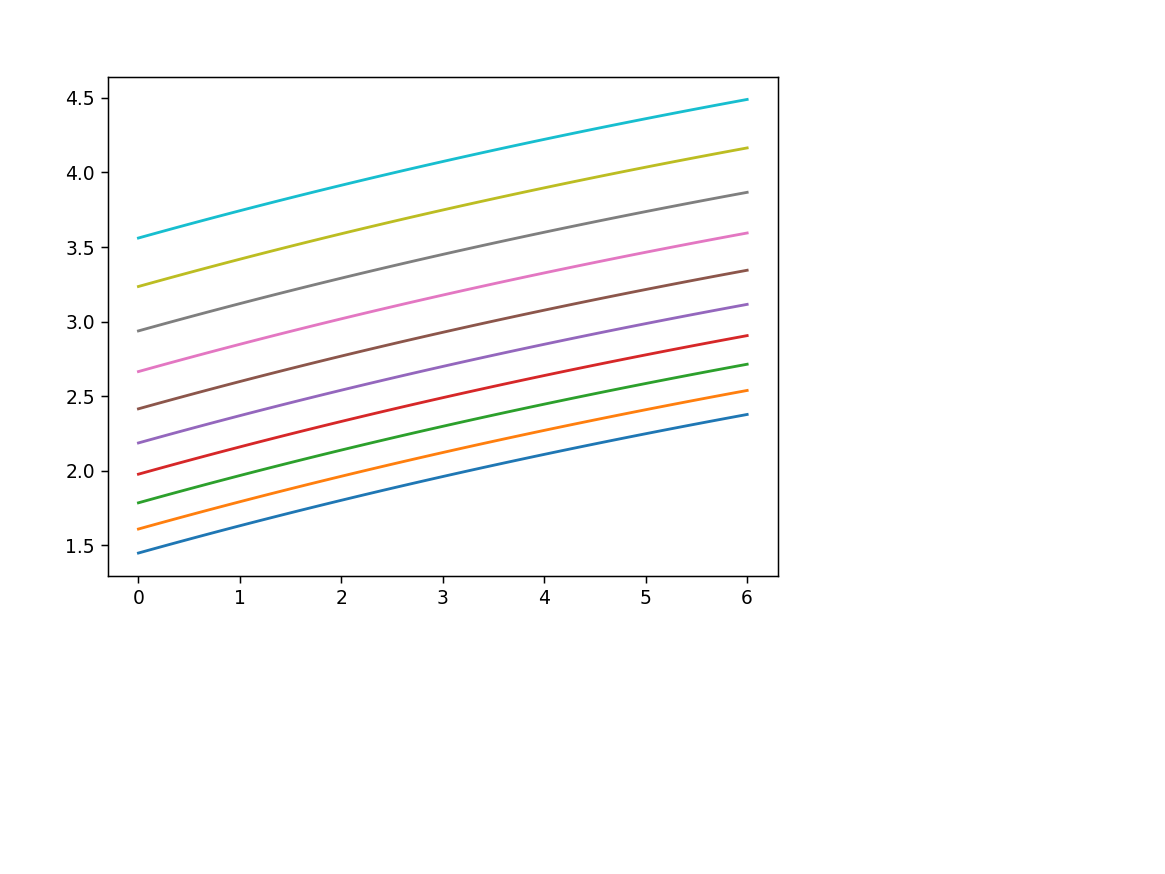

In [ ]:
#THIS WORKS!!
%matplotlib notebook 
for hour in range(0,Life_hours,8783): 
    plt.plot(i_plot,iv_plotting_1a[hour])

In [ ]:
for x,y in zip(break_point_dictionary["5.9"][0],break_point_dictionary["5.9"][1]):
    if x == None:
        break_year = np.nan
    else:
        break_year = round((x/Life_hours)+1,2)
    print(x,round(y,2),break_year)

None 0.0 nan
None 0.1 nan
None 0.2 nan
None 0.3 nan
None 0.4 nan
None 0.5 nan
None 0.6 nan
None 0.7 nan
None 0.8 nan
None 0.9 nan
None 1.0 nan
None 1.1 nan
None 1.2 nan
None 1.3 nan
None 1.4 nan
None 1.5 nan
None 1.6 nan
None 1.7 nan
87773 1.8 2.0
86621 1.9 1.99
85477 2.0 1.97
84339 2.1 1.96
83211 2.2 1.95
82091 2.3 1.93
80979 2.4 1.92
79875 2.5 1.91
78778 2.6 1.9
77688 2.7 1.88
76603 2.8 1.87
75522 2.9 1.86
74454 3.0 1.85
73394 3.1 1.84
72342 3.2 1.82
71297 3.3 1.81
70257 3.4 1.8
69214 3.5 1.79
68175 3.6 1.78
67141 3.7 1.76
66115 3.8 1.75
65108 3.9 1.74
64108 4.0 1.73
63112 4.1 1.72
62117 4.2 1.71
61107 4.3 1.7
60089 4.4 1.68
59071 4.5 1.67
58056 4.6 1.66
57085 4.7 1.65
56119 4.8 1.64
55168 4.9 1.63
54202 5.0 1.62
53237 5.1 1.61
52242 5.2 1.59
51242 5.3 1.58
50244 5.4 1.57
49247 5.5 1.56
48301 5.6 1.55
47363 5.7 1.54
46446 5.8 1.53
45503 5.9 1.52


In [ ]:
for x,y in zip(break_point_dictionary["6.0"][0],break_point_dictionary["6.0"][1]):
    if x == None:
        break_year = np.nan
    else:
        break_year = round((x/Life_hours)+1,2)
    print(x,round(y,2),break_year)

None 0.0 nan
None 0.1 nan
None 0.2 nan
None 0.3 nan
None 0.4 nan
None 0.5 nan
None 0.6 nan
None 0.7 nan
None 0.8 nan
None 0.9 nan
None 1.0 nan
None 1.1 nan
None 1.2 nan
None 1.3 nan
None 1.4 nan
None 1.5 nan
None 1.6 nan
None 1.7 nan
87651 1.8 2.0
86500 1.9 1.98
85355 2.0 1.97
84218 2.1 1.96
83090 2.2 1.95
81970 2.3 1.93
80858 2.4 1.92
79754 2.5 1.91
78657 2.6 1.9
77567 2.7 1.88
76482 2.8 1.87
75401 2.9 1.86
74334 3.0 1.85
73274 3.1 1.83
72222 3.2 1.82
71177 3.3 1.81
70136 3.4 1.8
69094 3.5 1.79
68055 3.6 1.77
67020 3.7 1.76
65999 3.8 1.75
64991 3.9 1.74
63993 4.0 1.73
62997 4.1 1.72
62003 4.2 1.71
60989 4.3 1.69
59973 4.4 1.68
58960 4.5 1.67
57948 4.6 1.66
56979 4.7 1.65
56015 4.8 1.64
55063 4.9 1.63
54097 5.0 1.62
53131 5.1 1.6
52135 5.2 1.59
51136 5.3 1.58
50142 5.4 1.57
49150 5.5 1.56
48207 5.6 1.55
47273 5.7 1.54
46353 5.8 1.53
45409 5.9 1.52
44470 6.0 1.51


In [ ]:
for x,y in zip(break_point_dictionary["6.0"],Jop):
    if x == None:
        break_point_years = np.nan
    else:
        break_point_years = round((x/Life_hours)+1,2)
    print(x,round(y,2), break_point_years)

None 0.0 nan
None 0.1 nan
None 0.2 nan
None 0.3 nan
None 0.4 nan
None 0.5 nan
None 0.6 nan
None 0.7 nan
None 0.8 nan
None 0.9 nan
None 1.0 nan
None 1.1 nan
None 1.2 nan
None 1.3 nan
None 1.4 nan
None 1.5 nan
None 1.6 nan
None 1.7 nan
87651 1.8 2.0
86500 1.9 1.98
85355 2.0 1.97
84218 2.1 1.96
83090 2.2 1.95
81970 2.3 1.93
80858 2.4 1.92
79754 2.5 1.91
78657 2.6 1.9
77567 2.7 1.88
76482 2.8 1.87
75401 2.9 1.86
74334 3.0 1.85
73274 3.1 1.83
72222 3.2 1.82
71177 3.3 1.81
70136 3.4 1.8
69094 3.5 1.79
68055 3.6 1.77
67020 3.7 1.76
65999 3.8 1.75
64991 3.9 1.74
63993 4.0 1.73
62997 4.1 1.72
62003 4.2 1.71
60989 4.3 1.69
59973 4.4 1.68
58960 4.5 1.67
57948 4.6 1.66
56979 4.7 1.65
56015 4.8 1.64
55063 4.9 1.63
54097 5.0 1.62
53131 5.1 1.6
52135 5.2 1.59
51136 5.3 1.58
50142 5.4 1.57
49150 5.5 1.56
48207 5.6 1.55
47273 5.7 1.54
46353 5.8 1.53
45409 5.9 1.52


# Degradation

In [ ]:
#to analyze voltage degradation
degradation_voltages_csv = {}
degradation_voltages_csv["Jop"] = i_plot
for hour in range(0,Life_hours,8759): 
    degradation_voltages_csv[str(hour)] = iv_plotting[hour]

df_degradation_voltages = pd.DataFrame(data=degradation_voltages_csv)
df_degradation_voltages

df_degradation_voltages.to_csv("degraded_voltages_mode3.csv")

In [ ]:
#2A
Jop_ = 0.1
Fit_1 = 1.44926681  #C
Fit_2 = 2.71725674 #A
Fit_3 = 0.06970714 #K
Y = lambda X: (Fit_1 + Fit_2 * (1 - math.exp(-Fit_3 * X)))
Y_vector = np.vectorize(Y)

Jop = [0,0.1,1.7] 
# Jop as array
Jop = np.array(Jop)

# Corresponding voltages for Jops

Vop = [Y(Jop[0]), Y(Jop[1]), Y(Jop[2])]
# Vop as array
Vop = np.array(Vop)

Vop_copy = Vop.copy()
#for iV curve plot
iv_plotting_2a = []
i_plot = np.linspace(0, 6, num=61)
print(len(i_plot))
i_plot = np.round(i_plot, 1)
print(len(i_plot))
v_plot = Y_vector(i_plot)
iv_plotting_2a.append(v_plot)
len(i_plot)
print(i_plot)

61
61
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6. ]


In [ ]:
print(iv_plotting_1a[0][1])
print(iv_plotting_2a[0])

[1.44926681, 1.468142165814853, 1.4868864044437984, 1.505500436689081, 1.5239851670260793, 1.5423414936472581, 1.5605703085058094, 1.5786724973589956, 1.5966489398111876, 1.6145005093566076, 1.632228073421771, 1.6498324934076374, 1.6673146247314663, 1.6846753168683826, 1.7019154133926528, 1.7190357520186768, 1.7360371646416917, 1.7529204773781961, 1.7696865106060904, 1.7863360790045402, 1.8028699915935635, 1.8192890517733409, 1.8355940573632528, 1.8517858006406487, 1.8678650683793423, 1.8838326418878435, 1.8996892970473216, 1.9154358043493067, 1.9310729289331294, 1.946601430623099, 1.9620220639654244, 1.9773355782648772, 1.9925427176212036, 2.0076442209652785, 2.022640822095013, 2.0375332497110077, 2.052322227451965, 2.0670084739298473, 2.081592702764798, 2.096075622619816, 2.11045793723519, 2.1247403454626954, 2.13892354129955, 2.1530082139221376, 2.166995047719497, 2.1808847223265726, 2.1946779126572458, 2.2083752889371224, 2.2219775167361036, 2.235485257000727, 2.2488991660862805, 2

<IPython.core.display.Javascript object>


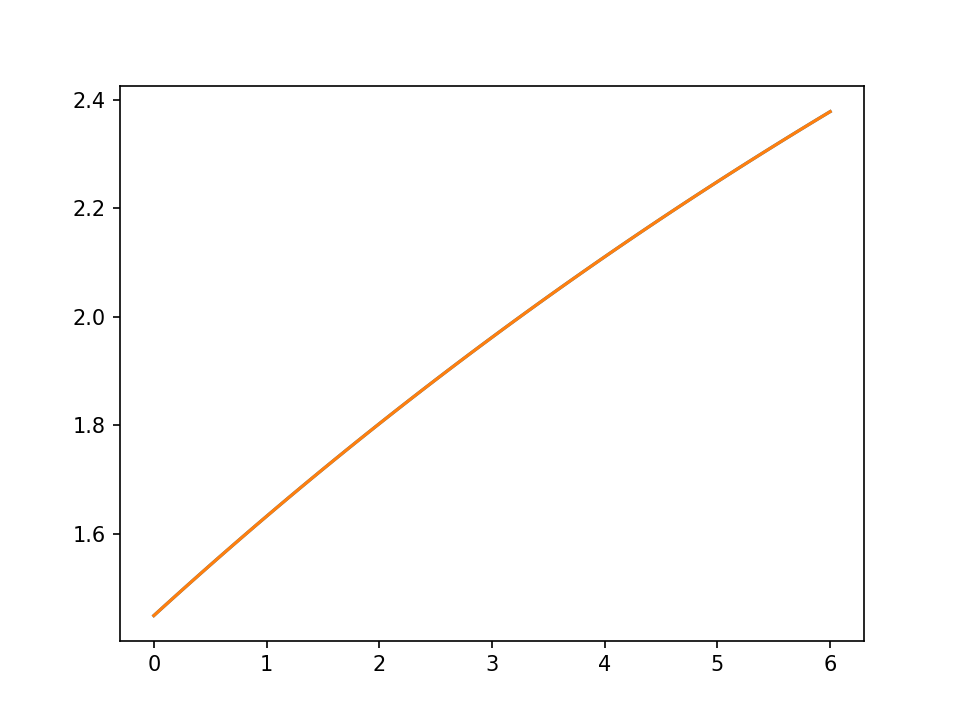

In [ ]:
#compare 1a and 2a baseline iv curves
from matplotlib import pyplot as plt
%matplotlib notebook 
plt.plot(iv_plotting_1a[0][0], iv_plotting_1a[0][1]) #hour 0, Jop, hour 0 Vop
plt.plot(i_plot, iv_plotting_2a[0]) #hour 0, Vop 
plt.show()

In [ ]:
print(iv_plotting_1a[0][1])
print(iv_plotting[0])

[1.44926681, 1.468142165814853, 1.4868864044437984, 1.505500436689081, 1.5239851670260793, 1.5423414936472581, 1.5605703085058094, 1.5786724973589956, 1.5966489398111876, 1.6145005093566076, 1.632228073421771, 1.6498324934076374, 1.6673146247314663, 1.6846753168683826, 1.7019154133926528, 1.7190357520186768, 1.7360371646416917, 1.7529204773781961, 1.7696865106060904, 1.7863360790045402, 1.8028699915935635, 1.8192890517733409, 1.8355940573632528, 1.8517858006406487, 1.8678650683793423, 1.8838326418878435, 1.8996892970473216, 1.9154358043493067, 1.9310729289331294, 1.946601430623099, 1.9620220639654244, 1.9773355782648772, 1.9925427176212036, 2.0076442209652785, 2.022640822095013, 2.0375332497110077, 2.052322227451965, 2.0670084739298473, 2.081592702764798, 2.096075622619816, 2.11045793723519, 2.1247403454626954, 2.13892354129955, 2.1530082139221376, 2.166995047719497, 2.1808847223265726, 2.1946779126572458, 2.2083752889371224, 2.2219775167361036, 2.235485257000727, 2.2488991660862805, 2

<IPython.core.display.Javascript object>


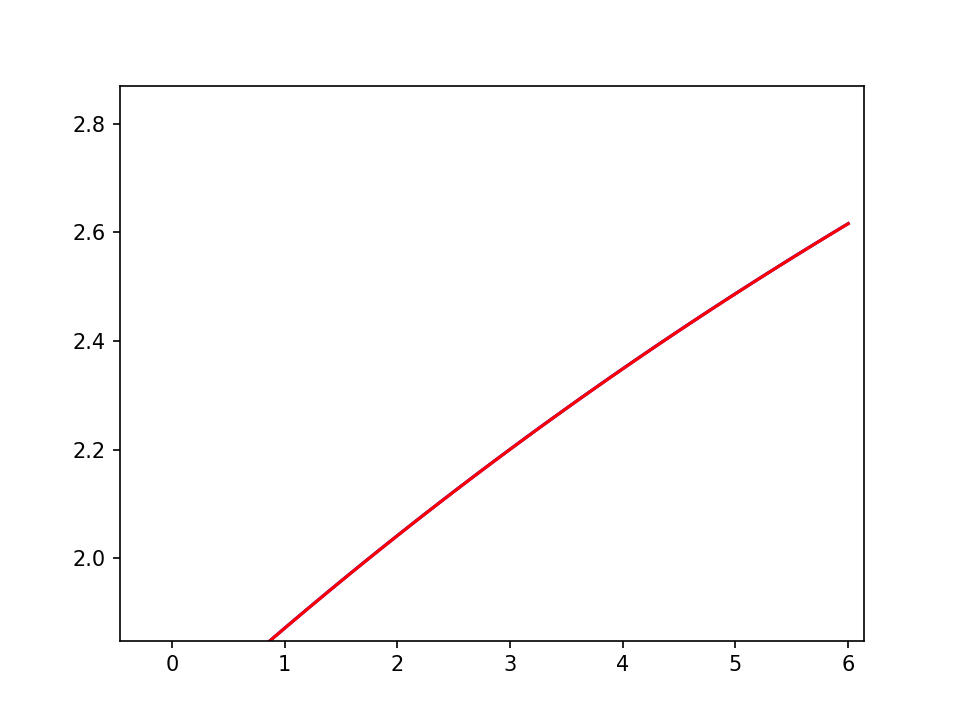

In [ ]:
#checking degradation amounts of vop variables for first hour along iV curve (60 values per mode) - differences between Mode 1A and 2A
#y1 is mode 1A vop, y2 is mode 2A vop
%matplotlib notebook 
# mode_1a_y1 = [] 
# mode_2a_y2 = []
# for (y1,y2) in zip(mode_1a_iv_plotting[0][1],iv_plotting[0]): #in mode 1a hour is the first index, in mode 2A, hr is first index
#     mode_1a_y1.append(y1)
#     mode_2a_y2.append(y2)

# plt.plot(mode_1a_y1, mode_2a_y2) #shows iV curve of mode 1A in hr 1 and iV curve of Mode 2A in hr 1
# plt.plot(i_plot, mode_1a_y1)
# plt.plot(i_plot, mode_2a_y2)

# Logic: Mode 1A should be higher iV curve at end of life because always 1.7 A/cm2
#     Mode 2A can be 0.1 A/cm2
    
plt.plot(i_plot, iv_plotting_1a[85000],"b")
plt.plot(i_plot, iv_plotting[85000],"r")

In [ ]:
print(mode_1a_y1)

[1.4495297480716045, 1.4684051038864576, 1.487149342515403, 1.5057633747606856, 1.524248105097684, 1.5426044317188627, 1.560833246577414, 1.5789354354306002, 1.5969118778827922, 1.6147634474282122, 1.6324910114933755, 1.650095431479242, 1.667577562803071, 1.6849382549399872, 1.7021783514642574, 1.7192986900902814, 1.7363001027132963, 1.7531834154498007, 1.769949448677695, 1.7865990170761448, 1.8031329296651681, 1.8195519898449455, 1.8358569954348574, 1.8520487387122533, 1.868128006450947, 1.884095579959448, 1.8999522351189262, 1.9156987424209113, 1.931335867004734, 1.9468643686947036, 1.962285002037029, 1.9775985163364818, 1.9928056556928082, 2.0079071590369053, 2.0229037601666398, 2.0377961877826345, 2.052585165523592, 2.067271412001474, 2.081855640836425, 2.096338560691443, 2.110720875306817, 2.125003283534322, 2.139186479371177, 2.1532711519937644, 2.1672579857911236, 2.1811476603981994, 2.1949408507288726, 2.2086382270087492, 2.2222404548077304, 2.235748195072354, 2.249162104157907

In [ ]:
print(mode_2a_y2)

[1.4495297675957144, 1.4684051234105675, 1.4871493620395129, 1.5057633942847954, 1.5242481246217938, 1.5426044512429726, 1.5608332661015238, 1.57893545495471, 1.596911897406902, 1.614763466952322, 1.6324910310174854, 1.6500954510033519, 1.6675775823271808, 1.684938274464097, 1.7021783709883673, 1.7192987096143912, 1.7363001222374062, 1.7531834349739106, 1.7699494682018049, 1.7865990366002547, 1.803132949189278, 1.8195520093690554, 1.8358570149589672, 1.8520487582363632, 1.8681280259750568, 1.884095599483558, 1.899952254643036, 1.9156987619450212, 1.931335886528844, 1.9468643882188135, 1.9775985358605916, 1.992805675216918, 2.007907178560996, 2.0229037796907305, 2.0377962073067253, 2.0525851850476826, 2.067271431525565, 2.0818556603605156, 2.0963385802155337, 2.1107208948309077, 2.125003303058413, 2.139186498895268, 2.153271171517855, 2.1672580053152144, 2.18114767992229, 2.1949408702529634, 2.20863824653284, 2.222240474331821, 2.2357482145964447, 2.249162123681998, 2.2624828533844146, 

In [ ]:
mode_1a_iv_plotting[0][1]
1.44926681, 1.46814217, 1.4868864 , 1.50735471

[1.44926681,
 1.468142165814853,
 1.4868864044437984,
 1.505500436689081,
 1.5239851670260793,
 1.5423414936472581,
 1.5605703085058094,
 1.5786724973589956,
 1.5966489398111876,
 1.6145005093566076,
 1.632228073421771,
 1.6498324934076374,
 1.6673146247314663,
 1.6846753168683826,
 1.7019154133926528,
 1.7190357520186768,
 1.7360371646416917,
 1.7529204773781961,
 1.7696865106060904,
 1.7863360790045402,
 1.8028699915935635,
 1.8192890517733409,
 1.8355940573632528,
 1.8517858006406487,
 1.8678650683793423,
 1.8838326418878435,
 1.8996892970473216,
 1.9154358043493067,
 1.9310729289331294,
 1.946601430623099,
 1.9620220639654244,
 1.9773355782648772,
 1.9925427176212036,
 2.0076442209652785,
 2.022640822095013,
 2.0375332497110077,
 2.052322227451965,
 2.0670084739298473,
 2.081592702764798,
 2.096075622619816,
 2.11045793723519,
 2.1247403454626954,
 2.13892354129955,
 2.1530082139221376,
 2.166995047719497,
 2.1808847223265726,
 2.1946779126572458,
 2.2083752889371224,
 2.2219775167

In [ ]:
iv_plotting[0]

array([1.44926681, 1.46814217, 1.4868864 , 1.50735471, 1.52582656,
       1.5441701 , 1.56238621, 1.58047579, 1.5984397 , 1.61805591,
       1.63575878, 1.65333868, 1.67079645, 1.68813296, 1.70534904,
       1.72414863, 1.74111452, 1.75796256, 1.77469357, 1.79130836,
       1.80780773, 1.8258247 , 1.8420843 , 1.85823096, 1.87426546,
       1.89018857, 1.90600107, 1.92326799, 1.93885071, 1.95432518,
       1.96969216, 1.9849524 , 2.00010663, 2.01665472, 2.03158873,
       2.046419  , 2.06114626, 2.07577121, 2.09029457, 2.10615376,
       2.12046607, 2.13467896, 2.14879312, 2.16280923, 2.17672798,
       2.19192696, 2.20564345, 2.21926465, 2.23279124, 2.24622386,
       2.25956317, 2.27412942, 2.28727489, 2.30032904, 2.31329251,
       2.32616594, 2.33894994, 2.35290979, 2.36550801, 2.37801872])

In [ ]:
mode_1a_y1

[1.6795979313449148,
 1.6984732871597679,
 1.7172175257887132,
 1.7358315580339958,
 1.7543162883709942,
 1.772672614992173,
 1.7909014298507242,
 1.8090036187039105,
 1.8269800611561025,
 1.8448316307015225,
 1.8625591947666857,
 1.8801636147525522,
 1.8976457460763811,
 1.9150064382132974,
 1.9322465347375677,
 1.9493668733635916,
 1.9663682859866065,
 1.983251598723111,
 2.000017631951007,
 2.0166672003508626,
 2.033201112941282,
 2.049620173122446,
 2.065925178713735,
 2.082116921992498,
 2.0981961897325494,
 2.114163763242399,
 2.1300204184032165,
 2.145766925706531,
 2.1614040502916745,
 2.176932551982955,
 2.192353185326583,
 2.207666699627329,
 2.2228738389849396,
 2.2379753423296442,
 2.2529719434593787,
 2.2678643710753734,
 2.2826533488163308,
 2.297339595294213,
 2.3119238241291638,
 2.326406743984182,
 2.340789058599556,
 2.355071466827061,
 2.369254662663916,
 2.3833393352865033,
 2.3973261690838625,
 2.4112158436909383,
 2.4250090340216115,
 2.438706410301488,
 2.4523086

In [ ]:
mode_2a_y2

[1.6952605651569421,
 1.7141359209717952,
 1.7328801596007406,
 1.7533484685963217,
 1.7718203182463665,
 1.7901638536559603,
 1.8083799661567574,
 1.8264695408887988,
 1.8444334568435228,
 1.8640496701136702,
 1.881752536642977,
 1.8993324306538002,
 1.9167902063716566,
 1.9341267120882064,
 1.9513427902024731,
 1.9701423804931504,
 1.98710827666986,
 2.00395631967416,
 2.0206873281701587,
 2.0373021151351365,
 2.053801487899056,
 2.071818451225766,
 2.088078057126444,
 2.104224716082426,
 2.1202592126767783,
 2.136182326042611,
 2.1519948299006653,
 2.1692617470247697,
 2.1848444655143724,
 2.2003189390406734,
 2.2156859195246263,
 2.2309461536639352,
 2.24610038296943,
 2.2626484783151475,
 2.277582488217318,
 2.292412759394142,
 2.307140012464074,
 2.321764963039812,
 2.3362883217630652,
 2.3521475198817963,
 2.3664598269357255,
 2.3806727139075567,
 2.3947868714163967,
 2.4088029852839843,
 2.4227217365680156,
 2.4379207162520586,
 2.4516372019479866,
 2.4652584064199403,
 2.47878

In [ ]:
i_plot

array([0.  , 0.1 , 0.2 , 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.92, 1.02,
       1.12, 1.22, 1.32, 1.42, 1.53, 1.63, 1.73, 1.83, 1.93, 2.03, 2.14,
       2.24, 2.34, 2.44, 2.54, 2.64, 2.75, 2.85, 2.95, 3.05, 3.15, 3.25,
       3.36, 3.46, 3.56, 3.66, 3.76, 3.86, 3.97, 4.07, 4.17, 4.27, 4.37,
       4.47, 4.58, 4.68, 4.78, 4.88, 4.98, 5.08, 5.19, 5.29, 5.39, 5.49,
       5.59, 5.69, 5.8 , 5.9 , 6.  ])

In [ ]:
mode_1a_iv_plotting[Life_hours-1][1]

[1.6795979313449148,
 1.6984732871597679,
 1.7172175257887132,
 1.7358315580339958,
 1.7543162883709942,
 1.772672614992173,
 1.7909014298507242,
 1.8090036187039105,
 1.8269800611561025,
 1.8448316307015225,
 1.8625591947666857,
 1.8801636147525522,
 1.8976457460763811,
 1.9150064382132974,
 1.9322465347375677,
 1.9493668733635916,
 1.9663682859866065,
 1.983251598723111,
 2.000017631951007,
 2.0166672003508626,
 2.033201112941282,
 2.049620173122446,
 2.065925178713735,
 2.082116921992498,
 2.0981961897325494,
 2.114163763242399,
 2.1300204184032165,
 2.145766925706531,
 2.1614040502916745,
 2.176932551982955,
 2.192353185326583,
 2.207666699627329,
 2.2228738389849396,
 2.2379753423296442,
 2.2529719434593787,
 2.2678643710753734,
 2.2826533488163308,
 2.297339595294213,
 2.3119238241291638,
 2.326406743984182,
 2.340789058599556,
 2.355071466827061,
 2.369254662663916,
 2.3833393352865033,
 2.3973261690838625,
 2.4112158436909383,
 2.4250090340216115,
 2.438706410301488,
 2.4523086

In [ ]:
iv_plotting[Life_hours-1]

array([1.69526057, 1.71413592, 1.73288016, 1.75334847, 1.77182032,
       1.79016385, 1.80837997, 1.82646954, 1.84443346, 1.86404967,
       1.88175254, 1.89933243, 1.91679021, 1.93412671, 1.95134279,
       1.97014238, 1.98710828, 2.00395632, 2.02068733, 2.03730212,
       2.05380149, 2.07181845, 2.08807806, 2.10422472, 2.12025921,
       2.13618233, 2.15199483, 2.16926175, 2.18484447, 2.20031894,
       2.21568592, 2.23094615, 2.24610038, 2.26264848, 2.27758249,
       2.29241276, 2.30714001, 2.32176496, 2.33628832, 2.35214752,
       2.36645983, 2.38067271, 2.39478687, 2.40880299, 2.42272174,
       2.43792072, 2.4516372 , 2.46525841, 2.47878499, 2.49221761,
       2.50555693, 2.52012317, 2.53326864, 2.5463228 , 2.55928627,
       2.57215969, 2.58494369, 2.59890354, 2.61150177, 2.62401248])

<IPython.core.display.Javascript object>


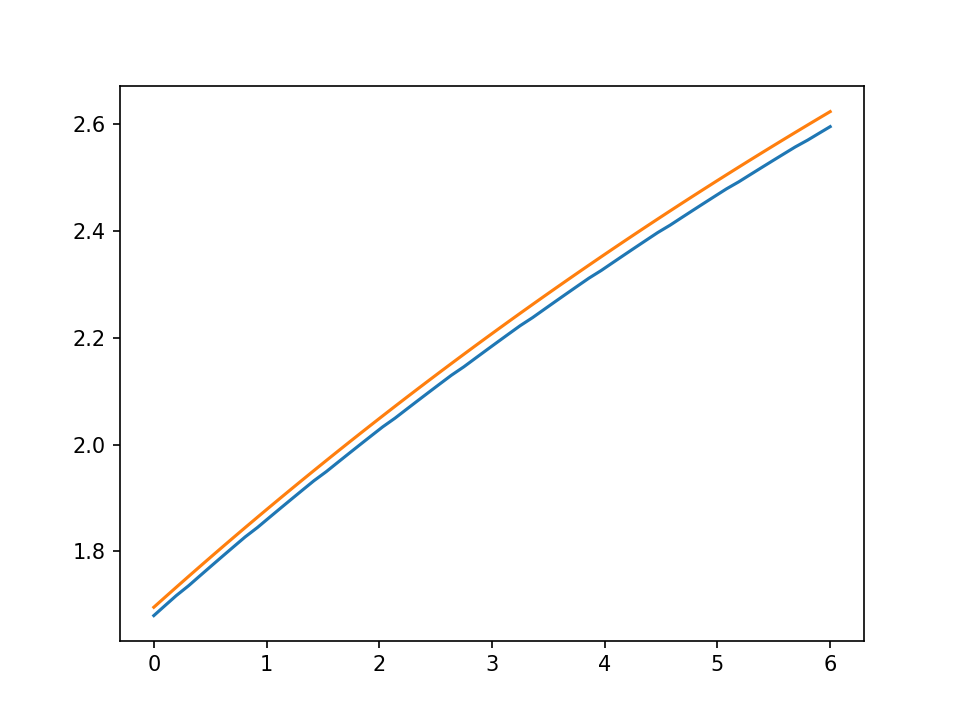

In [ ]:
#checking degradation amounts of vop variables for first hour along iV curve (60 values per mode) - differences between Mode 1A and 2A
#y1 is mode 1A vop, y2 is mode 2A vop
%matplotlib notebook 
mode_1a_y1 = [] 
mode_2a_y2 = []
for (y1,y2) in zip(mode_1a_iv_plotting[Life_hours-1][1],iv_plotting[Life_hours-1]): #in mode 1a hour is the first index, in mode 2A, hr is first index
    mode_1a_y1.append(y1)
    mode_2a_y2.append(y2)

# plt.plot(mode_1a_y1, mode_2a_y2) #shows iV curve of mode 1A in hr 1 and iV curve of Mode 2A in hr 1
plt.plot(i_plot, mode_1a_y1)
plt.plot(i_plot, mode_2a_y2)

In [ ]:
#error checking
x = df_LCOH["mLCOH_Jop1.7"] == df_LCOH["mLCOH_min"]   
x.describe()

count     8760
unique       2
top       True
freq      8726
dtype: object

In [ ]:
Degradation_List #degradation amounts every hour

[2.6293807160672943e-06,
 2.6293846601383684e-06,
 2.6293886042153585e-06,
 2.629392548298265e-06,
 2.6293964923870874e-06,
 2.629400436481826e-06,
 2.629404380582481e-06,
 2.629408324689052e-06,
 2.6294122688015386e-06,
 2.629416212919942e-06,
 2.6294201570442612e-06,
 2.6294241011744967e-06,
 2.6294280453106482e-06,
 2.6294319894527163e-06,
 2.6294359336007005e-06,
 2.6294398777546012e-06,
 2.6294438219144176e-06,
 2.629447766080151e-06,
 2.6294517102518e-06,
 2.6294556544293655e-06,
 2.6294595986128467e-06,
 2.6294635428022445e-06,
 2.6294674869975587e-06,
 2.6294714311987895e-06,
 2.6294753754059364e-06,
 2.6294793196189994e-06,
 2.629483263837979e-06,
 2.6294872080628746e-06,
 2.6294911522936867e-06,
 2.6294950965304154e-06,
 2.62949904077306e-06,
 2.629502985021621e-06,
 2.629506929276099e-06,
 2.629510873536493e-06,
 2.629514817802803e-06,
 2.62951876207503e-06,
 2.629522706353173e-06,
 2.6295266506372325e-06,
 2.6295305949272082e-06,
 2.6295345392231004e-06,
 2.629538483524909e

In [ ]:
df_degradation = pd.DataFrame(data=Degradation_List,columns=["A"])
df_degradation["A"].value_counts()

0.000003    1
0.000003    1
0.000003    1
0.000003    1
0.000003    1
           ..
0.000003    1
0.000003    1
0.000003    1
0.000003    1
0.000003    1
Name: A, Length: 87600, dtype: int64

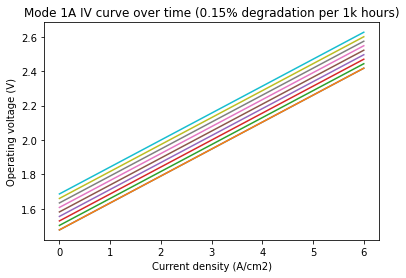

In [ ]:
#for plotting iv curve
#first index is hr, second index is current and voltage
#baseline:
plt.plot(iv_plotting[0][0],iv_plotting[0][1]) #first hour, current, first hour voltage
plt.xlabel("Current density (A/cm2)")
plt.ylabel("Operating voltage (V)")
plt.title("Mode 1A IV curve over time (0.15% degradation per 1k hours)")
for i in range(0,Life_hours,10000): #step by 1,000 hrs
    plt.plot(iv_plotting[i][0],iv_plotting_1a[i][1]) #first hour, current, first hour voltage

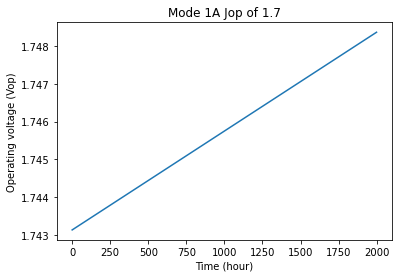

In [ ]:
from matplotlib import pyplot as plt
plt.plot(temp_degraded_voltage[0:2000])
plt.xlabel("Time (hour)")
plt.ylabel("Operating voltage (Vop)")
plt.title('Mode 1A Jop of 1.7')
plt.show()

# 4.) Mode 1B - Any Jop in range Constantly

In [ ]:
# ##############################################
## USE THIS VERSION FOR 1B!! FEBRUARY 7, 2022 - FOR HANDLING TERMINAL VOLTAGE
################################################
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
# 
import math  # for the exponential function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.core.debugger import set_trace
#np.set_printoptions(precision=14)

# write results to csv
f_file = open("fig4.csv","w")
print("Average Jop 10 Yr", "LCOH","UNINST CAPperkW","INST CAPEX", "OPEX","OM","PV_Costs", "PV_KG", file=f_file,sep=",")

Degradation_List = []

# runs Mode 1A for all datasets 
# for mean in ["0.0","0.01", "0.02", "0.03", "0.04", "0.05", "0.06", "0.07"]:     #for mean in df_array_dict:
# for mean in dfElPrice:     #for mean in df_array_dict:
#     print("Mean Price:", mean)
#     dfElPrice = df_array_dict[mean]

# Technical Variables 
Jop_rated = 1.7 # A/cm2
Vop_rated = 1.75292048 # Volts
Capacity = 1000  # conversion factor from kW to watts
Capacity_kW = 10000 #kW
Stack_cost_1kW = 473.92 #2020 USD 
M_BOP_1kW = 150.10 #2020 USD 
E_BOP_1kW = 130.48 #2020 USD 
CAPEX_per_1kW = Stack_cost_1kW + M_BOP_1kW + E_BOP_1kW #uninstalled cost = 754.5

# changing capex with current density
Electronics_percentage = 0.26 # cost increase
# for electrical balance of plant and phase separator and dryers
CAPEX_Electronics = Electronics_percentage*CAPEX_per_1kW
CAPEX_Rest = (1-Electronics_percentage)*CAPEX_per_1kW
A = (Capacity * Capacity_kW) / (Vop_rated * Jop_rated) #cm2 electrode area
CAPEX_Rest_Total = CAPEX_Rest*A*Jop_rated*Vop_rated/1000 #1000 converts to kW

#set_trace()

Jop_ = 0.1
Fit_1 = 1.44926681  #C
Fit_2 = 2.71725674 #A
Fit_3 = 0.06970714 #K
Y = lambda X: (Fit_1 + Fit_2 * (1 - math.exp(-Fit_3 * X)))
Y_vector = np.vectorize(Y)
#Y = lambda X: ((0.156726387554 * X) + 1.47670128643691) #x is Jop_
#C + A * (1 - math.exp(-k * value)) for value in x

iv_plotting_dict_1b = {}

while Jop_ <= 0.3: # 1.7 A/cm2 is only available Jop for Mode 1A
    print("Jop_:", Jop_, "Jop_rated:", Jop_rated, "Vop_rated:", Vop_rated)
    Jop = [Jop_] #ONLY 1.7
    # Jop as array
    Jop = np.array(Jop)

    # Corresponding voltages for Jops

    Vop = [Y(Jop[0])] #only 1.7
    # Vop as array
    Vop = np.array(Vop)

    # Vop_copy is a copy of Vop upon which degradation is
    # applied.  So we have access to origin Vop if needed
    Vop_copy = Vop.copy()

    #set_trace()

    #for iV curve plot
    iv_plotting_1b = []
    i_plot = np.linspace(0, 6, num=61)
    i_plot = np.round(i_plot, 1) #rounding needs to be 1
    v_plot = Y_vector(i_plot)
    iv_plotting_1b.append(v_plot)
    
    
    
    #set_trace()

#     i_plot = [0]
#     temp_y = 0
#     for i in range(60):
#         temp_y += 0.10
#         i_plot.append(round(temp_y,2))
#     v_plot = [Y(x) for x in i_plot]
#     iv_plotting.append([i_plot,v_plot])

    #while Jop_ <= 6.0: # 1.7 A/cm2 is only available Jop for Mode 1A
#     print("Jop_:", Jop_, "Jop_rated:", Jop_rated, "Vop_rated:", Vop_rated)
#     Vop_ = Y(Jop_) 

    n_mol = 2  # constant for H2
    F = 96485  # Faraday's constant
    V_threshold = 2.9  # voltage at which current removed from options

    N_life = 10  # life of electrolyzer

    DR = 0.10  # discount rate

    # vary A/cm2 in 0.1 increments 0 to 6.0 
#     Jop = [Jop_] 
#     print("Jop:",Jop[0])

#     Vop = [Vop_] #1.79
#     print("Vop:",Vop[0])

#     PReq = []  # kW required per hour
#     for i in range(len(Jop)):  
#         if Jop[i] != 0:
#             PReq.append((A * Jop[i] * Vop[i]) / 1000)  # kW
#         else:
#             PReq.append(0)

    # degrade voltage
    Degradation_Rate = 0.0015 / 1000  #0.15% per 1,000 hr https://www.fch.europa.eu/soa-and-targets
    # every hour 0.8% corresponds to 13.92 microvolts at 1.74v per Carmo

    # prevents Jop[i] and Vop[i] from being modified
#     def updatePReq(i, Jop_=Jop[i], Vop_=Vop[i]):  

#         if Jop[i] != 0:
#             PReq[i] = ((A * Jop_ * Vop_) / 1000)  # kW
#         else:
#             PReq[i] = 0
#         return PReq[i]

    #12.28.21 - M_CAP, M_OM and M_KG only need to be inside the while loop
    M_CAPEX = []  # varying the CAPEX_Electronics with Jop
    for k in range(len(Jop)):
        if Jop[k] > 1.7:
            CAPEX_Electronics_Total =  CAPEX_Electronics*A*Jop[k]*Vop[k]/1000
            Installation_Factor = 1.19 #Installed CAPEX 
            Total_CAPEX = (CAPEX_Rest_Total + CAPEX_Electronics_Total)*Installation_Factor
            M_CAPEX.append(Total_CAPEX/Life_hours) 
        elif Jop[k] > 0 and Jop[k] <= 1.7:
            CAPEX_Electronics_Total =  CAPEX_Electronics*A*Jop_rated*Vop_rated/1000
            Installation_Factor = 1.19
            Total_CAPEX = (CAPEX_Rest_Total + CAPEX_Electronics_Total)*Installation_Factor
            M_CAPEX.append(Total_CAPEX/Life_hours) 
        else:
            M_CAPEX.append(0)  

    # array
    M_CAPEX = np.array(M_CAPEX)

    M_OM = [x*0.05 for x in M_CAPEX] 

    #array
    M_OM = np.array(M_OM)

    # Rate of fuel production in kg every hour of year 1
    M_kgh2 = []
    for k in range(len(Jop)):
        if Jop[k] != 0:
            M_kgh2.append((Jop[k] * A) / (n_mol * F) * (0.002 * 3600))  
        else:
            M_kgh2.append(0)  # 0 kg produced when Jop=0

    # array
    M_kg2 = np.array(M_kgh2)

    #12.28.21 - LCOH column names list
    LCOH_column_names = []
    LCOH_2D_data = [] #box

    for i in range(len(Jop)):
        LCOH_column_names.append("EC_Jop" + str(round(Jop[i], 2)))

    for i in range(len(Jop)):
        LCOH_column_names.append("kg_Jop" + str(round(Jop[i], 2)))

    for i in range(len(Jop)):
        LCOH_column_names.append("CAP_Jop" + str(round(Jop[i], 2)))

    for i in range(len(Jop)):
        LCOH_column_names.append("OM_Jop" + str(round(Jop[i], 2)))

    for i in range(len(Jop)):
        LCOH_column_names.append("mLCOH_Jop" + str(round(Jop[i], 2)))

    for name in ["mLCOH_min", "m_ECmin", "OptimalJop","m_kgmin","m_CAPmin","m_OMmin"]:
        LCOH_column_names.append(name)

    break_point = None #to determine hour at which electrolyzer dies
    hour = 0
    for price in dfElPrice:
    #     for price in dfElPrice:  
        # Preq is a numpy array
        hour+=1     
        #Make EC NAN if terminal voltage is reached - Feb 7, 2022
        # if Vop is > Vthreshold make EC NAN
        if Vop_copy >= V_threshold:
            if break_point == None:
                break_point = hour 
            #determine when EOL reached with hour variable
            EC = [np.nan for i in Jop] #must be an array
            EC = np.array(EC)
        else:
            EC = price * (A * Jop * Vop_copy) / 1000 #vop_copy is degraded voltage #EC is an array
    
    
#     for price in dfElPrice:  
#         # Preq is a numpy array
#         EC = price * (A * Jop * Vop_copy) / 1000 #vop_copy is degraded voltage

        #set_trace()

        # if EC is NAN then make the corresponding elements NAN
        # in M_kg2, M_CAPEX and M_OM

        M_kgh2  = np.where(np.isnan(EC), np.nan, M_kgh2)
#         M_CAPEX = np.where(np.isnan(EC), np.nan, M_CAPEX)
        M_OM    = np.where(np.isnan(EC), np.nan, M_OM)

        #set_trace()

        # array
        marginal_LCOH_value = np.where(M_kgh2==0, np.nan, (EC + M_CAPEX + M_OM)/M_kgh2)

        #set_trace()

        #marginal LCOH per Jop
        # 0 = energy charge; 1 = kg; 2 = CAPEX; 3 = OM; 4 = marginal LCOH
        #marginal_LCOH_value = ((LCOH_hourly_data[2] + LCOH_hourly_data[3] + LCOH_hourly_data[0])/LCOH_hourly_data[1])
        #LCOH_hourly_data.append(marginal_LCOH_value)

#                 # Compare all columns and pick up the minimum LCOH - no comparison for mode 1A
#         for df_LCOH in df_LCOH_total_list:  

        #minimum LCOH per hour - ignore nan values
        margLCOH_min = np.min(marginal_LCOH_value) #np.nanmin
        margLCOH_min_index = np.argmin(marginal_LCOH_value) # np.nanargmin
        #LCOH_hourly_data.append(LCOH_hourly_data[4]) #minimum marginal LCOH is the same as the marginal LCOH for Mode 1A; only one Jop

        #set_trace()

        #Energy charge minimum
        EC_min = EC[margLCOH_min_index]
        #LCOH_hourly_data.append(LCOH_hourly_data[0]) #only one value for Mode 1A

        #Jop that minimizes marginal LCOH  and corresponding Vop
        Jop_min = Jop[margLCOH_min_index]
        Vop_copy_min = Vop_copy[margLCOH_min_index]
        #LCOH_hourly_data.append(Jop_) #for one value of 1.7, from while loop

        #kg associated with min LCOH
        M_kgh2_min = M_kgh2[margLCOH_min_index]
        #LCOH_hourly_data.append(LCOH_hourly_data[1]) 

        #CAP associated with min LCOH
        M_CAP_min = M_CAPEX[margLCOH_min_index]

        #OM associated with min LCOH
        M_OM_min = M_OM[margLCOH_min_index]

#         set_trace()

        # calculate degradation amount on the Vop 
        # that minimizes margLCOH
        Degradation_Amount = Vop_copy_min * Degradation_Rate  #increase in voltage

        # all the Vop's (Vop_copy is a copy of Vop) are degraded to 
        # the same amount 
        Vop_copy += Degradation_Amount

        Degradation_List.append(Degradation_Amount) #collect degradation amounts
#         set_trace()

        #add hourly degradation to V_plot for plotting
        #v_plot += Degradation_Amount
        #v_plot = [x + Degradation_Amount for x in v_plot]
        iv_plotting_1b.append(iv_plotting_1b[-1] + Degradation_Amount)

#         set_trace()

#                 LCOH_column_names = ["EC_Jop" + str(round(Jop[i], 2)), "kg_Jop" + str(round(Jop[i], 2)), 
#                               "CAP_Jop" + str(round(Jop[i], 2)), "OM_Jop" + str(round(Jop[i], 2)),
#                               "mLCOH_Jop" + str(round(Jop[i], 2)), "mLCOH_min", "m_ECmin", 
#                               "OptimalJop","m_kgmin"]
        data_row = np.hstack((EC, M_kgh2, M_CAPEX, M_OM, marginal_LCOH_value, 
                            margLCOH_min, EC_min, Jop_min, M_kgh2_min, M_CAP_min, M_OM_min))
        LCOH_2D_data.append(data_row)

#         set_trace()


# #################################################################
# ###################################################################
#     set_trace()
    #all 10 years
    df_LCOH = pd.DataFrame(data=LCOH_2D_data,columns=LCOH_column_names)
    CAP_Total = (df_LCOH["m_CAPmin"].sum()) #whole CAPEX sum
#     OM_Total_1st = (df_LCOH_total_list[9]["m_OMmin"].sum())
#     set_trace()

#split into 10 years for the DCFA
    df_LCOH_total_list = []  # holds all of 10 individual dataframess, 1 for each year
    start = 0
    stop = Life_1year
    for i in range(10):
        df_LCOH_temp = df_LCOH.iloc[start:stop]
        df_LCOH_total_list.append(df_LCOH_temp)  # saves each year in a list so can loop through
        start = stop
        stop = (i + 2) * Life_1year # cycles though each year

    for df in df_LCOH_total_list:
        df.index = range(Life_1year)
#     set_trace()

       #12.28.21 - sum kg and EC for 10 years in 1 year increments
    OptimalEC_List_DCFA = []
    OptimalKG_List_DCFA = []
    OptimalOM_List_DCFA = []
    
    for df_LCOH in df_LCOH_total_list:
        OptimalEC_List_DCFA.append(np.nansum(df_LCOH["m_ECmin"]))
        OptimalKG_List_DCFA.append(np.nansum(df_LCOH["m_kgmin"]))
        OptimalOM_List_DCFA.append(np.nansum(df_LCOH["m_OMmin"]))

    #sum one year of hourly OM associated with minimum marginal LCOH   
#         OM_Total_1st = (df_LCOH_total_list[9]["m_OMmin"].sum())

#     set_trace()     

    df_DCFA = pd.DataFrame(data={})
    df_DCFA["Year"] = list(range(0, 11))

    df_DCFA["CAPEX"] = [CAP_Total if i == 0 else 0 for i in range(11)]

    df_DCFA["PWF"] = [1 / (1 + DR) ** df_DCFA["Year"][i] for i in range(11)]
    
    OptimalOM_List_DCFA.insert(0, 0)
    df_DCFA["PV_OM"] = [0 if i == 0 else (OptimalOM_List_DCFA[i] * 10 * df_DCFA["PWF"][i]) for i in range(11)]

    OptimalEC_List_DCFA.insert(0, 0)
    df_DCFA["PV_EC"] = [0 if i == 0 else (OptimalEC_List_DCFA[i] * df_DCFA["PWF"][i]) for i in range(11)]

    OptimalKG_List_DCFA.insert(0, 0)
    df_DCFA["PV_KG"] = [0 if i == 0 else (OptimalKG_List_DCFA[i] * df_DCFA["PWF"][i]) for i in range(11)]

#         # Calculate LCOH

    PV_Costs = (df_DCFA["CAPEX"].sum() + df_DCFA["PV_OM"].sum() + df_DCFA["PV_EC"].sum())  

    PV_KG = df_DCFA["PV_KG"].sum()
    Lifetime_LCOH_dynamic_Jop0baseline = PV_Costs / PV_KG

#         # Contribution analysis

    CAPEX_Cont = df_DCFA["CAPEX"].sum() / PV_Costs * 100

    OM_Cont = df_DCFA["PV_OM"].sum() / PV_Costs * 100

    EC_Cont = df_DCFA["PV_EC"].sum() / PV_Costs * 100

    df_DCFA["PV_KG"].sum()

    OptimalJop_mean = []
    for year in range(10):
        OptimalJop_mean.append(df_LCOH_total_list[year]["OptimalJop"].mean())
    Average_Jop_10yr = sum(OptimalJop_mean) / len(OptimalJop_mean) 
    Year1_Jop = OptimalJop_mean[0]
    Year10_Jop = OptimalJop_mean[9]

#         # write to csv
    print(Average_Jop_10yr, Lifetime_LCOH_dynamic_Jop0baseline, CAPEX_per_1kW, Total_CAPEX, df_DCFA["PV_EC"].sum(), df_DCFA["PV_OM"].sum(), PV_Costs, PV_KG, file=f_file,sep=",") 
    print("UNINST CAPperKW:", CAPEX_per_1kW)
    print("INST CAPEX:", Total_CAPEX)
    print("PV_EC:", df_DCFA["PV_EC"].sum())
    print("PV_KG:", PV_KG)
    print("PV_OM:", df_DCFA["PV_OM"].sum())
    print("LCOH:", Lifetime_LCOH_dynamic_Jop0baseline)
    
    iv_plotting_dict_1b[str(round(Jop_,2))] = iv_plotting_1b
    
    Jop_ += 0.1 #the step interval for Jop_rated; must be down here 
f_file.close() 
df_csv = pd.read_csv("fig4.csv")
df_csv

Jop_: 0.1 Jop_rated: 1.7 Vop_rated: 1.75292048
UNINST CAPperKW: 754.5
INST CAPEX: 8978550.0
PV_EC: 1205004.0751463096
PV_KG: 573416.9849464742
PV_OM: 2346989.2122393553
LCOH: 21.852410403496048
Jop_: 0.2 Jop_rated: 1.7 Vop_rated: 1.75292048
UNINST CAPperKW: 754.5
INST CAPEX: 8978550.0
PV_EC: 2340707.801046285
PV_KG: 1132009.4137344477
PV_OM: 2316650.8421756527
LCOH: 12.045755519150408


,Average Jop 10 Yr,LCOH,UNINST CAPperkW,INST CAPEX,OPEX,OM,PV_Costs,PV_KG
0,0.1,21.852410,754.5,8978550.0,1.205004e+06,2.346989e+06,1.253054e+07,5.734170e+05
1,0.2,12.045756,754.5,8978550.0,2.340708e+06,2.316651e+06,1.363591e+07,1.132009e+06


In [ ]:
iv_plotting_dict_1b.keys()

dict_keys(['0.1', '0.2'])

In [ ]:
BOL_1b_0_1_Jop = iv_plotting_dict_1b['0.1'][0]
EOL_1b_0_1_Jop = iv_plotting_dict_1b['0.1'][-1]

print(BOL_1b_0_1_Jop)
print(EOL_1b_0_1_Jop)

[1.44926681 1.46814217 1.4868864  1.50550044 1.52398517 1.54234149
 1.56057031 1.5786725  1.59664894 1.61450051 1.63222807 1.64983249
 1.66731462 1.68467532 1.70191541 1.71903575 1.73603716 1.75292048
 1.76968651 1.78633608 1.80286999 1.81928905 1.83559406 1.8517858
 1.86786507 1.88383264 1.8996893  1.9154358  1.93107293 1.94660143
 1.96202206 1.97733558 1.99254272 2.00764422 2.02264082 2.03753325
 2.05232223 2.06700847 2.0815927  2.09607562 2.11045794 2.12474035
 2.13892354 2.15300821 2.16699505 2.18088472 2.19467791 2.20837529
 2.22197752 2.23548526 2.24889917 2.2622199  2.27544809 2.2885844
 2.30162946 2.3145839  2.32744835 2.34022344 2.35290979 2.36550801
 2.37801872]
[3.50652282 3.52539818 3.54414242 3.56275645 3.58124118 3.59959751
 3.61782632 3.63592851 3.65390495 3.67175652 3.68948409 3.70708851
 3.72457064 3.74193133 3.75917143 3.77629177 3.79329318 3.81017649
 3.82694252 3.84359209 3.86012601 3.87654507 3.89285007 3.90904181
 3.92512108 3.94108866 3.95694531 3.97269182 3.9883

In [ ]:
print("break point hour:", (break_point-1))
EOL = ((break_point-1)/Life_1year)+1
EOL

In [ ]:
iv_plotting_1b[break_point-1][17]

# 5.) Mode 2A - Jop of 0.1 OR 1.7

In [ ]:
# ##############################################
# USE THIS VERSION - FOR MODE 2A - Feb 7, 2022 - 0.1 OR 1.7 A/cm2
################################################
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
 
import math  # for the exponential function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.core.debugger import set_trace
#np.set_printoptions(precision=14)

# write results to csv
f_file = open("mode2a.csv","w")
print("Mean Price","Average Jop 10 Yr", "LCOH","UNINST CAPperkW","INST CAPEX", "OPEX","OM","PV_Costs", "PV_KG", file=f_file,sep=",")

Degradation_List = []

# runs Mode 1A for all datasets 
# for mean in ["0.0","0.01", "0.02", "0.03", "0.04", "0.05", "0.06", "0.07"]:     #for mean in df_array_dict:
# # for mean in ["0.0"]:     #for mean in df_array_dict:
#     print("Mean Price:", mean)
#     dfElPrice = df_array_dict[mean]

# Technical Variables 
Jop_rated = 1.7 # A/cm2
Vop_rated = 1.75292048 # Volts
Capacity = 1000  # conversion factor from kW to watts
Capacity_kW = 10000 #kW
Stack_cost_1kW = 473.92 #2020 USD 
M_BOP_1kW = 150.10 #2020 USD 
E_BOP_1kW = 130.48 #2020 USD 
CAPEX_per_1kW = Stack_cost_1kW + M_BOP_1kW + E_BOP_1kW #uninstalled cost = 754.5

# changing capex with current density
Electronics_percentage = 0.26 # cost increase
# for electrical balance of plant and phase separator and dryers
CAPEX_Electronics = Electronics_percentage*CAPEX_per_1kW
CAPEX_Rest = (1-Electronics_percentage)*CAPEX_per_1kW
A = (Capacity * Capacity_kW) / (Vop_rated * Jop_rated) #cm2 electrode area
CAPEX_Rest_Total = CAPEX_Rest*A*Jop_rated*Vop_rated/1000 #1000 converts to kW

#set_trace()

#     Jop_ = 0.1
Fit_1 = 1.44926681  #C
Fit_2 = 2.71725674 #A
Fit_3 = 0.06970714 #K
Y = lambda X: (Fit_1 + Fit_2 * (1 - math.exp(-Fit_3 * X)))
Y_vector = np.vectorize(Y)
#Y = lambda X: ((0.156726387554 * X) + 1.47670128643691) #x is Jop_
#C + A * (1 - math.exp(-k * value)) for value in x

Jop = [0,0.1,1.7] 
# Jop as array
Jop = np.array(Jop)

# Corresponding voltages for Jops

Vop = [Y(Jop[0]), Y(Jop[1]), Y(Jop[2])]
# Vop as array
Vop = np.array(Vop)

# Vop_copy is a copy of Vop upon which degradation is
# applied.  So we have access to origin Vop if needed
Vop_copy = Vop.copy()

#set_trace()

#for iV curve plot
iv_plotting_2a = []
i_plot = np.linspace(0, 6, num=61)
i_plot = np.round(i_plot, 1) #rounding needs to be 1
v_plot = Y_vector(i_plot)
iv_plotting_2a.append(v_plot)

#set_trace()

#     i_plot = [0]
#     temp_y = 0
#     for i in range(60):
#         temp_y += 0.10
#         i_plot.append(round(temp_y,2))
#     v_plot = [Y(x) for x in i_plot]
#     iv_plotting.append([i_plot,v_plot])

#while Jop_ <= 6.0: # 1.7 A/cm2 is only available Jop for Mode 1A
#     print("Jop_:", Jop_, "Jop_rated:", Jop_rated, "Vop_rated:", Vop_rated)
#     Vop_ = Y(Jop_) 

n_mol = 2  # constant for H2
F = 96485  # Faraday's constant
V_threshold = 2.9  # voltage at which current removed from options

N_life = 10  # life of electrolyzer

DR = 0.10  # discount rate

# vary A/cm2 in 0.1 increments 0 to 6.0 
#     Jop = [Jop_] 
#     print("Jop:",Jop[0])

#     Vop = [Vop_] #1.79
#     print("Vop:",Vop[0])

#     PReq = []  # kW required per hour
#     for i in range(len(Jop)):  
#         if Jop[i] != 0:
#             PReq.append((A * Jop[i] * Vop[i]) / 1000)  # kW
#         else:
#             PReq.append(0)

# degrade voltage
Degradation_Rate = 0.0015 / 1000  #0.15% per 1,000 hr https://www.fch.europa.eu/soa-and-targets
# every hour 0.8% corresponds to 13.92 microvolts at 1.74v per Carmo

# prevents Jop[i] and Vop[i] from being modified
#     def updatePReq(i, Jop_=Jop[i], Vop_=Vop[i]):  

#         if Jop[i] != 0:
#             PReq[i] = ((A * Jop_ * Vop_) / 1000)  # kW
#         else:
#             PReq[i] = 0
#         return PReq[i]

#12.28.21 - M_CAP, M_OM and M_KG only need to be inside the while loop
M_CAPEX = []  # varying the CAPEX_Electronics with Jop
for k in range(len(Jop)):
    if Jop[k] > 1.7:
        CAPEX_Electronics_Total =  CAPEX_Electronics*A*Jop[k]*Vop[k]/1000
        Installation_Factor = 1.19 #Installed CAPEX 
        Total_CAPEX = (CAPEX_Rest_Total + CAPEX_Electronics_Total)*Installation_Factor
        M_CAPEX.append(Total_CAPEX/Life_hours) 
    elif Jop[k] > 0 and Jop[k] <= 1.7:
        CAPEX_Electronics_Total =  CAPEX_Electronics*A*Jop_rated*Vop_rated/1000
        Installation_Factor = 1.19
        Total_CAPEX = (CAPEX_Rest_Total + CAPEX_Electronics_Total)*Installation_Factor
        M_CAPEX.append(Total_CAPEX/Life_hours) 
    else:
        M_CAPEX.append(0)  

# array
M_CAPEX = np.array(M_CAPEX)

M_OM = [x*0.05 for x in M_CAPEX] 

#array
M_OM = np.array(M_OM)

# Rate of fuel production in kg every hour of year 1
M_kgh2 = []
for k in range(len(Jop)):
    if Jop[k] != 0:
        M_kgh2.append((Jop[k] * A) / (n_mol * F) * (0.002 * 3600))  
    else:
        M_kgh2.append(0)  # 0 kg produced when Jop=0

# array
M_kg2 = np.array(M_kgh2)

#12.28.21 - LCOH column names list
LCOH_column_names = []
LCOH_2D_data = [] #box

for i in range(len(Jop)):
    LCOH_column_names.append("EC_Jop" + str(round(Jop[i], 2)))

for i in range(len(Jop)):
    LCOH_column_names.append("kg_Jop" + str(round(Jop[i], 2)))

for i in range(len(Jop)):
    LCOH_column_names.append("CAP_Jop" + str(round(Jop[i], 2)))

for i in range(len(Jop)):
    LCOH_column_names.append("OM_Jop" + str(round(Jop[i], 2)))

for i in range(len(Jop)):
    LCOH_column_names.append("mLCOH_Jop" + str(round(Jop[i], 2)))

for name in ["mLCOH_min", "m_ECmin", "OptimalJop","m_kgmin","m_CAPmin","m_OMmin"]:
    LCOH_column_names.append(name)

break_point_0_0 = None #to determine hour at which electrolyzer dies
break_point_0_1 = None
break_point_1_7 = None
hour = 0
for price in dfElPrice:
#     for price in dfElPrice:  
    # Preq is a numpy array
    hour+=1     
    #Make EC NAN if terminal voltage is reached - Feb 7, 2022
    # if Vop is > Vthreshold make EC NAN
#     if Vop_copy >= V_threshold: #in Mode 2A Vop_copy is an array
#         if break_point == None:
#             break_point = hour 
        #determine when EOL reached with hour variable
#             EC = [np.nan for i in Jop] #must be an array and work for all Jop options - Feb 7, 2022
    condition = Vop_copy >= V_threshold
    #check if break point reached for each Jop
    if condition[0] == True:
        if break_point_0_0 == None:
            break_point_0_0 = hour 
    if condition[1] == True:
        if break_point_0_1 == None:
            break_point_0_1 = hour 
    if condition[2] == True:
        if break_point_1_7 == None:
            break_point_1_7 = hour 
            
    EC = np.where(condition, np.nan, price * (A * Jop * Vop_copy) / 1000) #makes EC nAn if >=threshold
#             EC = np.array(EC)
#         else:
#             EC = price * (A * Jop * Vop_copy) / 1000 #vop_copy is degraded voltage #EC is an array

#     set_trace()

    # if EC is NAN then make the corresponding elements NAN
    # in M_kg2, M_CAPEX and M_OM

    M_kgh2  = np.where(np.isnan(EC), np.nan, M_kgh2)
#         M_CAPEX = np.where(np.isnan(EC), np.nan, M_CAPEX)
    M_OM    = np.where(np.isnan(EC), np.nan, M_OM)

    #set_trace()

    # array
    marginal_LCOH_value = np.where(M_kgh2==0, np.nan, (EC + M_CAPEX + M_OM)/M_kgh2)

    #set_trace()

    #marginal LCOH per Jop
    # 0 = energy charge; 1 = kg; 2 = CAPEX; 3 = OM; 4 = marginal LCOH
    #marginal_LCOH_value = ((LCOH_hourly_data[2] + LCOH_hourly_data[3] + LCOH_hourly_data[0])/LCOH_hourly_data[1])
    #LCOH_hourly_data.append(marginal_LCOH_value)

#                 # Compare all columns and pick up the minimum LCOH - no comparison for mode 1A
#         for df_LCOH in df_LCOH_total_list:  

    #minimum LCOH per hour - ignore nan values - dealing with NaN
    try:
        margLCOH_min = np.nanmin(marginal_LCOH_value) #np.nanmin
        margLCOH_min_index = np.nanargmin(marginal_LCOH_value) # np.nanargmin
    except ValueError:
        margLCOH_min = np.min(marginal_LCOH_value) #np.nanmin
        margLCOH_min_index = np.argmin(marginal_LCOH_value) # np.nanargmin

    #LCOH_hourly_data.append(LCOH_hourly_data[4]) #minimum marginal LCOH is the same as the marginal LCOH for Mode 1A; only one Jop

    #set_trace()

    #Energy charge minimum
    EC_min = EC[margLCOH_min_index]
    #LCOH_hourly_data.append(LCOH_hourly_data[0]) #only one value for Mode 1A

    #Jop that minimizes marginal LCOH  and corresponding Vop
    Jop_min = Jop[margLCOH_min_index]
    if Jop_min == 0: Jop_min = np.nan #boundary condition to avoid zero as optimal Jop
    Vop_copy_min = Vop_copy[margLCOH_min_index]
    #LCOH_hourly_data.append(Jop_) #for one value of 1.7, from while loop

    #kg associated with min LCOH
    M_kgh2_min = M_kgh2[margLCOH_min_index]
    #LCOH_hourly_data.append(LCOH_hourly_data[1]) 

    #CAP associated with min LCOH
    M_CAP_min = M_CAPEX[margLCOH_min_index]

    #OM associated with min LCOH
    M_OM_min = M_OM[margLCOH_min_index]

#     set_trace()

    # calculate degradation amount on the Vop 
    # that minimizes margLCOH
    Degradation_Amount = Vop_copy_min * Degradation_Rate  #increase in voltage

    # all the Vop's (Vop_copy is a copy of Vop) are degraded to 
    # the same amount 
    Vop_copy += Degradation_Amount

    Degradation_List.append(Degradation_Amount) #collect degradation amounts
#         set_trace()

    #add hourly degradation to V_plot for plotting
    #v_plot += Degradation_Amount
    #v_plot = [x + Degradation_Amount for x in v_plot]
    iv_plotting_2a.append(iv_plotting_2a[-1] + Degradation_Amount)

#         set_trace()

#                 LCOH_column_names = ["EC_Jop" + str(round(Jop[i], 2)), "kg_Jop" + str(round(Jop[i], 2)), 
#                               "CAP_Jop" + str(round(Jop[i], 2)), "OM_Jop" + str(round(Jop[i], 2)),
#                               "mLCOH_Jop" + str(round(Jop[i], 2)), "mLCOH_min", "m_ECmin", 
#                               "OptimalJop","m_kgmin"]
    data_row = np.hstack((EC, M_kgh2, M_CAPEX, M_OM, marginal_LCOH_value, 
                        margLCOH_min, EC_min, Jop_min, M_kgh2_min, M_CAP_min, M_OM_min))
    LCOH_2D_data.append(data_row)

#         set_trace()


# #################################################################
# ###################################################################
#     set_trace()
#all 10 years
df_LCOH = pd.DataFrame(data=LCOH_2D_data,columns=LCOH_column_names)
CAP_Total = (df_LCOH["m_CAPmin"].sum()) #whole CAPEX sum
#     OM_Total_1st = (df_LCOH_total_list[9]["m_OMmin"].sum())
#     set_trace()

#split into 10 years for the DCFA
df_LCOH_total_list = []  # holds all of 10 individual dataframess, 1 for each year
start = 0
stop = Life_1year
for i in range(10):
    df_LCOH_temp = df_LCOH.iloc[start:stop]
    df_LCOH_total_list.append(df_LCOH_temp)  # saves each year in a list so can loop through
    start = stop
    stop = (i + 2) * Life_1year # cycles though each year

for df in df_LCOH_total_list:
    df.index = range(Life_1year)
#     set_trace()

   #12.28.21 - sum kg and EC for 10 years in 1 year increments
OptimalEC_List_DCFA = []
OptimalKG_List_DCFA = []
OptimalOM_List_DCFA = []
for df_LCOH in df_LCOH_total_list:
    OptimalEC_List_DCFA.append(np.nansum(df_LCOH["m_ECmin"]))
    OptimalKG_List_DCFA.append(np.nansum(df_LCOH["m_kgmin"]))
    OptimalOM_List_DCFA.append(np.nansum(df_LCOH["m_OMmin"]))

#sum one year of hourly OM associated with minimum marginal LCOH   
#         OM_Total_1st = (df_LCOH_total_list[9]["m_OMmin"].sum())

#     set_trace()     

df_DCFA = pd.DataFrame(data={})
df_DCFA["Year"] = list(range(0, 11))

df_DCFA["CAPEX"] = [CAP_Total if i == 0 else 0 for i in range(11)]

df_DCFA["PWF"] = [1 / (1 + DR) ** df_DCFA["Year"][i] for i in range(11)]

OptimalOM_List_DCFA.insert(0, 0)
df_DCFA["PV_OM"] = [0 if i == 0 else (OptimalOM_List_DCFA[i] * 10 * df_DCFA["PWF"][i]) for i in range(11)]

OptimalEC_List_DCFA.insert(0, 0)
df_DCFA["PV_EC"] = [0 if i == 0 else (OptimalEC_List_DCFA[i] * df_DCFA["PWF"][i]) for i in range(11)]

OptimalKG_List_DCFA.insert(0, 0)
df_DCFA["PV_KG"] = [0 if i == 0 else (OptimalKG_List_DCFA[i] * df_DCFA["PWF"][i]) for i in range(11)]

#         # Calculate LCOH

PV_Costs = (df_DCFA["CAPEX"].sum() + df_DCFA["PV_OM"].sum() + df_DCFA["PV_EC"].sum())  

PV_KG = df_DCFA["PV_KG"].sum()
Lifetime_LCOH_dynamic_Jop0baseline = PV_Costs / PV_KG

#         # Contribution analysis

CAPEX_Cont = df_DCFA["CAPEX"].sum() / PV_Costs * 100

OM_Cont = df_DCFA["PV_OM"].sum() / PV_Costs * 100

EC_Cont = df_DCFA["PV_EC"].sum() / PV_Costs * 100

df_DCFA["PV_KG"].sum()

OptimalJop_mean = []
for year in range(10):
    OptimalJop_mean.append(df_LCOH_total_list[year]["OptimalJop"].mean())
Average_Jop_10yr = sum(OptimalJop_mean) / len(OptimalJop_mean) 
Year1_Jop = OptimalJop_mean[0]
Year10_Jop = OptimalJop_mean[9]

#         # write to csv
print(mean, Average_Jop_10yr, Lifetime_LCOH_dynamic_Jop0baseline, CAPEX_per_1kW, Total_CAPEX, df_DCFA["PV_EC"].sum(), df_DCFA["PV_OM"].sum(), PV_Costs, PV_KG, file=f_file,sep=",") 
print("UNINST CAPperKW:", CAPEX_per_1kW)
print("INST CAPEX:", Total_CAPEX)
print("PV_EC:", df_DCFA["PV_EC"].sum())
print("PV_KG:", PV_KG)
print("PV_OM:", df_DCFA["PV_OM"].sum())
print("LCOH:", Lifetime_LCOH_dynamic_Jop0baseline)
#Jop_ += 0.1 #the step interval for Jop_rated; must be down here 
f_file.close() 
df_csv = pd.read_csv("mode2a.csv")
df_csv

In [ ]:
%matplotlib notebook 
for hour in range(0,Life_hours,8759): 
    plt.plot(i_plot,iv_plotting_2a[hour])

# 6.) Mode 2B - Jop of 0.1 OR any between 0.1 and 6.0

In [ ]:
# ##############################################
# MODE 2B - JAN 28 - USE THIS VERSION - capex correction - note this does not do terminal voltage
################################################
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
#1.16.22 - MODE 2B - 0.1 OR ANY ONE JOP BETWEEN 0.1 AND 6.0
# 
import math  # for the exponential function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.core.debugger import set_trace
#np.set_printoptions(precision=14)

# write results to csv
f_file = open("mode2b.csv","w")
print("Mean Price","Second Current","Average Jop 10 Yr", "LCOH","UNINST CAPperkW","INST CAPEX", "OPEX","OM","PV_Costs", "PV_KG", file=f_file,sep=",")

Degradation_List = []
iv_plotting_mean_dict_2b = {}

#create possible second currents
second_current_list = []
second_current_start = 0.0
for i in range(61):  
    second_current_list.append(second_current_start)
    second_current_start += 0.1
    
# runs Mode 1A for all datasets 
for mean in ["0.0","0.01"]:     #for mean in df_array_dict:
# for mean in ["0.0"]:     #for mean in df_array_dict:
    print("Mean Price:", mean)
    dfElPrice = df_array_dict[mean]

    # Technical Variables 
    Jop_rated = 1.7 # A/cm2
    Vop_rated = 1.75292048 # Volts
    Capacity = 1000  # conversion factor from kW to watts
    Capacity_kW = 10000 #kW
    Stack_cost_1kW = 473.92 #2020 USD 
    M_BOP_1kW = 150.10 #2020 USD 
    E_BOP_1kW = 130.48 #2020 USD 
    CAPEX_per_1kW = Stack_cost_1kW + M_BOP_1kW + E_BOP_1kW #uninstalled cost = 754.5
    
    # changing capex with current density
    Electronics_percentage = 0.26 # cost increase
    # for electrical balance of plant and phase separator and dryers
    CAPEX_Electronics = Electronics_percentage*CAPEX_per_1kW
    CAPEX_Rest = (1-Electronics_percentage)*CAPEX_per_1kW
    A = (Capacity * Capacity_kW) / (Vop_rated * Jop_rated) #cm2 electrode area
    CAPEX_Rest_Total = CAPEX_Rest*A*Jop_rated*Vop_rated/1000 #1000 converts to kW
    
    #set_trace()
    
#     Jop_ = 0.1
    Fit_1 = 1.44926681  #C
    Fit_2 = 2.71725674 #A
    Fit_3 = 0.06970714 #K
    Y = lambda X: (Fit_1 + Fit_2 * (1 - math.exp(-Fit_3 * X)))
    Y_vector = np.vectorize(Y)
    #Y = lambda X: ((0.156726387554 * X) + 1.47670128643691) #x is Jop_
    #C + A * (1 - math.exp(-k * value)) for value in x
    
    iv_plotting_dict_2b = {}
    for second_current in second_current_list[59:60]: #start from 0.1 A/cm2  
        print("second current:", second_current)
        Jop = [0,0.1,second_current] 
        # Jop as array
        Jop = np.array(Jop)

        # Corresponding voltages for Jops

        Vop = [Y(Jop[0]), Y(Jop[1]), Y(Jop[2])]
        # Vop as array
        Vop = np.array(Vop)

        # Vop_copy is a copy of Vop upon which degradation is
        # applied.  So we have access to origin Vop if needed
        Vop_copy = Vop.copy()

        #set_trace()

        #for iV curve plot
        iv_plotting_2b = []
        i_plot = np.linspace(0, 6, num=61) #must be 61
        i_plot = np.round(i_plot, 1) #must be 1 decimal place
        v_plot = Y_vector(i_plot)
        iv_plotting_2b.append(v_plot)

        #set_trace()

    #     i_plot = [0]
    #     temp_y = 0
    #     for i in range(60):
    #         temp_y += 0.10
    #         i_plot.append(round(temp_y,2))
    #     v_plot = [Y(x) for x in i_plot]
    #     iv_plotting.append([i_plot,v_plot])

        #while Jop_ <= 6.0: # 1.7 A/cm2 is only available Jop for Mode 1A
    #     print("Jop_:", Jop_, "Jop_rated:", Jop_rated, "Vop_rated:", Vop_rated)
    #     Vop_ = Y(Jop_) 

        n_mol = 2  # constant for H2
        F = 96485  # Faraday's constant
        V_threshold = 2.9  # voltage at which current removed from options

        N_life = 10  # life of electrolyzer

        DR = 0.10  # discount rate

        # vary A/cm2 in 0.1 increments 0 to 6.0 
    #     Jop = [Jop_] 
    #     print("Jop:",Jop[0])

    #     Vop = [Vop_] #1.79
    #     print("Vop:",Vop[0])

    #     PReq = []  # kW required per hour
    #     for i in range(len(Jop)):  
    #         if Jop[i] != 0:
    #             PReq.append((A * Jop[i] * Vop[i]) / 1000)  # kW
    #         else:
    #             PReq.append(0)

        # degrade voltage
        Degradation_Rate = 0.0015 / 1000  #0.15% per 1,000 hr https://www.fch.europa.eu/soa-and-targets
        # every hour 0.8% corresponds to 13.92 microvolts at 1.74v per Carmo

        # prevents Jop[i] and Vop[i] from being modified
    #     def updatePReq(i, Jop_=Jop[i], Vop_=Vop[i]):  

    #         if Jop[i] != 0:
    #             PReq[i] = ((A * Jop_ * Vop_) / 1000)  # kW
    #         else:
    #             PReq[i] = 0
    #         return PReq[i]

        #12.28.21 - M_CAP, M_OM and M_KG only need to be inside the while loop
        M_CAPEX = []  # varying the CAPEX_Electronics with Jop
        for k in range(len(Jop)):
            if second_current > 1.7:
                CAPEX_Electronics_Total =  CAPEX_Electronics*A*second_current*Vop[2]/1000
                Installation_Factor = 1.19 #Installed CAPEX 
                Total_CAPEX = (CAPEX_Rest_Total + CAPEX_Electronics_Total)*Installation_Factor
                M_CAPEX.append(Total_CAPEX/Life_hours) 
            elif second_current > 0 and second_current <= 1.7:
                CAPEX_Electronics_Total =  CAPEX_Electronics*A*Jop_rated*Vop_rated/1000
                Installation_Factor = 1.19
                Total_CAPEX = (CAPEX_Rest_Total + CAPEX_Electronics_Total)*Installation_Factor
                M_CAPEX.append(Total_CAPEX/Life_hours) 
            else:
                M_CAPEX.append(0)  

        # array
        M_CAPEX = np.array(M_CAPEX)

        M_OM = [x*0.05 for x in M_CAPEX] 

        #array
        M_OM = np.array(M_OM)

        # Rate of fuel production in kg every hour of year 1
        M_kgh2 = []
        for k in range(len(Jop)):
            if Jop[k] != 0:
                M_kgh2.append((Jop[k] * A) / (n_mol * F) * (0.002 * 3600))  
            else:
                M_kgh2.append(0)  # 0 kg produced when Jop=0

        # array
        M_kg2 = np.array(M_kgh2)

        #12.28.21 - LCOH column names list
        LCOH_column_names = []
        LCOH_2D_data = [] #box

        for i in range(len(Jop)):
            LCOH_column_names.append("EC_Jop" + str(round(Jop[i], 2)))

        for i in range(len(Jop)):
            LCOH_column_names.append("kg_Jop" + str(round(Jop[i], 2)))

        for i in range(len(Jop)):
            LCOH_column_names.append("CAP_Jop" + str(round(Jop[i], 2)))

        for i in range(len(Jop)):
            LCOH_column_names.append("OM_Jop" + str(round(Jop[i], 2)))

        for i in range(len(Jop)):
            LCOH_column_names.append("mLCOH_Jop" + str(round(Jop[i], 2)))

        for name in ["mLCOH_min", "m_ECmin", "OptimalJop","m_kgmin","m_CAPmin","m_OMmin"]:
            LCOH_column_names.append(name)

        for price in dfElPrice:  
            # Preq is a numpy array
            EC = price * (A * Jop * Vop_copy) / 1000 #vop_copy is degraded voltage

            #set_trace()

            # if EC is NAN then make the corresponding elements NAN
            # in M_kg2, M_CAPEX and M_OM

    #         M_kgh2  = np.where(np.isnan(EC), np.nan, M_kgh2)
    #         M_CAPEX = np.where(np.isnan(EC), np.nan, M_CAPEX)
    #         M_OM    = np.where(np.isnan(EC), np.nan, M_OM)

            #set_trace()

            # array
            marginal_LCOH_value = np.where(M_kgh2==0, np.nan, (EC + M_CAPEX + M_OM)/M_kgh2)

            #set_trace()

            #marginal LCOH per Jop
            # 0 = energy charge; 1 = kg; 2 = CAPEX; 3 = OM; 4 = marginal LCOH
            #marginal_LCOH_value = ((LCOH_hourly_data[2] + LCOH_hourly_data[3] + LCOH_hourly_data[0])/LCOH_hourly_data[1])
            #LCOH_hourly_data.append(marginal_LCOH_value)

    #                 # Compare all columns and pick up the minimum LCOH - no comparison for mode 1A
    #         for df_LCOH in df_LCOH_total_list:  

            #minimum LCOH per hour - ignore nan values
            margLCOH_min = np.nanmin(marginal_LCOH_value)
            margLCOH_min_index = np.nanargmin(marginal_LCOH_value)
            #LCOH_hourly_data.append(LCOH_hourly_data[4]) #minimum marginal LCOH is the same as the marginal LCOH for Mode 1A; only one Jop

            #set_trace()

            #Energy charge minimum
            EC_min = EC[margLCOH_min_index]
            #LCOH_hourly_data.append(LCOH_hourly_data[0]) #only one value for Mode 1A

            #Jop that minimizes marginal LCOH  and corresponding Vop
            Jop_min = Jop[margLCOH_min_index]
            Vop_copy_min = Vop_copy[margLCOH_min_index]
            #LCOH_hourly_data.append(Jop_) #for one value of 1.7, from while loop

            #kg associated with min LCOH
            M_kgh2_min = M_kgh2[margLCOH_min_index]
            #LCOH_hourly_data.append(LCOH_hourly_data[1]) 

            #CAP associated with min LCOH
            M_CAP_min = M_CAPEX[margLCOH_min_index]

            #OM associated with min LCOH
            M_OM_min = M_OM[margLCOH_min_index]

    #         set_trace()

            # calculate degradation amount on the Vop 
            # that minimizes margLCOH
            Degradation_Amount = Vop_copy_min * Degradation_Rate  #increase in voltage

            # all the Vop's (Vop_copy is a copy of Vop) are degraded to 
            # the same amount 
            Vop_copy += Degradation_Amount

            Degradation_List.append(Degradation_Amount) #collect degradation amounts
    #         set_trace()

            #add hourly degradation to V_plot for plotting
            #v_plot += Degradation_Amount
            #v_plot = [x + Degradation_Amount for x in v_plot]
            iv_plotting_2b.append(iv_plotting_2b[-1] + Degradation_Amount)

    #         set_trace()

    #                 LCOH_column_names = ["EC_Jop" + str(round(Jop[i], 2)), "kg_Jop" + str(round(Jop[i], 2)), 
    #                               "CAP_Jop" + str(round(Jop[i], 2)), "OM_Jop" + str(round(Jop[i], 2)),
    #                               "mLCOH_Jop" + str(round(Jop[i], 2)), "mLCOH_min", "m_ECmin", 
    #                               "OptimalJop","m_kgmin"]
            data_row = np.hstack((EC, M_kgh2, M_CAPEX, M_OM, marginal_LCOH_value, 
                                margLCOH_min, EC_min, Jop_min, M_kgh2_min, M_CAP_min, M_OM_min))
            LCOH_2D_data.append(data_row)

    #         set_trace()


    # #################################################################
    # ###################################################################
    #     set_trace()
        #all 10 years
        df_LCOH = pd.DataFrame(data=LCOH_2D_data,columns=LCOH_column_names)
        CAP_Total = (df_LCOH["m_CAPmin"].sum()) #whole CAPEX sum
    #     OM_Total_1st = (df_LCOH_total_list[9]["m_OMmin"].sum())
    #     set_trace()

    #split into 10 years for the DCFA
        df_LCOH_total_list = []  # holds all of 10 individual dataframess, 1 for each year
        start = 0
        stop = Life_1year
        for i in range(10):
            df_LCOH_temp = df_LCOH.iloc[start:stop]
            df_LCOH_total_list.append(df_LCOH_temp)  # saves each year in a list so can loop through
            start = stop
            stop = (i + 2) * Life_1year # cycles though each year

        for df in df_LCOH_total_list:
            df.index = range(Life_1year)
    #     set_trace()

           #12.28.21 - sum kg and EC for 10 years in 1 year increments
        OptimalEC_List_DCFA = []
        OptimalKG_List_DCFA = []
        for df_LCOH in df_LCOH_total_list:
            OptimalEC_List_DCFA.append(df_LCOH["m_ECmin"].sum())
            OptimalKG_List_DCFA.append(df_LCOH["m_kgmin"].sum())
            OM_Total_1st = (df_LCOH["m_OMmin"].sum()) #does the same thing as OM_Total_1st

        #sum one year of hourly OM associated with minimum marginal LCOH   
    #         OM_Total_1st = (df_LCOH_total_list[9]["m_OMmin"].sum())

    #     set_trace()     

        df_DCFA = pd.DataFrame(data={})
        df_DCFA["Year"] = list(range(0, 11))

        df_DCFA["CAPEX"] = [CAP_Total if i == 0 else 0 for i in range(11)]

        df_DCFA["PWF"] = [1 / (1 + DR) ** df_DCFA["Year"][i] for i in range(11)]

        df_DCFA["PV_OM"] = [0 if i == 0 else (OM_Total_1st * 10 * df_DCFA["PWF"][i]) for i in range(11)]

        OptimalEC_List_DCFA.insert(0, 0)
        df_DCFA["PV_EC"] = [0 if i == 0 else (OptimalEC_List_DCFA[i] * df_DCFA["PWF"][i]) for i in range(11)]

        OptimalKG_List_DCFA.insert(0, 0)
        df_DCFA["PV_KG"] = [0 if i == 0 else (OptimalKG_List_DCFA[i] * df_DCFA["PWF"][i]) for i in range(11)]

    #         # Calculate LCOH

        PV_Costs = (df_DCFA["CAPEX"].sum() + df_DCFA["PV_OM"].sum() + df_DCFA["PV_EC"].sum())  

        PV_KG = df_DCFA["PV_KG"].sum()
        Lifetime_LCOH_dynamic_Jop0baseline = PV_Costs / PV_KG

    #         # Contribution analysis

        CAPEX_Cont = df_DCFA["CAPEX"].sum() / PV_Costs * 100

        OM_Cont = df_DCFA["PV_OM"].sum() / PV_Costs * 100

        EC_Cont = df_DCFA["PV_EC"].sum() / PV_Costs * 100

        df_DCFA["PV_KG"].sum()

        OptimalJop_mean = []
        for year in range(10):
            OptimalJop_mean.append(df_LCOH_total_list[year]["OptimalJop"].mean())
        Average_Jop_10yr = sum(OptimalJop_mean) / len(OptimalJop_mean) 
        Year1_Jop = OptimalJop_mean[0]
        Year10_Jop = OptimalJop_mean[9]

    #         # write to csv
        print(mean, second_current, Average_Jop_10yr, Lifetime_LCOH_dynamic_Jop0baseline, CAPEX_per_1kW, CAP_Total, df_DCFA["PV_EC"].sum(), df_DCFA["PV_OM"].sum(), PV_Costs, PV_KG, file=f_file,sep=",") 
        print("UNINST CAPperKW:", CAPEX_per_1kW)
        print("INST CAPEX:", CAP_Total)
        print("PV_EC:", df_DCFA["PV_EC"].sum())
        print("PV_KG:", PV_KG)
        print("PV_OM:", df_DCFA["PV_OM"].sum())
        print("LCOH:", Lifetime_LCOH_dynamic_Jop0baseline)
        
        iv_plotting_dict_2b[str(round(second_current,2))] = iv_plotting_2b
        
    iv_plotting_mean_dict_2b[mean] = iv_plotting_dict_2b
    
    #Jop_ += 0.1 #the step interval for Jop_rated; must be down here 
f_file.close() 
df_csv = pd.read_csv("mode2b.csv")
df_csv

Mean Price: 0.0
second current: 5.899999999999995


<ipython-input-123-197872c05d05>:211: RuntimeWarning: divide by zero encountered in true_divide
  marginal_LCOH_value = np.where(M_kgh2==0, np.nan, (EC + M_CAPEX + M_OM)/M_kgh2)


UNINST CAPperKW: 754.5
INST CAPEX: 17577265.55435256
PV_EC: -26579622.227671314
PV_KG: 39562184.5341072
PV_OM: 5400234.386675535
LCOH: -0.09104963057683961
Mean Price: 0.01
second current: 5.899999999999995
UNINST CAPperKW: 754.5
INST CAPEX: 17577265.55435256
PV_EC: -51150.21104235108
PV_KG: 39562184.5341072
PV_OM: 5400234.386675535
LCOH: 0.5795016124607721


,Mean Price,Second Current,Average Jop 10 Yr,LCOH,UNINST CAPperkW,INST CAPEX,OPEX,OM,PV_Costs,PV_KG
0,0.00,5.9,5.870205,-0.091050,754.5,1.757727e+07,-2.657962e+07,5.400234e+06,-3.602122e+06,3.956218e+07
1,0.01,5.9,5.870205,0.579502,754.5,1.757727e+07,-5.115021e+04,5.400234e+06,2.292635e+07,3.956218e+07


In [ ]:
iv_plotting_mean_dict_2b.keys()

dict_keys(['0.0', '0.01'])

In [ ]:
iv_plotting_mean_dict_2b['0.0']['5.9']

[array([1.44926681, 1.46814217, 1.4868864 , 1.50550044, 1.52398517,
        1.54234149, 1.56057031, 1.5786725 , 1.59664894, 1.61450051,
        1.63222807, 1.64983249, 1.66731462, 1.68467532, 1.70191541,
        1.71903575, 1.73603716, 1.75292048, 1.76968651, 1.78633608,
        1.80286999, 1.81928905, 1.83559406, 1.8517858 , 1.86786507,
        1.88383264, 1.8996893 , 1.9154358 , 1.93107293, 1.94660143,
        1.96202206, 1.97733558, 1.99254272, 2.00764422, 2.02264082,
        2.03753325, 2.05232223, 2.06700847, 2.0815927 , 2.09607562,
        2.11045794, 2.12474035, 2.13892354, 2.15300821, 2.16699505,
        2.18088472, 2.19467791, 2.20837529, 2.22197752, 2.23548526,
        2.24889917, 2.2622199 , 2.27544809, 2.2885844 , 2.30162946,
        2.3145839 , 2.32744835, 2.34022344, 2.35290979, 2.36550801,
        2.37801872]),
 array([1.44927036, 1.46814571, 1.48688995, 1.50550398, 1.52398872,
        1.54234504, 1.56057386, 1.57867605, 1.59665249, 1.61450406,
        1.63223162, 1.6498

# 6.) Mode 3 - any Jop every hour

In [ ]:
# ##############################################
# ## USE THIS VERSION FOR 3!! February 7, 2022 - handling terminal voltage and CAPEX correction
################################################
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

# 
import math  # for the exponential function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.core.debugger import set_trace
#np.set_printoptions(precision=14)

# write results to csv
f_file = open("mode3.csv","w")
print("Max Jop","Average Jop 10 Yr", "LCOH","UNINST CAPperkW","INST CAPEX", "OPEX","OM","PV_Costs", "PV_KG", file=f_file,sep=",")

iv_plotting_mean_dict_3 = {}
Degradation_List = []

#create possible currents
second_current_list = []
second_current_start = 0.0
for i in range(61):  
    second_current_list.append(second_current_start)
    second_current_start += 0.1
    
# runs Mode 1A for all datasets 
# for mean in ["0.0","0.01", "0.02", "0.03", "0.04", "0.05", "0.06", "0.07"]:     #for mean in df_array_dict:
# # for mean in ["0.0"]:     #for mean in df_array_dict:
#     print("Mean Price:", mean)
#     dfElPrice = df_array_dict[mean]

# Technical Variables 
Jop_rated = 1.7 # A/cm2
Vop_rated = 1.75292048 # Volts
Capacity = 1000  # conversion factor from kW to watts
Capacity_kW = 10000 #kW
Stack_cost_1kW = 473.92 #2020 USD 
M_BOP_1kW = 150.10 #2020 USD 
E_BOP_1kW = 130.48 #2020 USD 
CAPEX_per_1kW = Stack_cost_1kW + M_BOP_1kW + E_BOP_1kW #uninstalled cost = 754.5

# changing capex with current density
Electronics_percentage = 0.26 # cost increase
# for electrical balance of plant and phase separator and dryers
CAPEX_Electronics = Electronics_percentage*CAPEX_per_1kW
CAPEX_Rest = (1-Electronics_percentage)*CAPEX_per_1kW
A = (Capacity * Capacity_kW) / (Vop_rated * Jop_rated) #cm2 electrode area
CAPEX_Rest_Total = CAPEX_Rest*A*Jop_rated*Vop_rated/1000 #1000 converts to kW

#set_trace()

#     Jop_ = 0.1
Fit_1 = 1.44926681  #C
Fit_2 = 2.71725674 #A
Fit_3 = 0.06970714 #K
Y = lambda X: (Fit_1 + Fit_2 * (1 - math.exp(-Fit_3 * X)))
Y_vector = np.vectorize(Y)
#Y = lambda X: ((0.156726387554 * X) + 1.47670128643691) #x is Jop_
#C + A * (1 - math.exp(-k * value)) for value in x

break_point_dictionary = {} #for all options of CAPEX
iv_plotting_dict_3 = {}
for Jop_range_stop in range(61,1,-1): #2.26.21 - #middle value is last value, vary range of max Jop so CAPEX varies with range
    Jop = []
    Jop_start = 0.0
    for i in range(Jop_range_stop):  # 10.9.20 - increase to 9A/cm2
        Jop.append(Jop_start)
        Jop_start += 0.1
    print("Max_Jop:", Jop[-1])

#     for second_current in second_current_list[20:21]: #start from 0.1 A/cm2  
#         print("second current:", second_current)
#         Jop = [0,0.1,second_current] 
#         # Jop as array
    Jop = np.array(Jop)

    # Corresponding voltages for Jops

    Vop = [Y(current) for current in Jop]
    # Vop as array
    Vop = np.array(Vop)

    # Vop_copy is a copy of Vop upon which degradation is
    # applied.  So we have access to origin Vop if needed
    Vop_copy = Vop.copy()

    #set_trace()

    #for iV curve plot
    iv_plotting_3 = []
    i_plot = np.linspace(0, 6, num=61) #must be 61
    i_plot = np.round(i_plot, 1) #must be 1 decimal place
    v_plot = Y_vector(i_plot)
    iv_plotting_3.append(v_plot)

    #set_trace()

#     i_plot = [0]
#     temp_y = 0
#     for i in range(60):
#         temp_y += 0.10
#         i_plot.append(round(temp_y,2))
#     v_plot = [Y(x) for x in i_plot]
#     iv_plotting.append([i_plot,v_plot])

    #while Jop_ <= 6.0: # 1.7 A/cm2 is only available Jop for Mode 1A
#     print("Jop_:", Jop_, "Jop_rated:", Jop_rated, "Vop_rated:", Vop_rated)
#     Vop_ = Y(Jop_) 

    n_mol = 2  # constant for H2
    F = 96485  # Faraday's constant
    V_threshold = 2.9  # voltage at which current removed from options

    N_life = 10  # life of electrolyzer

    DR = 0.10  # discount rate

    # vary A/cm2 in 0.1 increments 0 to 6.0 
#     Jop = [Jop_] 
#     print("Jop:",Jop[0])

#     Vop = [Vop_] #1.79
#     print("Vop:",Vop[0])

#     PReq = []  # kW required per hour
#     for i in range(len(Jop)):  
#         if Jop[i] != 0:
#             PReq.append((A * Jop[i] * Vop[i]) / 1000)  # kW
#         else:
#             PReq.append(0)

    # degrade voltage
    Degradation_Rate = 0.0015 / 1000  #0.15% per 1,000 hr https://www.fch.europa.eu/soa-and-targets
    # every hour 0.8% corresponds to 13.92 microvolts at 1.74v per Carmo

    # prevents Jop[i] and Vop[i] from being modified
#     def updatePReq(i, Jop_=Jop[i], Vop_=Vop[i]):  

#         if Jop[i] != 0:
#             PReq[i] = ((A * Jop_ * Vop_) / 1000)  # kW
#         else:
#             PReq[i] = 0
#         return PReq[i]

    #12.28.21 - M_CAP, M_OM and M_KG only need to be inside the while loop
    M_CAPEX = []  # varying the CAPEX_Electronics with Jop
    for k in range(len(Jop)):
        if Jop[-1] > 1.7:
            CAPEX_Electronics_Total =  CAPEX_Electronics*A* Jop[-1]*Vop[-1]/1000
            Installation_Factor = 1.19 #Installed CAPEX 
            Total_CAPEX = (CAPEX_Rest_Total + CAPEX_Electronics_Total)*Installation_Factor
            M_CAPEX.append(Total_CAPEX/Life_hours) 
        elif Jop[-1] > 0 and Jop[-1] <= 1.7:
            CAPEX_Electronics_Total =  CAPEX_Electronics*A*Jop_rated*Vop_rated/1000
            Installation_Factor = 1.19
            Total_CAPEX = (CAPEX_Rest_Total + CAPEX_Electronics_Total)*Installation_Factor
            M_CAPEX.append(Total_CAPEX/Life_hours) 
        else:
            M_CAPEX.append(0)  

    # array
    M_CAPEX = np.array(M_CAPEX)

    M_OM = [x*0.05 for x in M_CAPEX] 

    #array
    M_OM = np.array(M_OM)

    # Rate of fuel production in kg every hour of year 1
    M_kgh2 = []
    for k in range(len(Jop)):
        if Jop[k] != 0:
            M_kgh2.append((Jop[k] * A) / (n_mol * F) * (0.002 * 3600))  
        else:
            M_kgh2.append(0)  # 0 kg produced when Jop=0

    # array
    M_kg2 = np.array(M_kgh2)

    #12.28.21 - LCOH column names list
    LCOH_column_names = []
    LCOH_2D_data = [] #box

    for i in range(len(Jop)):
        LCOH_column_names.append("EC_Jop" + str(round(Jop[i], 2)))

    for i in range(len(Jop)):
        LCOH_column_names.append("kg_Jop" + str(round(Jop[i], 2)))

    for i in range(len(Jop)):
        LCOH_column_names.append("CAP_Jop" + str(round(Jop[i], 2)))

    for i in range(len(Jop)):
        LCOH_column_names.append("OM_Jop" + str(round(Jop[i], 2)))

    for i in range(len(Jop)):
        LCOH_column_names.append("mLCOH_Jop" + str(round(Jop[i], 2)))

    for name in ["mLCOH_min", "m_ECmin", "OptimalJop","m_kgmin","m_CAPmin","m_OMmin"]:
        LCOH_column_names.append(name)

    hour = 0
    break_point_list = [None for item in Vop_copy]
    for price in dfElPrice:
        hour+=1     
#Make EC NAN if terminal voltage is reached - Feb 7, 2022
# if Vop is > Vthreshold make EC NAN
#     if Vop_copy >= V_threshold: #in Mode 2A Vop_copy is an array
#         if break_point == None:
#             break_point = hour 
    #determine when EOL reached with hour variable
#             EC = [np.nan for i in Jop] #must be an array and work for all Jop options - Feb 7, 2022
        condition = Vop_copy >= V_threshold
#check if break point reached for each Jop
        for i_cond in range(len(condition)):
            if condition[i_cond] == True:
                if break_point_list[i_cond] == None:
                    break_point_list[i_cond] = hour
    

#     if condition[1] == True:
#         if break_point_0_1 == None:
#             break_point_0_1 = hour 
#     if condition[2] == True:
#         if break_point_1_7 == None:
#             break_point_1_7 = hour 

        EC = np.where(condition, np.nan, price * (A * Jop * Vop_copy) / 1000) #makes EC nAn if >=threshold
#             EC = np.array(EC)
        # Preq is a numpy array


        #set_trace()

        # if EC is NAN then make the corresponding elements NAN
        # in M_kg2, M_CAPEX and M_OM

        M_kgh2  = np.where(np.isnan(EC), np.nan, M_kgh2)
#         M_CAPEX = np.where(np.isnan(EC), np.nan, M_CAPEX)
        M_OM    = np.where(np.isnan(EC), np.nan, M_OM)

        #set_trace()

        # array
        marginal_LCOH_value = np.where(M_kgh2==0, np.nan, (EC + M_CAPEX + M_OM)/M_kgh2)

        try:
            margLCOH_min = np.nanmin(marginal_LCOH_value) #np.nanmin
            margLCOH_min_index = np.nanargmin(marginal_LCOH_value) # np.nanargmin
        except ValueError:
            margLCOH_min = np.min(marginal_LCOH_value) #np.nanmin
            margLCOH_min_index = np.argmin(marginal_LCOH_value) # np.nanargmin
        #set_trace()

        #marginal LCOH per Jop
        # 0 = energy charge; 1 = kg; 2 = CAPEX; 3 = OM; 4 = marginal LCOH
        #marginal_LCOH_value = ((LCOH_hourly_data[2] + LCOH_hourly_data[3] + LCOH_hourly_data[0])/LCOH_hourly_data[1])
        #LCOH_hourly_data.append(marginal_LCOH_value)

#                 # Compare all columns and pick up the minimum LCOH - no comparison for mode 1A
#         for df_LCOH in df_LCOH_total_list:  

        #minimum LCOH per hour - ignore nan values
        #margLCOH_min = np.nanmin(marginal_LCOH_value)
        #margLCOH_min_index = np.nanargmin(marginal_LCOH_value)
        #LCOH_hourly_data.append(LCOH_hourly_data[4]) #minimum marginal LCOH is the same as the marginal LCOH for Mode 1A; only one Jop

        #set_trace()

        #Energy charge minimum
        EC_min = EC[margLCOH_min_index]
        #LCOH_hourly_data.append(LCOH_hourly_data[0]) #only one value for Mode 1A

        #Jop that minimizes marginal LCOH  and corresponding Vop
        Jop_min = Jop[margLCOH_min_index]
        if Jop_min == 0: Jop_min = np.nan #boundary condition to avoid zero as optimal Jop
        Vop_copy_min = Vop_copy[margLCOH_min_index]
        #LCOH_hourly_data.append(Jop_) #for one value of 1.7, from while loop

        #kg associated with min LCOH
        M_kgh2_min = M_kgh2[margLCOH_min_index]
        #LCOH_hourly_data.append(LCOH_hourly_data[1]) 

        #CAP associated with min LCOH
        M_CAP_min = M_CAPEX[margLCOH_min_index]

        #OM associated with min LCOH
        M_OM_min = M_OM[margLCOH_min_index]

#         set_trace()

        # calculate degradation amount on the Vop 
        # that minimizes margLCOH
        Degradation_Amount = Vop_copy_min * Degradation_Rate  #increase in voltage

        # all the Vop's (Vop_copy is a copy of Vop) are degraded to 
        # the same amount 
        Vop_copy += Degradation_Amount

        Degradation_List.append(Degradation_Amount) #collect degradation amounts
#         set_trace()

        #add hourly degradation to V_plot for plotting
        #v_plot += Degradation_Amount
        #v_plot = [x + Degradation_Amount for x in v_plot]
        iv_plotting_3.append(iv_plotting_3[-1] + Degradation_Amount)

#         set_trace()

#                 LCOH_column_names = ["EC_Jop" + str(round(Jop[i], 2)), "kg_Jop" + str(round(Jop[i], 2)), 
#                               "CAP_Jop" + str(round(Jop[i], 2)), "OM_Jop" + str(round(Jop[i], 2)),
#                               "mLCOH_Jop" + str(round(Jop[i], 2)), "mLCOH_min", "m_ECmin", 
#                               "OptimalJop","m_kgmin"]
        data_row = np.hstack((EC, M_kgh2, M_CAPEX, M_OM, marginal_LCOH_value, 
                            margLCOH_min, EC_min, Jop_min, M_kgh2_min, M_CAP_min, M_OM_min))
        LCOH_2D_data.append(data_row)
        
#         set_trace()

    break_point_dictionary[str(round(Jop[-1],2))] = break_point_list,Jop
# #################################################################
# ###################################################################
#     set_trace()
    #all 10 years
    df_LCOH = pd.DataFrame(data=LCOH_2D_data,columns=LCOH_column_names)
    CAP_Total = (df_LCOH["m_CAPmin"].sum()) #whole CAPEX sum
#     OM_Total_1st = (df_LCOH_total_list[9]["m_OMmin"].sum())
#     set_trace()

#split into 10 years for the DCFA
    df_LCOH_total_list = []  # holds all of 10 individual dataframess, 1 for each year
    start = 0
    stop = Life_1year
    for i in range(10):
        df_LCOH_temp = df_LCOH.iloc[start:stop]
        df_LCOH_total_list.append(df_LCOH_temp)  # saves each year in a list so can loop through
        start = stop
        stop = (i + 2) * Life_1year # cycles though each year

    for df in df_LCOH_total_list:
        df.index = range(Life_1year)
#     set_trace()

       #12.28.21 - sum kg and EC for 10 years in 1 year increments

    OptimalEC_List_DCFA = []
    OptimalKG_List_DCFA = []
    OptimalOM_List_DCFA = []
    for df_LCOH in df_LCOH_total_list:
        OptimalEC_List_DCFA.append(np.nansum(df_LCOH["m_ECmin"]))
        OptimalKG_List_DCFA.append(np.nansum(df_LCOH["m_kgmin"]))
        OptimalOM_List_DCFA.append(np.nansum(df_LCOH["m_OMmin"]))

#         OM_Total_1st = (df_LCOH_total_list[9]["m_OMmin"].sum())

#     set_trace()     

    df_DCFA = pd.DataFrame(data={})
    df_DCFA["Year"] = list(range(0, 11))

    df_DCFA["CAPEX"] = [CAP_Total if i == 0 else 0 for i in range(11)]

    df_DCFA["PWF"] = [1 / (1 + DR) ** df_DCFA["Year"][i] for i in range(11)]

    OptimalOM_List_DCFA.insert(0, 0)
    df_DCFA["PV_OM"] = [0 if i == 0 else (OptimalOM_List_DCFA[i] * 10 * df_DCFA["PWF"][i]) for i in range(11)]

    OptimalEC_List_DCFA.insert(0, 0)
    df_DCFA["PV_EC"] = [0 if i == 0 else (OptimalEC_List_DCFA[i] * df_DCFA["PWF"][i]) for i in range(11)]

    OptimalKG_List_DCFA.insert(0, 0)
    df_DCFA["PV_KG"] = [0 if i == 0 else (OptimalKG_List_DCFA[i] * df_DCFA["PWF"][i]) for i in range(11)]

#         # Calculate LCOH

    PV_Costs = (df_DCFA["CAPEX"].sum() + df_DCFA["PV_OM"].sum() + df_DCFA["PV_EC"].sum())  

    PV_KG = df_DCFA["PV_KG"].sum()
    Lifetime_LCOH_dynamic_Jop0baseline = PV_Costs / PV_KG

#         # Contribution analysis

    CAPEX_Cont = df_DCFA["CAPEX"].sum() / PV_Costs * 100

    OM_Cont = df_DCFA["PV_OM"].sum() / PV_Costs * 100

    EC_Cont = df_DCFA["PV_EC"].sum() / PV_Costs * 100

    df_DCFA["PV_KG"].sum()

    OptimalJop_mean = []
    for year in range(10):
        OptimalJop_mean.append(df_LCOH_total_list[year]["OptimalJop"].mean())
    Average_Jop_10yr = np.nansum(OptimalJop_mean) / len(OptimalJop_mean) 
    Year1_Jop = OptimalJop_mean[0]
    Year10_Jop = OptimalJop_mean[9]

#         # write to csv
    print(Jop[-1], Average_Jop_10yr, Lifetime_LCOH_dynamic_Jop0baseline, CAPEX_per_1kW, CAP_Total, df_DCFA["PV_EC"].sum(), df_DCFA["PV_OM"].sum(), PV_Costs, PV_KG, file=f_file,sep=",") 
    print("UNINST CAPperKW:", CAPEX_per_1kW)
    print("INST CAPEX:", CAP_Total)
    print("PV_EC:", df_DCFA["PV_EC"].sum())
    print("PV_KG:", PV_KG)
    print("PV_OM:", df_DCFA["PV_OM"].sum())
    print("LCOH:", Lifetime_LCOH_dynamic_Jop0baseline)
    
    iv_plotting_dict_3[str(round(Jop[0]))] = iv_plotting_3     #Jop[0] corresponds to range stop value
#     iv_plotting_dict_3[str(Jop_range_stop)] = iv_plotting_3

# iv_plotting_mean_dict_3[mean] = iv_plotting_dict_3
    
    #Jop_ += 0.1 #the step interval for Jop_rated; must be down here 
f_file.close() 
df_csv = pd.read_csv("mode3.csv")
df_csv

Max_Jop: 5.999999999999995


<ipython-input-15-b3985a4d4230>:247: RuntimeWarning: divide by zero encountered in true_divide
  marginal_LCOH_value = np.where(M_kgh2==0, np.nan, (EC + M_CAPEX + M_OM)/M_kgh2)
<ipython-input-15-b3985a4d4230>:250: RuntimeWarning: All-NaN slice encountered
  margLCOH_min = np.nanmin(marginal_LCOH_value) #np.nanmin


UNINST CAPperKW: 754.5
INST CAPEX: 17821376.27402095
PV_EC: 34481968.6606555
PV_KG: 17200215.011946447
PV_OM: 4312481.7521243
LCOH: 3.2915766836332048
Max_Jop: 5.899999999999995
UNINST CAPperKW: 754.5
INST CAPEX: 17577265.554352563
PV_EC: 34253148.22126651
PV_KG: 17102420.717722222
PV_OM: 4256902.661270085
LCOH: 3.2794957721259426
Max_Jop: 5.799999999999995
UNINST CAPperKW: 754.5
INST CAPEX: 17334717.322462216
PV_EC: 34025707.880075075
PV_KG: 17004470.96091608
PV_OM: 4201655.942963114
LCOH: 3.267498369882077
Max_Jop: 5.699999999999996
UNINST CAPperKW: 754.5
INST CAPEX: 17093749.411557812
PV_EC: 33785830.30201184
PV_KG: 16904016.39384339
PV_OM: 4146794.6787277013
LCOH: 3.2552248595983677
Max_Jop: 5.599999999999996
UNINST CAPperKW: 754.5
INST CAPEX: 16854379.8278822
PV_EC: 33557977.89087728
PV_KG: 16805609.73823113
PV_OM: 4092172.2894056085
LCOH: 3.2432343043271183
Max_Jop: 5.4999999999999964
UNINST CAPperKW: 754.5
INST CAPEX: 16616626.752261352
PV_EC: 33331077.31703984
PV_KG: 16708492.6

UNINST CAPperKW: 754.5
INST CAPEX: 8978549.999999998
PV_EC: 14843351.972199049
PV_KG: 7647475.660007135
PV_OM: 2363663.146131373
LCOH: 3.4240795633086054
Max_Jop: 1.3
UNINST CAPperKW: 754.5
INST CAPEX: 8978549.999999998
PV_EC: 13869771.168753687
PV_KG: 7167885.68678912
PV_OM: 2374727.08649971
LCOH: 3.5188965557502008
Max_Jop: 1.2
UNINST CAPperKW: 754.5
INST CAPEX: 8978549.999999998
PV_EC: 12878919.82103767
PV_KG: 6678372.94285553
PV_OM: 2386172.542053162
LCOH: 3.6301719850830554
Max_Jop: 1.0999999999999999
UNINST CAPperKW: 754.5
INST CAPEX: 8978549.999999998
PV_EC: 11864771.407461796
PV_KG: 6178503.019785208
PV_OM: 2397726.3826023857
LCOH: 3.7615985159576955
Max_Jop: 0.9999999999999999
UNINST CAPperKW: 754.5
INST CAPEX: 8978549.999999998
PV_EC: 10842218.325039336
PV_KG: 5668968.874388858
PV_OM: 2408825.00616937
LCOH: 3.9212763068142906
Max_Jop: 0.8999999999999999
UNINST CAPperKW: 754.5
INST CAPEX: 8978549.999999998
PV_EC: 9813429.583865743
PV_KG: 5149402.725298441
PV_OM: 2420313.815721

,Max Jop,Average Jop 10 Yr,LCOH,UNINST CAPperkW,INST CAPEX,OPEX,OM,PV_Costs,PV_KG
0,6.0,2.118895,3.291577,754.5,1.782138e+07,3.448197e+07,4.312482e+06,5.661583e+07,1.720022e+07
1,5.9,2.108121,3.279496,754.5,1.757727e+07,3.425315e+07,4.256903e+06,5.608732e+07,1.710242e+07
2,5.8,2.097326,3.267498,754.5,1.733472e+07,3.402571e+07,4.201656e+06,5.556208e+07,1.700447e+07
3,5.7,2.086237,3.255225,754.5,1.709375e+07,3.378583e+07,4.146795e+06,5.502637e+07,1.690402e+07
4,5.6,2.075354,3.243234,754.5,1.685438e+07,3.355798e+07,4.092172e+06,5.450453e+07,1.680561e+07
5,5.5,2.064607,3.231022,754.5,1.661663e+07,3.333108e+07,4.037796e+06,5.398550e+07,1.670849e+07
6,5.4,2.053184,3.219460,754.5,1.638051e+07,3.309656e+07,3.983961e+06,5.346103e+07,1.660559e+07
7,5.3,2.041910,3.207584,754.5,1.614604e+07,3.286310e+07,3.930371e+06,5.293951e+07,1.650448e+07
8,5.2,2.030498,3.195984,754.5,1.591325e+07,3.263162e+07,3.876788e+06,5.242166e+07,1.640235e+07
9,5.1,2.018777,3.184581,754.5,1.568215e+07,3.239562e+07,3.823652e+06,5.190142e+07,1.629772e+07


In [82]:
# ##############################################
# ## USE THIS VERSION FOR 3!! February 7, 2022 - handling terminal voltage and CAPEX correction
################################################
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

# 
import math  # for the exponential function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.core.debugger import set_trace
#np.set_printoptions(precision=14)

# write results to csv
f_file = open("mode3.csv","w")
print("Max Jop","Average Jop 10 Yr", "LCOH","UNINST CAPperkW","INST CAPEX", "OPEX","OM","PV_Costs", "PV_KG", "Hourly Jop", file=f_file,sep=",")

iv_plotting_mean_dict_3 = {}
Degradation_List = []

#create possible currents
second_current_list = []
second_current_start = 0.0
for i in range(61):  
    second_current_list.append(second_current_start)
    second_current_start += 0.1
    
# runs Mode 1A for all datasets 
for mean in ["0.07"]:     #for mean in df_array_dict:
# for mean in ["0.0","0.01", "0.02", "0.03", "0.04", "0.05", "0.06", "0.07"]:     #for mean in df_array_dict:

# for mean in df_array_dict:
#     print("Mean Price:", mean)
#     dfElPrice = df_array_dict[mean]

    # Technical Variables 
    Jop_rated = 1.7 # A/cm2
    Vop_rated = 1.75292048 # Volts
    Capacity = 1000  # conversion factor from kW to watts
    Capacity_kW = 10000 #kW
    Stack_cost_1kW = 473.92 #2020 USD 
    M_BOP_1kW = 150.10 #2020 USD 
    E_BOP_1kW = 130.48 #2020 USD 
    CAPEX_per_1kW = Stack_cost_1kW + M_BOP_1kW + E_BOP_1kW #uninstalled cost = 754.5

    # changing capex with current density
    Electronics_percentage = 0.26 # cost increase
    # for electrical balance of plant and phase separator and dryers
    CAPEX_Electronics = Electronics_percentage*CAPEX_per_1kW
    CAPEX_Rest = (1-Electronics_percentage)*CAPEX_per_1kW
    A = (Capacity * Capacity_kW) / (Vop_rated * Jop_rated) #cm2 electrode area
    CAPEX_Rest_Total = CAPEX_Rest*A*Jop_rated*Vop_rated/1000 #1000 converts to kW

    #set_trace()

    #     Jop_ = 0.1
    Fit_1 = 1.44926681  #C
    Fit_2 = 2.71725674 #A
    Fit_3 = 0.06970714 #K
    Y = lambda X: (Fit_1 + Fit_2 * (1 - math.exp(-Fit_3 * X)))
    Y_vector = np.vectorize(Y)
    #Y = lambda X: ((0.156726387554 * X) + 1.47670128643691) #x is Jop_
    #C + A * (1 - math.exp(-k * value)) for value in x

    break_point_dictionary = {} #for all options of CAPEX
    iv_plotting_dict_3 = {}
    for Jop_range_stop in range(19,18,-1): #2.26.21 - #middle value is last value, vary range of max Jop so CAPEX varies with range
        Jop = []
        Jop_start = 0.0
        for i in range(Jop_range_stop):  # 10.9.20 - increase to 9A/cm2
            Jop.append(Jop_start)
            Jop_start += 0.1
        print("Max_Jop:", Jop[-1])

    #     for second_current in second_current_list[20:21]: #start from 0.1 A/cm2  
    #         print("second current:", second_current)
    #         Jop = [0,0.1,second_current] 
    #         # Jop as array
        Jop = np.array(Jop)

        # Corresponding voltages for Jops

        Vop = [Y(current) for current in Jop]
        # Vop as array
        Vop = np.array(Vop)

        # Vop_copy is a copy of Vop upon which degradation is
        # applied.  So we have access to origin Vop if needed
        Vop_copy = Vop.copy()

        #set_trace()

        #for iV curve plot
        iv_plotting_3 = []
        i_plot = np.linspace(0, 6, num=61) #must be 61
        i_plot = np.round(i_plot, 1) #must be 1 decimal place
        v_plot = Y_vector(i_plot)
        iv_plotting_3.append(v_plot)

        #set_trace()

    #     i_plot = [0]
    #     temp_y = 0
    #     for i in range(60):
    #         temp_y += 0.10
    #         i_plot.append(round(temp_y,2))
    #     v_plot = [Y(x) for x in i_plot]
    #     iv_plotting.append([i_plot,v_plot])

        #while Jop_ <= 6.0: # 1.7 A/cm2 is only available Jop for Mode 1A
    #     print("Jop_:", Jop_, "Jop_rated:", Jop_rated, "Vop_rated:", Vop_rated)
    #     Vop_ = Y(Jop_) 

        n_mol = 2  # constant for H2
        F = 96485  # Faraday's constant
        V_threshold = 2.9  # voltage at which current removed from options

        N_life = 10  # life of electrolyzer

        DR = 0.10  # discount rate

        # vary A/cm2 in 0.1 increments 0 to 6.0 
    #     Jop = [Jop_] 
    #     print("Jop:",Jop[0])

    #     Vop = [Vop_] #1.79
    #     print("Vop:",Vop[0])

    #     PReq = []  # kW required per hour
    #     for i in range(len(Jop)):  
    #         if Jop[i] != 0:
    #             PReq.append((A * Jop[i] * Vop[i]) / 1000)  # kW
    #         else:
    #             PReq.append(0)

        # degrade voltage
        Degradation_Rate = 0.0015 / 1000  #0.15% per 1,000 hr https://www.fch.europa.eu/soa-and-targets
        # every hour 0.8% corresponds to 13.92 microvolts at 1.74v per Carmo

        # prevents Jop[i] and Vop[i] from being modified
    #     def updatePReq(i, Jop_=Jop[i], Vop_=Vop[i]):  

    #         if Jop[i] != 0:
    #             PReq[i] = ((A * Jop_ * Vop_) / 1000)  # kW
    #         else:
    #             PReq[i] = 0
    #         return PReq[i]

        #12.28.21 - M_CAP, M_OM and M_KG only need to be inside the while loop
        M_CAPEX = []  # varying the CAPEX_Electronics with Jop
        for k in range(len(Jop)):
            if Jop[-1] > 1.7:
                CAPEX_Electronics_Total =  CAPEX_Electronics*A* Jop[-1]*Vop[-1]/1000
                Installation_Factor = 1.19 #Installed CAPEX 
                Total_CAPEX = (CAPEX_Rest_Total + CAPEX_Electronics_Total)*Installation_Factor
                M_CAPEX.append(Total_CAPEX/Life_hours) 
            elif Jop[-1] > 0 and Jop[-1] <= 1.7:
                CAPEX_Electronics_Total =  CAPEX_Electronics*A*Jop_rated*Vop_rated/1000
                Installation_Factor = 1.19
                Total_CAPEX = (CAPEX_Rest_Total + CAPEX_Electronics_Total)*Installation_Factor
                M_CAPEX.append(Total_CAPEX/Life_hours) 
            else:
                M_CAPEX.append(0)  

        # array
        M_CAPEX = np.array(M_CAPEX)

        M_OM = [x*0.05 for x in M_CAPEX] 

        #array
        M_OM = np.array(M_OM)

        # Rate of fuel production in kg every hour of year 1
        M_kgh2 = []
        for k in range(len(Jop)):
            if Jop[k] != 0:
                M_kgh2.append((Jop[k] * A) / (n_mol * F) * (0.002 * 3600))  
            else:
                M_kgh2.append(0)  # 0 kg produced when Jop=0

        # array
        M_kg2 = np.array(M_kgh2)

        #12.28.21 - LCOH column names list
        LCOH_column_names = []
        LCOH_2D_data = [] #box

        for i in range(len(Jop)):
            LCOH_column_names.append("EC_Jop" + str(round(Jop[i], 2)))

        for i in range(len(Jop)):
            LCOH_column_names.append("kg_Jop" + str(round(Jop[i], 2)))

        for i in range(len(Jop)):
            LCOH_column_names.append("CAP_Jop" + str(round(Jop[i], 2)))

        for i in range(len(Jop)):
            LCOH_column_names.append("OM_Jop" + str(round(Jop[i], 2)))

        for i in range(len(Jop)):
            LCOH_column_names.append("mLCOH_Jop" + str(round(Jop[i], 2)))

        for name in ["mLCOH_min", "m_ECmin", "OptimalJop","m_kgmin","m_CAPmin","m_OMmin"]:
            LCOH_column_names.append(name)

        hour = 0
        break_point_list = [None for item in Vop_copy]
        for price in df_array_dict["0.07"]:
            hour+=1     
    #Make EC NAN if terminal voltage is reached - Feb 7, 2022
    # if Vop is > Vthreshold make EC NAN
    #     if Vop_copy >= V_threshold: #in Mode 2A Vop_copy is an array
    #         if break_point == None:
    #             break_point = hour 
        #determine when EOL reached with hour variable
    #             EC = [np.nan for i in Jop] #must be an array and work for all Jop options - Feb 7, 2022
            condition = Vop_copy >= V_threshold
    #check if break point reached for each Jop
            for i_cond in range(len(condition)):
                if condition[i_cond] == True:
                    if break_point_list[i_cond] == None:
                        break_point_list[i_cond] = hour


    #     if condition[1] == True:
    #         if break_point_0_1 == None:
    #             break_point_0_1 = hour 
    #     if condition[2] == True:
    #         if break_point_1_7 == None:
    #             break_point_1_7 = hour 

            EC = np.where(condition, np.nan, price * (A * Jop * Vop_copy) / 1000) #makes EC nAn if >=threshold
    #             EC = np.array(EC)
            # Preq is a numpy array


            #set_trace()

            # if EC is NAN then make the corresponding elements NAN
            # in M_kg2, M_CAPEX and M_OM

            M_kgh2  = np.where(np.isnan(EC), np.nan, M_kgh2)
    #         M_CAPEX = np.where(np.isnan(EC), np.nan, M_CAPEX)
            M_OM    = np.where(np.isnan(EC), np.nan, M_OM)

            #set_trace()

            # array
            marginal_LCOH_value = np.where(M_kgh2==0, np.nan, (EC + M_CAPEX + M_OM)/M_kgh2)

            try:
                margLCOH_min = np.nanmin(marginal_LCOH_value) #np.nanmin
                margLCOH_min_index = np.nanargmin(marginal_LCOH_value) # np.nanargmin
            except ValueError:
                margLCOH_min = np.min(marginal_LCOH_value) #np.nanmin
                margLCOH_min_index = np.argmin(marginal_LCOH_value) # np.nanargmin
            #set_trace()

            #marginal LCOH per Jop
            # 0 = energy charge; 1 = kg; 2 = CAPEX; 3 = OM; 4 = marginal LCOH
            #marginal_LCOH_value = ((LCOH_hourly_data[2] + LCOH_hourly_data[3] + LCOH_hourly_data[0])/LCOH_hourly_data[1])
            #LCOH_hourly_data.append(marginal_LCOH_value)

    #                 # Compare all columns and pick up the minimum LCOH - no comparison for mode 1A
    #         for df_LCOH in df_LCOH_total_list:  

            #minimum LCOH per hour - ignore nan values
            #margLCOH_min = np.nanmin(marginal_LCOH_value)
            #margLCOH_min_index = np.nanargmin(marginal_LCOH_value)
            #LCOH_hourly_data.append(LCOH_hourly_data[4]) #minimum marginal LCOH is the same as the marginal LCOH for Mode 1A; only one Jop

            #set_trace()

            #Energy charge minimum
            EC_min = EC[margLCOH_min_index]
            #LCOH_hourly_data.append(LCOH_hourly_data[0]) #only one value for Mode 1A

            #Jop that minimizes marginal LCOH  and corresponding Vop
            Jop_min = Jop[margLCOH_min_index]
            if Jop_min == 0: Jop_min = np.nan #boundary condition to avoid zero as optimal Jop
            Vop_copy_min = Vop_copy[margLCOH_min_index]
            #LCOH_hourly_data.append(Jop_) #for one value of 1.7, from while loop

            #kg associated with min LCOH
            M_kgh2_min = M_kgh2[margLCOH_min_index]
            #LCOH_hourly_data.append(LCOH_hourly_data[1]) 

            #CAP associated with min LCOH
            M_CAP_min = M_CAPEX[margLCOH_min_index]

            #OM associated with min LCOH
            M_OM_min = M_OM[margLCOH_min_index]

    #         set_trace()

            # calculate degradation amount on the Vop 
            # that minimizes margLCOH
            Degradation_Amount = Vop_copy_min * Degradation_Rate  #increase in voltage

            # all the Vop's (Vop_copy is a copy of Vop) are degraded to 
            # the same amount 
            Vop_copy += Degradation_Amount

            Degradation_List.append(Degradation_Amount) #collect degradation amounts
    #         set_trace()

            #add hourly degradation to V_plot for plotting
            #v_plot += Degradation_Amount
            #v_plot = [x + Degradation_Amount for x in v_plot]
            iv_plotting_3.append(iv_plotting_3[-1] + Degradation_Amount)

    #         set_trace()

    #                 LCOH_column_names = ["EC_Jop" + str(round(Jop[i], 2)), "kg_Jop" + str(round(Jop[i], 2)), 
    #                               "CAP_Jop" + str(round(Jop[i], 2)), "OM_Jop" + str(round(Jop[i], 2)),
    #                               "mLCOH_Jop" + str(round(Jop[i], 2)), "mLCOH_min", "m_ECmin", 
    #                               "OptimalJop","m_kgmin"]
            data_row = np.hstack((EC, M_kgh2, M_CAPEX, M_OM, marginal_LCOH_value, 
                                margLCOH_min, EC_min, Jop_min, M_kgh2_min, M_CAP_min, M_OM_min))
            LCOH_2D_data.append(data_row)

    #         set_trace()

        break_point_dictionary[str(round(Jop[-1],2))] = break_point_list,Jop
    # #################################################################
    # ###################################################################
    #     set_trace()
        #all 10 years
        df_LCOH = pd.DataFrame(data=LCOH_2D_data,columns=LCOH_column_names)
        CAP_Total = (df_LCOH["m_CAPmin"].sum()) #whole CAPEX sum
    #     OM_Total_1st = (df_LCOH_total_list[9]["m_OMmin"].sum())
    #     set_trace()

    #split into 10 years for the DCFA
        df_LCOH_total_list = []  # holds all of 10 individual dataframess, 1 for each year
        start = 0
        stop = Life_1year
        for i in range(10):
            df_LCOH_temp = df_LCOH.iloc[start:stop]
            df_LCOH_total_list.append(df_LCOH_temp)  # saves each year in a list so can loop through
            start = stop
            stop = (i + 2) * Life_1year # cycles though each year

        for df in df_LCOH_total_list:
            df.index = range(Life_1year)
    #     set_trace()

           #12.28.21 - sum kg and EC for 10 years in 1 year increments

        OptimalEC_List_DCFA = []
        OptimalKG_List_DCFA = []
        OptimalOM_List_DCFA = []
        for df_LCOH in df_LCOH_total_list:
            OptimalEC_List_DCFA.append(np.nansum(df_LCOH["m_ECmin"]))
            OptimalKG_List_DCFA.append(np.nansum(df_LCOH["m_kgmin"]))
            OptimalOM_List_DCFA.append(np.nansum(df_LCOH["m_OMmin"]))

    #         OM_Total_1st = (df_LCOH_total_list[9]["m_OMmin"].sum())

    #     set_trace()     

        df_DCFA = pd.DataFrame(data={})
        df_DCFA["Year"] = list(range(0, 11))

        df_DCFA["CAPEX"] = [CAP_Total if i == 0 else 0 for i in range(11)]

        df_DCFA["PWF"] = [1 / (1 + DR) ** df_DCFA["Year"][i] for i in range(11)]

        OptimalOM_List_DCFA.insert(0, 0)
        df_DCFA["PV_OM"] = [0 if i == 0 else (OptimalOM_List_DCFA[i] * 10 * df_DCFA["PWF"][i]) for i in range(11)]

        OptimalEC_List_DCFA.insert(0, 0)
        df_DCFA["PV_EC"] = [0 if i == 0 else (OptimalEC_List_DCFA[i] * df_DCFA["PWF"][i]) for i in range(11)]

        OptimalKG_List_DCFA.insert(0, 0)
        df_DCFA["PV_KG"] = [0 if i == 0 else (OptimalKG_List_DCFA[i] * df_DCFA["PWF"][i]) for i in range(11)]

    #         # Calculate LCOH

        PV_Costs = (df_DCFA["CAPEX"].sum() + df_DCFA["PV_OM"].sum() + df_DCFA["PV_EC"].sum())  

        PV_KG = df_DCFA["PV_KG"].sum()
        Lifetime_LCOH_dynamic_Jop0baseline = PV_Costs / PV_KG

    #         # Contribution analysis

        CAPEX_Cont = df_DCFA["CAPEX"].sum() / PV_Costs * 100

        OM_Cont = df_DCFA["PV_OM"].sum() / PV_Costs * 100

        EC_Cont = df_DCFA["PV_EC"].sum() / PV_Costs * 100

        df_DCFA["PV_KG"].sum()

        OptimalJop_mean = []
        for year in range(10):
            OptimalJop_mean.append(df_LCOH_total_list[year]["OptimalJop"].mean())
        Average_Jop_10yr = np.nansum(OptimalJop_mean) / len(OptimalJop_mean) 
        Year1_Jop = OptimalJop_mean[0]
        Year10_Jop = OptimalJop_mean[9]
        Hourly_Jop = (Year1_Jop + Year10_Jop) / 2

    #         # write to csv
        print(Jop[-1], Average_Jop_10yr, Lifetime_LCOH_dynamic_Jop0baseline, CAPEX_per_1kW, CAP_Total, df_DCFA["PV_EC"].sum(), df_DCFA["PV_OM"].sum(), PV_Costs, PV_KG, Hourly_Jop, file=f_file,sep=",") 
        print("UNINST CAPperKW:", CAPEX_per_1kW)
        print("INST CAPEX:", CAP_Total)
        print("PV_EC:", df_DCFA["PV_EC"].sum())
        print("PV_KG:", PV_KG)
        print("PV_OM:", df_DCFA["PV_OM"].sum())
        print("LCOH:", Lifetime_LCOH_dynamic_Jop0baseline)

        iv_plotting_dict_3[str(round(Jop[0]))] = iv_plotting_3     #Jop[0] corresponds to range stop value
    #     iv_plotting_dict_3[str(Jop_range_stop)] = iv_plotting_3

    # iv_plotting_mean_dict_3[mean] = iv_plotting_dict_3

        #Jop_ += 0.1 #the step interval for Jop_rated; must be down here 
f_file.close() 
df_csv = pd.read_csv("mode3.csv")
df_csv

Max_Jop: 1.8000000000000005


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:249: RuntimeWarning: divide by zero encountered in true_divide


UNINST CAPperKW: 754.5
INST CAPEX: 9139510.290346703
PV_EC: 37956343.03051
PV_KG: 11337343.600139318
PV_OM: 2807916.714615689
LCOH: 4.401716292241434


,Max Jop,Average Jop 10 Yr,LCOH,UNINST CAPperkW,INST CAPEX,OPEX,OM,PV_Costs,PV_KG,Hourly Jop
0,1.8,1.677821,4.401716,754.5,9.139510e+06,3.795634e+07,2.807917e+06,4.990377e+07,1.133734e+07,1.677821


In [83]:
# df_LCOH_total_list[year]["OptimalJop"]
OptimalJop_hourly = []
for year in range(10):
  OptimalJop_hourly.append(df_LCOH_total_list[year]["OptimalJop"])
# OptimalJop_hourly.mean()
OptimalJop_hourly

[0       1.7
 1       1.7
 2       1.7
 3       1.7
 4       1.7
        ... 
 8778    1.5
 8779    1.5
 8780    1.5
 8781    1.6
 8782    1.6
 Name: OptimalJop, Length: 8783, dtype: float64, 0       1.7
 1       1.7
 2       1.7
 3       1.7
 4       1.7
        ... 
 8778    1.5
 8779    1.5
 8780    1.5
 8781    1.6
 8782    1.6
 Name: OptimalJop, Length: 8783, dtype: float64, 0       1.7
 1       1.7
 2       1.7
 3       1.7
 4       1.7
        ... 
 8778    1.5
 8779    1.5
 8780    1.5
 8781    1.6
 8782    1.6
 Name: OptimalJop, Length: 8783, dtype: float64, 0       1.7
 1       1.7
 2       1.7
 3       1.7
 4       1.7
        ... 
 8778    1.5
 8779    1.5
 8780    1.5
 8781    1.6
 8782    1.6
 Name: OptimalJop, Length: 8783, dtype: float64, 0       1.7
 1       1.7
 2       1.7
 3       1.7
 4       1.7
        ... 
 8778    1.5
 8779    1.5
 8780    1.5
 8781    1.6
 8782    1.6
 Name: OptimalJop, Length: 8783, dtype: float64, 0       1.7
 1       1.7
 2       1.7
 3    

In [32]:
len(OptimalJop_hourly)

10

In [84]:
#save optimal Jop to csv
import csv
total = OptimalJop_hourly[0] + OptimalJop_hourly[1] + OptimalJop_hourly[2] + OptimalJop_hourly[3] + OptimalJop_hourly[4] + OptimalJop_hourly[5] + OptimalJop_hourly[6] + OptimalJop_hourly[7] + OptimalJop_hourly[8] + OptimalJop_hourly[9]
avg_10yr = total / len(OptimalJop_hourly)
optimalJop_dict = avg_10yr.to_dict()
df_optimalJop = pd.DataFrame({'1': optimalJop_dict})
df_optimalJop.to_csv('mean7_optimalJop.csv') #change name based on mean
# d = {'col1': [avg_10yr]}
# df_avg_10yr = pd.DataFrame(data=d)
# # df_avg_10yr.to_csv()
# df_avg_10yr_T = df_avg_10yr.transpose()
# # df_avg_10yr.to_csv('mean0_optimalJop.csv')
# df_avg_10yr_T

In [ ]:
# ##############################################
# # high efficiency
# USE THIS VERSION FOR 3!! February 7, 2022 - handling terminal voltage and CAPEX correction
################################################
#XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

# 
import math  # for the exponential function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.core.debugger import set_trace
#np.set_printoptions(precision=14)

# write results to csv
f_file = open("mode3.csv","w")
print("Max Jop","Average Jop 10 Yr", "LCOH","UNINST CAPperkW","INST CAPEX", "OPEX","OM","PV_Costs", "PV_KG", file=f_file,sep=",")

iv_plotting_mean_dict_3 = {}
Degradation_List = []

#create possible currents
second_current_list = []
second_current_start = 0.0
for i in range(61):  
    second_current_list.append(second_current_start)
    second_current_start += 0.1
    
# runs Mode 1A for all datasets 
# for mean in ["0.0","0.01", "0.02", "0.03", "0.04", "0.05", "0.06", "0.07"]:     #for mean in df_array_dict:
# # for mean in ["0.0"]:     #for mean in df_array_dict:
#     print("Mean Price:", mean)
#     dfElPrice = df_array_dict[mean]

# Technical Variables 
Jop_rated = 1.7 # A/cm2
Vop_rated = 1.7053156722491154 # Volts
Capacity = 1000  # conversion factor from kW to watts
Capacity_kW = 10000 #kW
Stack_cost_1kW = 473.92 #2020 USD 
M_BOP_1kW = 150.10 #2020 USD 
E_BOP_1kW = 130.48 #2020 USD 
CAPEX_per_1kW = Stack_cost_1kW + M_BOP_1kW + E_BOP_1kW #uninstalled cost = 754.5

# changing capex with current density
Electronics_percentage = 0.26 # cost increase
# for electrical balance of plant and phase separator and dryers
CAPEX_Electronics = Electronics_percentage*CAPEX_per_1kW
CAPEX_Rest = (1-Electronics_percentage)*CAPEX_per_1kW
A = (Capacity * Capacity_kW) / (Vop_rated * Jop_rated) #cm2 electrode area
CAPEX_Rest_Total = CAPEX_Rest*A*Jop_rated*Vop_rated/1000 #1000 converts to kW

#set_trace()

Fit_1 = 1.46767985  #C
Fit_2 = 0.46679002 #A
Fit_3 = 0.41852023 #K

Y = lambda X: (Fit_1 + Fit_2 * (1 - math.exp(-Fit_3 * X)))
Y_vector = np.vectorize(Y)
#Y = lambda X: ((0.156726387554 * X) + 1.47670128643691) #x is Jop_
#C + A * (1 - math.exp(-k * value)) for value in x

break_point_dictionary = {} #for all options of CAPEX
iv_plotting_dict_3 = {}
for Jop_range_stop in range(61,1,-1): #2.26.21 - #middle value is last value, vary range of max Jop so CAPEX varies with range
    Jop = []
    Jop_start = 0.0
    for i in range(Jop_range_stop):  # 10.9.20 - increase to 9A/cm2
        Jop.append(Jop_start)
        Jop_start += 0.1
    print("Max_Jop:", Jop[-1])

#     for second_current in second_current_list[20:21]: #start from 0.1 A/cm2  
#         print("second current:", second_current)
#         Jop = [0,0.1,second_current] 
#         # Jop as array
    Jop = np.array(Jop)

    # Corresponding voltages for Jops

    Vop = [Y(current) for current in Jop]
    # Vop as array
    Vop = np.array(Vop)

    # Vop_copy is a copy of Vop upon which degradation is
    # applied.  So we have access to origin Vop if needed
    Vop_copy = Vop.copy()

    #set_trace()

    #for iV curve plot
    iv_plotting_3 = []
    i_plot = np.linspace(0, 6, num=61) #must be 61
    i_plot = np.round(i_plot, 1) #must be 1 decimal place
    v_plot = Y_vector(i_plot)
    iv_plotting_3.append(v_plot)

    #set_trace()

#     i_plot = [0]
#     temp_y = 0
#     for i in range(60):
#         temp_y += 0.10
#         i_plot.append(round(temp_y,2))
#     v_plot = [Y(x) for x in i_plot]
#     iv_plotting.append([i_plot,v_plot])

    #while Jop_ <= 6.0: # 1.7 A/cm2 is only available Jop for Mode 1A
#     print("Jop_:", Jop_, "Jop_rated:", Jop_rated, "Vop_rated:", Vop_rated)
#     Vop_ = Y(Jop_) 

    n_mol = 2  # constant for H2
    F = 96485  # Faraday's constant
    V_threshold = 2.9  # voltage at which current removed from options

    N_life = 10  # life of electrolyzer

    DR = 0.10  # discount rate

    # vary A/cm2 in 0.1 increments 0 to 6.0 
#     Jop = [Jop_] 
#     print("Jop:",Jop[0])

#     Vop = [Vop_] #1.79
#     print("Vop:",Vop[0])

#     PReq = []  # kW required per hour
#     for i in range(len(Jop)):  
#         if Jop[i] != 0:
#             PReq.append((A * Jop[i] * Vop[i]) / 1000)  # kW
#         else:
#             PReq.append(0)

    # degrade voltage
    Degradation_Rate = 0.0015 / 1000  #0.15% per 1,000 hr https://www.fch.europa.eu/soa-and-targets
    # every hour 0.8% corresponds to 13.92 microvolts at 1.74v per Carmo

    # prevents Jop[i] and Vop[i] from being modified
#     def updatePReq(i, Jop_=Jop[i], Vop_=Vop[i]):  

#         if Jop[i] != 0:
#             PReq[i] = ((A * Jop_ * Vop_) / 1000)  # kW
#         else:
#             PReq[i] = 0
#         return PReq[i]

    #12.28.21 - M_CAP, M_OM and M_KG only need to be inside the while loop
    M_CAPEX = []  # varying the CAPEX_Electronics with Jop
    for k in range(len(Jop)):
        if Jop[-1] > 1.7:
            CAPEX_Electronics_Total =  CAPEX_Electronics*A* Jop[-1]*Vop[-1]/1000
            Installation_Factor = 1.19 #Installed CAPEX 
            Total_CAPEX = (CAPEX_Rest_Total + CAPEX_Electronics_Total)*Installation_Factor
            M_CAPEX.append(Total_CAPEX/Life_hours) 
        elif Jop[-1] > 0 and Jop[-1] <= 1.7:
            CAPEX_Electronics_Total =  CAPEX_Electronics*A*Jop_rated*Vop_rated/1000
            Installation_Factor = 1.19
            Total_CAPEX = (CAPEX_Rest_Total + CAPEX_Electronics_Total)*Installation_Factor
            M_CAPEX.append(Total_CAPEX/Life_hours) 
        else:
            M_CAPEX.append(0)  

    # array
    M_CAPEX = np.array(M_CAPEX)

    M_OM = [x*0.05 for x in M_CAPEX] 

    #array
    M_OM = np.array(M_OM)

    # Rate of fuel production in kg every hour of year 1
    M_kgh2 = []
    for k in range(len(Jop)):
        if Jop[k] != 0:
            M_kgh2.append((Jop[k] * A) / (n_mol * F) * (0.002 * 3600))  
        else:
            M_kgh2.append(0)  # 0 kg produced when Jop=0

    # array
    M_kg2 = np.array(M_kgh2)

    #12.28.21 - LCOH column names list
    LCOH_column_names = []
    LCOH_2D_data = [] #box

    for i in range(len(Jop)):
        LCOH_column_names.append("EC_Jop" + str(round(Jop[i], 2)))

    for i in range(len(Jop)):
        LCOH_column_names.append("kg_Jop" + str(round(Jop[i], 2)))

    for i in range(len(Jop)):
        LCOH_column_names.append("CAP_Jop" + str(round(Jop[i], 2)))

    for i in range(len(Jop)):
        LCOH_column_names.append("OM_Jop" + str(round(Jop[i], 2)))

    for i in range(len(Jop)):
        LCOH_column_names.append("mLCOH_Jop" + str(round(Jop[i], 2)))

    for name in ["mLCOH_min", "m_ECmin", "OptimalJop","m_kgmin","m_CAPmin","m_OMmin"]:
        LCOH_column_names.append(name)

    hour = 0
    break_point_list = [None for item in Vop_copy]
    for price in dfElPrice:
        hour+=1     
#Make EC NAN if terminal voltage is reached - Feb 7, 2022
# if Vop is > Vthreshold make EC NAN
#     if Vop_copy >= V_threshold: #in Mode 2A Vop_copy is an array
#         if break_point == None:
#             break_point = hour 
    #determine when EOL reached with hour variable
#             EC = [np.nan for i in Jop] #must be an array and work for all Jop options - Feb 7, 2022
        condition = Vop_copy >= V_threshold
#check if break point reached for each Jop
        for i_cond in range(len(condition)):
            if condition[i_cond] == True:
                if break_point_list[i_cond] == None:
                    break_point_list[i_cond] = hour
    

#     if condition[1] == True:
#         if break_point_0_1 == None:
#             break_point_0_1 = hour 
#     if condition[2] == True:
#         if break_point_1_7 == None:
#             break_point_1_7 = hour 

        EC = np.where(condition, np.nan, price * (A * Jop * Vop_copy) / 1000) #makes EC nAn if >=threshold
#             EC = np.array(EC)
        # Preq is a numpy array


        #set_trace()

        # if EC is NAN then make the corresponding elements NAN
        # in M_kg2, M_CAPEX and M_OM

        M_kgh2  = np.where(np.isnan(EC), np.nan, M_kgh2)
#         M_CAPEX = np.where(np.isnan(EC), np.nan, M_CAPEX)
        M_OM    = np.where(np.isnan(EC), np.nan, M_OM)

        #set_trace()

        # array
        marginal_LCOH_value = np.where(M_kgh2==0, np.nan, (EC + M_CAPEX + M_OM)/M_kgh2)

        try:
            margLCOH_min = np.nanmin(marginal_LCOH_value) #np.nanmin
            margLCOH_min_index = np.nanargmin(marginal_LCOH_value) # np.nanargmin
        except ValueError:
            margLCOH_min = np.min(marginal_LCOH_value) #np.nanmin
            margLCOH_min_index = np.argmin(marginal_LCOH_value) # np.nanargmin
        #set_trace()

        #marginal LCOH per Jop
        # 0 = energy charge; 1 = kg; 2 = CAPEX; 3 = OM; 4 = marginal LCOH
        #marginal_LCOH_value = ((LCOH_hourly_data[2] + LCOH_hourly_data[3] + LCOH_hourly_data[0])/LCOH_hourly_data[1])
        #LCOH_hourly_data.append(marginal_LCOH_value)

#                 # Compare all columns and pick up the minimum LCOH - no comparison for mode 1A
#         for df_LCOH in df_LCOH_total_list:  

        #minimum LCOH per hour - ignore nan values
        #margLCOH_min = np.nanmin(marginal_LCOH_value)
        #margLCOH_min_index = np.nanargmin(marginal_LCOH_value)
        #LCOH_hourly_data.append(LCOH_hourly_data[4]) #minimum marginal LCOH is the same as the marginal LCOH for Mode 1A; only one Jop

        #set_trace()

        #Energy charge minimum
        EC_min = EC[margLCOH_min_index]
        #LCOH_hourly_data.append(LCOH_hourly_data[0]) #only one value for Mode 1A

        #Jop that minimizes marginal LCOH  and corresponding Vop
        Jop_min = Jop[margLCOH_min_index]
        if Jop_min == 0: Jop_min = np.nan #boundary condition to avoid zero as optimal Jop
        Vop_copy_min = Vop_copy[margLCOH_min_index]
        #LCOH_hourly_data.append(Jop_) #for one value of 1.7, from while loop

        #kg associated with min LCOH
        M_kgh2_min = M_kgh2[margLCOH_min_index]
        #LCOH_hourly_data.append(LCOH_hourly_data[1]) 

        #CAP associated with min LCOH
        M_CAP_min = M_CAPEX[margLCOH_min_index]

        #OM associated with min LCOH
        M_OM_min = M_OM[margLCOH_min_index]

#         set_trace()

        # calculate degradation amount on the Vop 
        # that minimizes margLCOH
        Degradation_Amount = Vop_copy_min * Degradation_Rate  #increase in voltage

        # all the Vop's (Vop_copy is a copy of Vop) are degraded to 
        # the same amount 
        Vop_copy += Degradation_Amount

        Degradation_List.append(Degradation_Amount) #collect degradation amounts
#         set_trace()

        #add hourly degradation to V_plot for plotting
        #v_plot += Degradation_Amount
        #v_plot = [x + Degradation_Amount for x in v_plot]
        iv_plotting_3.append(iv_plotting_3[-1] + Degradation_Amount)

#         set_trace()

#                 LCOH_column_names = ["EC_Jop" + str(round(Jop[i], 2)), "kg_Jop" + str(round(Jop[i], 2)), 
#                               "CAP_Jop" + str(round(Jop[i], 2)), "OM_Jop" + str(round(Jop[i], 2)),
#                               "mLCOH_Jop" + str(round(Jop[i], 2)), "mLCOH_min", "m_ECmin", 
#                               "OptimalJop","m_kgmin"]
        data_row = np.hstack((EC, M_kgh2, M_CAPEX, M_OM, marginal_LCOH_value, 
                            margLCOH_min, EC_min, Jop_min, M_kgh2_min, M_CAP_min, M_OM_min))
        LCOH_2D_data.append(data_row)
        
#         set_trace()

    break_point_dictionary[str(round(Jop[-1],2))] = break_point_list,Jop
# #################################################################
# ###################################################################
#     set_trace()
    #all 10 years
    df_LCOH = pd.DataFrame(data=LCOH_2D_data,columns=LCOH_column_names)
    CAP_Total = (df_LCOH["m_CAPmin"].sum()) #whole CAPEX sum
#     OM_Total_1st = (df_LCOH_total_list[9]["m_OMmin"].sum())
#     set_trace()

#split into 10 years for the DCFA
    df_LCOH_total_list = []  # holds all of 10 individual dataframess, 1 for each year
    start = 0
    stop = Life_1year
    for i in range(10):
        df_LCOH_temp = df_LCOH.iloc[start:stop]
        df_LCOH_total_list.append(df_LCOH_temp)  # saves each year in a list so can loop through
        start = stop
        stop = (i + 2) * Life_1year # cycles though each year

    for df in df_LCOH_total_list:
        df.index = range(Life_1year)
#     set_trace()

       #12.28.21 - sum kg and EC for 10 years in 1 year increments

    OptimalEC_List_DCFA = []
    OptimalKG_List_DCFA = []
    OptimalOM_List_DCFA = []
    for df_LCOH in df_LCOH_total_list:
        OptimalEC_List_DCFA.append(np.nansum(df_LCOH["m_ECmin"]))
        OptimalKG_List_DCFA.append(np.nansum(df_LCOH["m_kgmin"]))
        OptimalOM_List_DCFA.append(np.nansum(df_LCOH["m_OMmin"]))

#         OM_Total_1st = (df_LCOH_total_list[9]["m_OMmin"].sum())

#     set_trace()     

    df_DCFA = pd.DataFrame(data={})
    df_DCFA["Year"] = list(range(0, 11))

    df_DCFA["CAPEX"] = [CAP_Total if i == 0 else 0 for i in range(11)]

    df_DCFA["PWF"] = [1 / (1 + DR) ** df_DCFA["Year"][i] for i in range(11)]

    OptimalOM_List_DCFA.insert(0, 0)
    df_DCFA["PV_OM"] = [0 if i == 0 else (OptimalOM_List_DCFA[i] * 10 * df_DCFA["PWF"][i]) for i in range(11)]

    OptimalEC_List_DCFA.insert(0, 0)
    df_DCFA["PV_EC"] = [0 if i == 0 else (OptimalEC_List_DCFA[i] * df_DCFA["PWF"][i]) for i in range(11)]

    OptimalKG_List_DCFA.insert(0, 0)
    df_DCFA["PV_KG"] = [0 if i == 0 else (OptimalKG_List_DCFA[i] * df_DCFA["PWF"][i]) for i in range(11)]

#         # Calculate LCOH

    PV_Costs = (df_DCFA["CAPEX"].sum() + df_DCFA["PV_OM"].sum() + df_DCFA["PV_EC"].sum())  

    PV_KG = df_DCFA["PV_KG"].sum()
    Lifetime_LCOH_dynamic_Jop0baseline = PV_Costs / PV_KG

#         # Contribution analysis

    CAPEX_Cont = df_DCFA["CAPEX"].sum() / PV_Costs * 100

    OM_Cont = df_DCFA["PV_OM"].sum() / PV_Costs * 100

    EC_Cont = df_DCFA["PV_EC"].sum() / PV_Costs * 100

    df_DCFA["PV_KG"].sum()

    OptimalJop_mean = []
    for year in range(10):
        OptimalJop_mean.append(df_LCOH_total_list[year]["OptimalJop"].mean())
    Average_Jop_10yr = np.nansum(OptimalJop_mean) / len(OptimalJop_mean) 
    Year1_Jop = OptimalJop_mean[0]
    Year10_Jop = OptimalJop_mean[9]

#         # write to csv
    print(Jop[-1], Average_Jop_10yr, Lifetime_LCOH_dynamic_Jop0baseline, CAPEX_per_1kW, CAP_Total, df_DCFA["PV_EC"].sum(), df_DCFA["PV_OM"].sum(), PV_Costs, PV_KG, file=f_file,sep=",") 
    print("UNINST CAPperKW:", CAPEX_per_1kW)
    print("INST CAPEX:", CAP_Total)
    print("PV_EC:", df_DCFA["PV_EC"].sum())
    print("PV_KG:", PV_KG)
    print("PV_OM:", df_DCFA["PV_OM"].sum())
    print("LCOH:", Lifetime_LCOH_dynamic_Jop0baseline)
    
    iv_plotting_dict_3[str(round(Jop[0]))] = iv_plotting_3     #Jop[0] corresponds to range stop value
#     iv_plotting_dict_3[str(Jop_range_stop)] = iv_plotting_3

# iv_plotting_mean_dict_3[mean] = iv_plotting_dict_3
    
    #Jop_ += 0.1 #the step interval for Jop_rated; must be down here 
f_file.close() 
df_csv = pd.read_csv("mode3.csv")
df_csv

Max_Jop: 5.999999999999995


<ipython-input-48-e0d12bb4b8f9>:248: RuntimeWarning: divide by zero encountered in true_divide
  marginal_LCOH_value = np.where(M_kgh2==0, np.nan, (EC + M_CAPEX + M_OM)/M_kgh2)
<ipython-input-48-e0d12bb4b8f9>:251: RuntimeWarning: All-NaN slice encountered
  margLCOH_min = np.nanmin(marginal_LCOH_value) #np.nanmin


UNINST CAPperKW: 754.5
INST CAPEX: 157659419.98652336
PV_EC: -1488639.5749257915
PV_KG: 41526210.84638195
PV_OM: 4856462.023590805
LCOH: 3.8777253968795034
Max_Jop: 5.899999999999995
UNINST CAPperKW: 754.5
INST CAPEX: 156059476.09110638
PV_EC: -1459795.9224341363
PV_KG: 40834318.21889193
PV_OM: 4807178.150996118
LCOH: 3.90374727123322
Max_Jop: 5.799999999999995
UNINST CAPperKW: 754.5
INST CAPEX: 154458909.2497341
PV_EC: -1444552.8568300337
PV_KG: 40139815.86952434
PV_OM: 4757875.089485365
LCOH: 3.930566896351313
Max_Jop: 5.699999999999996
UNINST CAPperKW: 754.5
INST CAPEX: 152857750.80594775
PV_EC: -1418650.0961363513
PV_KG: 39447132.41722297
PV_OM: 4708553.804549382
LCOH: 3.958403182842901
Max_Jop: 5.599999999999996


KeyboardInterrupt: 

In [ ]:
Year10_Jop

0.2753232025402334

In [ ]:
df_DCFA

,Year,CAPEX,PWF,PV_OM,PV_EC,PV_KG
0,0,1.782138e+07,1.000000,0.000000,0.000000e+00,0.000000e+00
1,1,0.000000e+00,0.909091,810062.557910,6.597547e+06,3.928829e+06
2,2,0.000000e+00,0.826446,736420.507191,6.412413e+06,3.571663e+06
3,3,0.000000e+00,0.751315,669473.188355,6.232081e+06,3.246966e+06
4,4,0.000000e+00,0.683013,608611.989414,6.053153e+06,2.947528e+06
5,5,0.000000e+00,0.620921,553283.626740,5.756505e+06,2.576615e+06
6,6,0.000000e+00,0.564474,502985.115218,4.576253e+06,1.899807e+06
7,7,0.000000e+00,0.513158,457259.195653,2.683212e+06,1.085496e+06
8,8,0.000000e+00,0.466507,415690.177866,1.021105e+06,4.184286e+05
9,9,0.000000e+00,0.424098,125938.036353,4.499570e+04,1.901524e+04


In [ ]:
print("break point hour:", (break_point-1))
EOL = ((break_point-1)/Life_1year)+1
EOL

NameError: name 'break_point' is not defined

In [ ]:
break_point_dictionary

{'6.0': ([73192,
   72321,
   71457,
   70598,
   69745,
   68899,
   68058,
   67223,
   66394,
   65571,
   64753,
   63941,
   63135,
   62335,
   61539,
   60750,
   59966,
   59187,
   58414,
   57645,
   56882,
   56125,
   55374,
   54627,
   53886,
   53150,
   52418,
   51692,
   50970,
   50250,
   49536,
   48824,
   48122,
   47424,
   46732,
   46045,
   45361,
   44681,
   44002,
   43317,
   42635,
   41949,
   41274,
   40589,
   39931,
   39280,
   38630,
   37992,
   37353,
   36706,
   36061,
   35413,
   34750,
   34084,
   33417,
   32754,
   32098,
   31445,
   30817,
   30198,
   29586],
  array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
         1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
         2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
         3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
         5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. ]))}

In [ ]:
%matplotlib notebook 
for hour in range(0,Life_hours,8759): 
    plt.plot(i_plot,iv_plotting[hour])

In [ ]:
#to analyze voltage degradation
degradation_voltages_csv = {}
degradation_voltages_csv["Jop"] = i_plot
for hour in range(0,Life_hours,8759): 
    degradation_voltages_csv[str(hour)] = iv_plotting[hour]

df_degradation_voltages = pd.DataFrame(data=degradation_voltages_csv)
df_degradation_voltages

df_degradation_voltages.to_csv("degraded_voltages_mode3.csv")